In [1]:
import pandas as pd
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)

# ОБ ИССЛЕДОВАНИИ

Датасет представляет собой исторические транзакционные данные розничной компании, занимающейся продажей велосипедов и аксессуаров для них.

## Цели исследования
- Сформировать портреты потребителей для основных категорий товаров компании. Целевой признак: `Product Category`, `Product Sub Category`
- Выявить факторы, влияющие на покупку велосипеда клиентом. Целевой признак: `Purchased Bike`
- Оценить эффективность промоакций. Целевой признак: `Promotion Type`, `Sales`

# ETL

## ПОЛУЧЕНИЕ ДАННЫХ

In [3]:
DATA_DIR = Path(os.getcwd()) / 'data'
CUSTOMERS_DATASET_PATH = DATA_DIR / 'customers.csv'
CUSTOMER_PROFILE_DATASET_PATH = DATA_DIR / 'customerProfile.csv'
PRODUCTS_DATASET_PATH = DATA_DIR / 'products.csv'
PROMOTIONS_DATASET_PATH = DATA_DIR / 'promotions.csv'
MANUFACTURERS_DATASET_PATH = DATA_DIR / 'manufacturers.csv'
MANUFACTURERS_DETAILS_DATASET_PATH = DATA_DIR / 'manufacturers_details.csv'
MAIN_DATASET_PATH = DATA_DIR / 'data.csv'

customers = pd.read_csv(CUSTOMERS_DATASET_PATH, sep=';')
customer_profile = pd.read_csv(CUSTOMER_PROFILE_DATASET_PATH, sep=';')
products = pd.read_csv(PRODUCTS_DATASET_PATH, sep=';')
promotions = pd.read_csv(PROMOTIONS_DATASET_PATH, sep=';')
manufacturers = pd.read_csv(MANUFACTURERS_DATASET_PATH, sep=';')
manufacturers_details = pd.read_csv(MANUFACTURERS_DETAILS_DATASET_PATH, sep=';')
data = pd.read_csv(MAIN_DATASET_PATH, sep=';')

## ФОРМАТ ДАТАСЕТА

### 1. Таблица: `customers`

In [83]:
customers.head()

customerKey  ProfileKey FirstName  LastName                    Address  \
0            6         442     Vilma    Kinser                422 Post Rd   
1            9         884     Robin    Labore             236 N Water St   
2           16         963    Stacey     Hurtt  6991 E Camelback Rd #-d30   
3           47         763    Pamala  Eckerson     50 S Meridian St #-700   
4           73         511       Mae   Szumski                905 Lynn Rd   

           City     County State Code           State         Phone  \
0       Warwick       Kent         RI    Rhode Island  401-785-5967   
1     Milwaukee  Milwaukee         WI       Wisconsin  414-276-6533   
2    Scottsdale   Maricopa         AZ         Arizona  480-947-4597   
3  Indianapolis     Marion         IN         Indiana  317-633-4623   
4        Durham     Durham         NC  North Carolina  919-596-1300   

                 Email        Country    ZIP  
0     vilma@kinser.com  United States  02888  
1     robin@labore.com  United States  53202  
2     stacey@hurtt.com  United States  85251  
3  pamala@eckerson.com  United States  46204  
4      mae@szumski.com  United States  27703

In [84]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9586 entries, 0 to 9585
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerKey  9586 non-null   int64 
 1   ProfileKey   9586 non-null   int64 
 2   FirstName    9586 non-null   object
 3   LastName     9586 non-null   object
 4   Address      9586 non-null   object
 5   City         9586 non-null   object
 6   County       9586 non-null   object
 7   State Code   9586 non-null   object
 8   State        9586 non-null   object
 9   Phone        9586 non-null   object
 10  Email        9586 non-null   object
 11  Country      9586 non-null   object
 12  ZIP          9586 non-null   object
dtypes: int64(2), object(11)
memory usage: 973.7+ KB


**customerKey [int64]**  
Идентификатор клиента (числовой идентификатор)  
Пример: `1`

**profileKey [int64]**  
Идентификатор профиля клиента (числовой идентификатор)  
Пример: `1`

**FirstName [object]**  
Имя клиента (категориальный признак)  
Пример: `Vilma`

**LastName [object]**  
Фамилия клиента (категориальный признак)  
Пример: `Kinser`

**Adress [object]**  
Адрес (категориальный признак)  
Пример: `422 Post Rd`

**City [object]**  
Город (категориальный признак)  
Пример: `Warwick`

**County [object]**  
Округ (категориальный признак)  
Пример: `Kent`

**State Code [object]**  
Код штата США (категориальный признак)  
Пример: `RI`, `CA`

**State [object]**  
Полное название штата (категориальный признак)  
Пример: `Rhode Island`, `California`

**Phone [object]**  
Номер телефона клиента (категориальный признак / строка)  
Пример: `401-785-5967`

**Email [object]**  
Электронная почта клиента (категориальный признак / строка)  
Пример: `vilma@kinser.com`

**Country [object]**  
Страна проживания клиента (категориальный признак)  
Пример: `United States`

**ZIP [object]**  
Почтовый индекс (категориальный признак)  
Пример: `02888`


---

### 2. Таблица: `customerProfile`


In [85]:
customer_profile.sample(5)

profileKey Marital Status  Gender  Income  Children        Education  \
583         584        Married    Male   60000         3        Bachelors   
785         786         Single  Female   40000         0      High School   
805         806         Single  Female   40000         0      High School   
297         298        Married    Male  100000         1  Graduate Degree   
381         382        Married  Female   30000         2  Partial College   

         Occupation Home Owner  Cars Commute Distance  Age Purchased Bike  
583      Management        Yes     2        10+ Miles   66             No  
785  Skilled Manual         No     2        0-1 Miles   28            Yes  
805  Skilled Manual        Yes     2       5-10 Miles   31             No  
297      Management        Yes     0        2-5 Miles   36            Yes  
381        Clerical        Yes     2       5-10 Miles   69             No

In [86]:
customer_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   profileKey        1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


**profileKey [int64]**  
Идентификатор профиля клиента (числовой идентификатор)  
Пример: `1`

**Marital Status [object]**  
Семейное положение (категориальный признак)  
Пример: `Married`, `Single`

**Gender [object]**  
Пол (категориальный признак)  
Пример: `Female`, `Male`

**Income [int64]**  
Годовой доход клиента (числовой признак)  
Пример: `40000`

**Children [int64]**  
Количество детей (числовой признак)  
Пример: `1`

**Education [object]**  
Уровень образования (категориальный признак)  
Пример: `Bachelors`, `High School`

**Occupation [object]**  
Профессия (категориальный признак)  
Пример: `Skilled Manual`, `Professional`

**Home Owner [object]**  
Факт владения жильём (булевый признак в текстовом формате)  
Пример: `Yes`, `No`

**Cars [int64]**  
Количество автомобилей в семье (числовой признак)  
Пример: `0`, `2`

**Commute Distance [object]**  
Дистанция ежедневной поездки (категориальный признак)  
Пример: `0-1 Miles`, `10+ Miles`

**Age [int64]**  
Возраст клиента (числовой признак)  
Пример: `42`

**Purchased Bike [object]**  
Факт покупки велосипеда (булевый признак в текстовом формате)  
Пример: `Yes`, `No`


---

### 3. Таблица: `products`


In [87]:
products.sample(5)

ProductKey                         Product Product Sub Category  \
393         394                      LL Headset             Headsets   
236         237     Long-Sleeve Logo Jersey, XL              Jerseys   
556         557                     ML Crankset            Cranksets   
292         293  HL Mountain Frame - Silver, 46      Mountain Frames   
482         483             Hitch Rack - 4-Bike           Bike Racks   

    Product Category   Color Size Weight Class Style                ModelName  \
393       Components     NaN  NaN    NaN    L    NaN               LL Headset   
236         Clothing   Multi   XL    NaN   NaN    U   Long-Sleeve Logo Jersey   
556       Components   Black  NaN    635    M    NaN              ML Crankset   
292       Components  Silver   46   2,84    H     U         HL Mountain Frame   
482      Accessories     NaN  NaN    NaN   NaN   NaN      Hitch Rack - 4-Bike   

    StandardCost  
393      15,1848  
236      38,4923  
556     113,8816  
292     623,8403  
482        44,88

In [88]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ProductKey            606 non-null    int64 
 1   Product               606 non-null    object
 2   Product Sub Category  606 non-null    object
 3   Product Category      606 non-null    object
 4   Color                 352 non-null    object
 5   Size                  299 non-null    object
 6   Weight                282 non-null    object
 7   Class                 330 non-null    object
 8   Style                 301 non-null    object
 9   ModelName             397 non-null    object
 10  StandardCost          395 non-null    object
dtypes: int64(1), object(10)
memory usage: 52.2+ KB


**ProductKey [int64]**  
Уникальный идентификатор продукта (числовой идентификатор)  
Пример: `6`, `531`

**Product [object]**  
Название продукта (категориальный признак)  
Пример: `Adjustable Race`, `Chainring Bolts`

**Product Sub Category [object]**  
Подкатегория продукта (категориальный признак)  
Пример: `Other`, `Wheels`

**Product Category [object]**  
Категория продукта (категориальный признак)  
Пример: `Accessories`, `Components`

**Color [object]**  
Цвет продукта (категориальный признак)  
Пример: `Black`

**Size [object]**  
Размер продукта (числовой признак)  
Пример: `42`, `NULL`

**Weight [object]**  
Вес продукта (числовой признак)  
Пример: `2,92`, `NULL`

**Class [object]**  
Класс продукта (категориальный признак) 
Предположительно, `H` - high, `M` - medium, `L` - low.
Пример: `H`, `L`, `M`

**Style [object]**  
Стиль продукта (категориальный признак)
Унисекс, мужской, женский.
Пример: `U`, `M`, `W`

**ModelName [object]**  
Модель продукта (категориальный признак)  
Пример: `LL Mountain Frame`

**StandardCost [object]**  
Стандартная стоимость (числовой признак)  
Пример: `136,785`, `NULL`


---

### 4. Таблица: `promotions`

In [89]:
promotions.sample(5)

PromotionKey                    Promotion Promotion Category  \
0              1                  No Discount        No Discount   
13            14       Touring-1000 Promotion           Reseller   
5              6      Volume Discount over 60           Reseller   
6              7  Mountain-100 Clearance Sale           Reseller   
1              2     Volume Discount 11 to 14           Reseller   

          Promotion Type  
0            No Discount  
13           New Product  
5        Volume Discount  
6   Discontinued Product  
1        Volume Discount

In [90]:
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PromotionKey        16 non-null     int64 
 1   Promotion           16 non-null     object
 2   Promotion Category  16 non-null     object
 3   Promotion Type      16 non-null     object
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


**PromotionKey [int64]**  
Идентификатор промоакции (числовой идентификатор)  
Пример: `1`

**Promotion [object]**  
Название акции (категориальный признак)  
Пример: `Volume Discount 11 to 14`

**Promotion Category [object]**  
Категория акции (категориальный признак)  
Пример: `Reseller`

**Promotion Type [object]**  
Тип акции (категориальный признак)  
Пример: `Volume Discount`


---

### 5. Таблица: `manufacturers`


In [91]:
manufacturers.sample(5)

manfKey Manufacturer
2       102  Old Balance
7       107      Adihash
4       104       Poomah
10      110     Princess
3       103        Esics

In [92]:
manufacturers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manfKey       11 non-null     int64 
 1   Manufacturer  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


**manfKey [int64]**  
Идентификатор производителя (числовой идентификатор)  
Пример: `100`

**Manufacturer [object]**  
Название производителя (категориальный признак)  
Пример: `Acme`


---

### 6. Таблица: `manufacturer_details`

In [93]:
manufacturers_details.sample(5)

Manufacturer Manufacturer Grouping     Market
6    Slicenger            New Comers     Stable
9      Woolson            New Comers     Stable
0         Acme            New Comers     Stable
1         Nuke            Incumbents    Growing
5  Over Armour            New Comers  Shrinking

In [94]:
manufacturers_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Manufacturer           11 non-null     object
 1   Manufacturer Grouping  11 non-null     object
 2   Market                 11 non-null     object
dtypes: object(3)
memory usage: 396.0+ bytes


**Manufacturer [object]**  
Название производителя (категориальный признак)  
Пример: `Acme`

**Manufacturer Grouping [object]**  
Группировка производителей (категориальный признак)  
Пример: `New Comers`, `Incumbents`

**Market [object]**  
Характеристика рынка (категориальный признак)  
Пример: `Stable`, `Growing`


---

### 7. Таблица: `data`


Таблица `data` представляет собой главную таблицу, в которой впоследствии будут объединяться все данные по товарам, клиентам и производителям.

In [95]:
data.sample(5)

row  \
8393  D0DC3B93-07A3-449A-A07A-050E40D99ADF   
2348  D882EA95-0A47-4917-9166-016747CD6EAB   
1486  EB6F180F-E297-4429-8BB6-00EA46872E6C   
5697  1638164C-34E9-4789-BAE7-036BD859212D   
3830  F927E0A3-0D96-491C-BB50-0248FB2FB30B   

                             transactionID  customerKey  ProductKey  \
8393  F402101F-E534-4A84-B4FB-04E5F535874F       228655         579   
2348  78F02C61-101B-482A-876A-8D6BC247F377       248054         294   
1486  EB62DADB-0AF8-43D3-B480-C82EB456F18B       152731         549   
5697  B8A0EEFB-FEF2-49E7-9904-1E8D79B4C712       191331         562   
3830  FF5EBB5E-FCF1-4856-8240-FE5D5664F8BE         5920         367   

         dateKey  PromotionKey  salesPersonKey  manfKey  Quantity      Price  \
8393  03.04.2009             8             293      104         1    1988,69   
2348  06.27.2009            14             283      110         1     250,29   
1486  05.08.2009            13             288      106         1     309,06   
5697  02.11.2010            16             295      102         5  3046,9048   
3830  06.10.2010             2             291      100         1    1786,02   

     Margin         Cost     OverHead  returns      Sales     Expenses  \
8393   0,32    1352,3092    127,27616      NaN    1988,69    1352,3092   
2348   0,49     127,6479     12,26421      NaN     250,29     127,6479   
1486   0,31     213,2514     19,16172      NaN     309,06     213,2514   
5697   0,16  2559,400032  198,7504768      2.0  15234,524  12797,00016   
3830   0,15     1518,117      26,7903      NaN    1786,02     1518,117   

       net profit net margin  
8393    509,10464      25,6%  
2348    110,37789      44,1%  
1486     76,64688      24,8%  
5697  2238,773363      14,7%  
3830     241,1127      13,5%

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row             10000 non-null  object 
 1   transactionID   10000 non-null  object 
 2   customerKey     10000 non-null  int64  
 3   ProductKey      10000 non-null  int64  
 4   dateKey         10000 non-null  object 
 5   PromotionKey    10000 non-null  int64  
 6   salesPersonKey  10000 non-null  int64  
 7   manfKey         10000 non-null  int64  
 8   Quantity        10000 non-null  int64  
 9   Price           10000 non-null  object 
 10  Margin          10000 non-null  object 
 11  Cost            10000 non-null  object 
 12  OverHead        10000 non-null  object 
 13  returns         2220 non-null   float64
 14  Sales           10000 non-null  object 
 15  Expenses        10000 non-null  object 
 16  net profit      10000 non-null  object 
 17  net margin      10000 non-null  

**row [object]**  
Идентификатор строки (UUID / строка)  
Пример: `076CE773-4C1C-4596-8A87-0000371819E9`

**transactionID [object]**  
Идентификатор транзакции (UUID / строка)  
Пример: `0EA1C9F7-E71D-4B48-B367-6ED31A7BF6E7`

**customerKey [int64]**  
Идентификатор клиента (внешний ключ)  
Пример: `216806`

**ProductKey [int64]**  
Идентификатор продукта (внешний ключ)  
Пример: `371`

**dateKey [object]**  
Дата транзакции (временной признак)
Пример: `06.28.2008`

**PromotionKey [int64]**  
Идентификатор акции (внешний ключ) 
Пример: `7`

**salesPersonKey [int64]**  
Идентификатор продавца (внешний ключ)  
Пример: `289`

**manfKey [int64]**  
Идентификатор производителя (внешний ключ)  
Пример: `106`

**Quantity [int64]**  
Количество купленного товара (числовой признак)  
Пример: `1`

**Price [int64]**  
Цена продажи (числовой признак)  
Пример: `1315`

**Margin [object]**  
Маржа от продажи (числовой признак)  
Пример: `0,3`

**Cost [object]**  
Себестоимость (числовой признак)  
Пример: `920,5`

**OverHead [object]**  
Накладные расходы (числовой признак)  
Пример: `118,35`

**returns [float64]**  
Факт возврата (булевый признак)  
Пример: `NULL`, `0`, `1`

**Sales [int64]**  
Общая выручка (числовой признак)  
Пример: `1315`

**Expenses [object]**  
Общие расходы (числовой признак)  
Пример: `920,5`

**net profit [object]**  
Чистая прибыль (числовой признак)  
Пример: `276,15`

**net margin [object]**  
Чистая маржа в процентах (числовой признак с символом `%`)  
Пример: `21,0%`

## АНАЛИЗ И ПРЕОБРАЗОВАНИЯ

Таблицы `customers`, `customersProfile`, `promotions`, `manufacturers`, `manufacturer_details` не содержат пропущенных значений и данных, которые необходимо преобразовать.

### Таблица `products`

Таблица содержит NULL в колонках:
- Color
- Size
- Weight
- Class
- Style
- ModelName
- StandardCost

Удалять строки нельзя, так как каждая из них описывает определенный товар и связана с главной таблицей `data`.

Рассмотрим статистику по колонкам `Product Sub Category` и `Product Category` для строк с null в перечисленных колонках, чтобы найти зависимости между null и характером товара.

In [4]:
# Сначала определим уникальные значения Product Category и Product Sub Category
df_categories = products['Product Category'].unique()
df_sub_categories = products['Product Sub Category'].unique()

print('Product Categories:')
print(df_categories)
print()
print('Product Sub Categories:')
print(df_sub_categories)

Product Categories:
['Accessories' 'Components' 'Clothing' 'Bikes']

Product Sub Categories:
['Other' 'Road Frames' 'Helmets' 'Socks' 'Caps' 'Jerseys'
 'Mountain Frames' 'Road Bikes' 'Mountain Bikes' 'Forks' 'Headsets'
 'Handlebars' 'Wheels' 'Shorts' 'Panniers' 'Locks' 'Pumps' 'Lights'
 'Tights' 'Bib-Shorts' 'Gloves' 'Vests' 'Bottles and Cages'
 'Tires and Tubes' 'Bike Racks' 'Cleaners' 'Fenders' 'Bike Stands'
 'Hydration Packs' 'Touring Frames' 'Derailleurs' 'Brakes' 'Saddles'
 'Pedals' 'Cranksets' 'Chains' 'Touring Bikes' 'Bottom Brackets']


In [5]:
def null_columns_stats(df, cols):
    results = []

    for col in cols:
        
        total_rows = len(df)
        null_rows = df[df[col].isnull()]
        null_count = len(null_rows)
        if null_count == 0:
            continue

        null_pct = round(null_count / total_rows * 100, 2)

        # Частотный анализ
        top_subcat = null_rows['Product Sub Category'].value_counts().idxmax()
        top_subcat_pct = round(null_rows['Product Sub Category'].value_counts(normalize=True).max() * 100, 2)

        top_cat = null_rows['Product Category'].value_counts().idxmax()
        top_cat_pct = round(null_rows['Product Category'].value_counts(normalize=True).max() * 100, 2)

        results.append({
            'Column': col,
            'NaN %': null_pct,
            'Top Product Sub Category': top_subcat,
            'SubCat %': top_subcat_pct,
            'Top Product Category': top_cat,
            'Cat %': top_cat_pct
        })

    return pd.DataFrame(results)

In [6]:
null_columns_stats(products, ['Color', 'Size', 'Weight', 'Class', 'Style', 'ModelName', 'StandardCost'])

Column  NaN % Top Product Sub Category  SubCat %  \
0         Color  41.91                    Other     77.95   
1          Size  50.66                    Other     68.08   
2        Weight  53.47                    Other     62.35   
3         Class  45.54                    Other     69.20   
4         Style  50.33                    Other     68.52   
5     ModelName  34.49                    Other    100.00   
6  StandardCost  34.82                    Other     99.05   

  Top Product Category   Cat %  
0          Accessories   87.40  
1          Accessories   79.15  
2          Accessories   73.15  
3          Accessories   79.71  
4          Accessories   80.00  
5          Accessories  100.00  
6          Accessories   99.05

Из таблицы видно, что большинство пропусков:
- сосредоточены в категории Accessories и особенно в подкатегории Other
- доля null в некоторых колонках превышает 50%

#### Color, Size, ModelName

- `Color` - замена на `Unknown`.
- `Size` - данный признак используется для описания как байков и их компонентов, так и одежды. Для одежды используются обозначения: `S`, `M`, `L`, `XL`. Для остального: числовые от 38 до 70. Для одежды произведем замену - `M`, для остального - `0`.
- `ModelName` - признак представляет собой название "семейства" продуктов, если у данного продукта есть различные цвета и размеры. Рекомендуется заменить значения колонки `Product` на значение из колонки `ModelName` для таких продуктов. Заметим, что в `Product Sub Category` = `Other` нигде не указано `ModelName` - рассмотрим этот факт подробней.

In [7]:
# Заменяем null
products['Color'] = products['Color'].fillna('Unknown')
products.loc[products['Product Category'] == 'Clothing', 'Size'] = products.loc[products['Product Category'] == 'Clothing', 'Size'].fillna('M')
products.loc[products['Product Category'] != 'Clothing', 'Size'] = products.loc[products['Product Category'] != 'Clothing', 'Size'].fillna('0')

# Извлекаем строки с null в ModelName для последующего анализа
null_ModelName = products[products['ModelName'].isna()]

# Заменяем название Product
str_product = products['Product'].astype(str)
str_model = products['ModelName'].astype(str)
    
mask = (
        (str_model.notnull()) & 
        [m in p for m, p in zip(str_model, str_product)]
    )
    
products.loc[mask, 'Product'] = str_model[mask]
products = products.drop('ModelName', axis=1)

products.sample(5)

C:\Users\katsk\AppData\Local\Temp\ipykernel_18136\1877104471.py:14: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  (str_model.notnull()) &


ProductKey                  Product Product Sub Category  \
480         481             Racing Socks                Socks   
231         232  Long-Sleeve Logo Jersey              Jerseys   
264         265            LL Road Frame          Road Frames   
453         454      Men's Sports Shorts               Shorts   
499         500         HL Touring Frame       Touring Frames   

    Product Category  Color Size Weight Class Style StandardCost  
480         Clothing  White    M    NaN   NaN    U        3,3623  
231         Clothing  Multi    L    NaN   NaN    U       31,7244  
264       Components    Red   48   2,36    L     U      187,1571  
453         Clothing  Black    L    NaN   NaN    M       24,7459  
499       Components   Blue   60   3,08    H     U      601,7437

При просмотре данных `null_ModelName` было замечено, что в некоторых значениях `Product` повторяется категория товара, но отличаются его размеры, класс или цвет, из-за чего они указаны как различные.

Пример 1:
- LL Crankarm
- ML Crankarm
- HL Crankarm

Пример 2:
- Flat Washer 1
- Flat Washer 6
- Flat Washer 2
- Flat Washer 9

Пример 3:
- Paint - Black
- Paint - Red
- Paint - Silver
- Paint - Blue
- Paint - Yellow

Выявим такие случаи и перенесем значения их размера в колонку `Class` (для примера 1), `Size` (для примера 2), `Color` (для примера 3)

In [8]:
for idx, row in null_ModelName.iterrows():
    product = row['Product']

    prod_class = re.match(r'^(H|M|L)L\s+(.*)', product)
    if prod_class:
        products.at[idx, 'Product'] = prod_class.group(2)
        products.at[idx, 'Class'] = prod_class.group(1)
        continue

    prod_size = re.match(r'^(.*)\s+(\d+)$', product)
    if prod_size:
        products.at[idx, 'Product'] = prod_size.group(1)
        products.at[idx, 'Size'] = prod_size.group(2)
        continue

    prod_color = re.match(r'^(.*) - (Black|Red|Silver|Blue|Yellow|Green|White|Orange|Gray|Grey|Pink|Purple|Gold|Brown)$', product)
    if prod_color:
        products.at[idx, 'Product'] = prod_color.group(1)
        products.at[idx, 'Color'] = prod_color.group(2)

#### Weight, Class, Style, StandardCost

`Weight`, `Class`, `Style`, `StandardCost` - рассмотрим данные признаки поподробней, чтобы определить, следует ли их удалять.

Для начала исправим типы данных в колонках признаков `Weight`, `StandardCost` на [float64]

In [9]:
products['Weight'] = products['Weight'].str.replace(',', '.').astype('float64')
products['StandardCost'] = products['StandardCost'].str.replace(',', '.').astype('float64')

Создадим функцию `null_column_stats_extend` для анализа расширенной статистики по каждому вышеперечисленному признаку.

In [10]:
def null_column_stats_extend(df, col):
    null_rows = df[df[col].isnull()]
    total_nulls = null_rows.shape[0]
    total_rows = df.shape[0]
    
    print(f"Колонка: {col}")
    print(f"Всего строк: {total_rows}")
    print(f"Строк с NaN: {total_nulls} ({100 * total_nulls / total_rows:.2f}%)\n")

    print("Наиболее частые значения Product Sub Category среди строк с NaN:")
    print(null_rows['Product Sub Category'].value_counts().head())

    print("\nНаиболее частые значения Product Category среди строк с NaN:")
    print(null_rows['Product Category'].value_counts().head())

In [11]:
null_column_stats_extend(products, 'Weight')

Колонка: Weight
Всего строк: 606
Строк с NaN: 324 (53.47%)

Наиболее частые значения Product Sub Category среди строк с NaN:
Product Sub Category
Other              202
Jerseys             16
Handlebars          14
Tires and Tubes     11
Gloves               9
Name: count, dtype: int64

Наиболее частые значения Product Category среди строк с NaN:
Product Category
Accessories    237
Clothing        48
Components      39
Name: count, dtype: int64


In [12]:
null_column_stats_extend(products, 'Class')

Колонка: Class
Всего строк: 606
Строк с NaN: 265 (43.73%)

Наиболее частые значения Product Sub Category среди строк с NaN:
Product Sub Category
Other      180
Jerseys     16
Helmets      9
Gloves       9
Shorts       7
Name: count, dtype: int64

Наиболее частые значения Product Category среди строк с NaN:
Product Category
Accessories    209
Clothing        48
Components       8
Name: count, dtype: int64


In [13]:
null_column_stats_extend(products, 'Style')

Колонка: Style
Всего строк: 606
Строк с NaN: 305 (50.33%)

Наиболее частые значения Product Sub Category среди строк с NaN:
Product Sub Category
Other              209
Handlebars          14
Wheels              14
Tires and Tubes     11
Saddles              9
Name: count, dtype: int64

Наиболее частые значения Product Category среди строк с NaN:
Product Category
Accessories    244
Components      61
Name: count, dtype: int64


In [14]:
null_column_stats_extend(products, 'StandardCost')

Колонка: StandardCost
Всего строк: 606
Строк с NaN: 211 (34.82%)

Наиболее частые значения Product Sub Category среди строк с NaN:
Product Sub Category
Other          209
Road Frames      2
Name: count, dtype: int64

Наиболее частые значения Product Category среди строк с NaN:
Product Category
Accessories    209
Components       2
Name: count, dtype: int64


Заметим, что для категории `Bikes` в `Product Category` везде заполненны признаки - то есть, для любого велосипеда априори указан вес. Данный признак нам важен исключительно для анализа велосипедов как ключевого продукта компании.

- `Weight` - в оставшихся категориях вес не играет роли для оценки. Замена на `0`.
- `Class` - признак является характеристикой велосипеда и их составляющих, поэтому для категорий одежды и аксессуаров он не играет роли. Заменим его на новый класс `N`.
- `Style` - признак описывает применимость продукта по полу (унисекс, мужской, женский), поэтому значения для аксессуаров и компонентов отсутствуют. Если null означает, что не важно, к какому полу применим товар, то заменим его на `U` - унисекс.
- `StandardCost` - сама суть признака не очень ясна. По названию можно предположить, что это стандартная цена, однако в таблице `data` указаны совсем другие цены. Также при анализе продаж данный признак не представляетсяслишком важным, также учитывая то, что у нас есть данные о продажах из таблицы `data`. Признак рекомендуется удалить.

In [15]:
products = products.drop('StandardCost', axis=1)

products['Weight'] = products['Weight'].fillna(0)
products['Class'] = products['Class'].fillna('N')
products['Style'] = products['Style'].fillna('U')

Посмотрим, как выглядят получившаяся таблица `products`

In [109]:
products.sample(5)

ProductKey             Product Product Sub Category Product Category  \
538         539        ML Road Tire      Tires and Tubes      Accessories   
464         465  Half-Finger Gloves               Gloves         Clothing   
422         423  ML Road Rear Wheel               Wheels       Components   
120         121            Lock Nut                Other      Accessories   
336         337            Road-650           Road Bikes            Bikes   

       Color Size  Weight Class Style  
538  Unknown    0     0.0    M      U  
464    Black    M     0.0     N    U   
422    Black    0  1000.0    M      U  
120  Unknown    7     0.0     N     U  
336    Black   62    20.0    L     U

In [110]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductKey            606 non-null    int64  
 1   Product               606 non-null    object 
 2   Product Sub Category  606 non-null    object 
 3   Product Category      606 non-null    object 
 4   Color                 606 non-null    object 
 5   Size                  606 non-null    object 
 6   Weight                606 non-null    float64
 7   Class                 606 non-null    object 
 8   Style                 606 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 42.7+ KB


### Таблица `data`

Таблица `data` содержит NULL только в колонке `returns`. Для его устранения заменим null на 0.

В колонках `Price`, `Margin`, `Cost`, `OverHead`, `Sales`, `Expenses`, `net profit`, `net margin` значения ошибочно записаны как тип [object]. Преобразуем их в [float64].

Колонку `dateKey` преобразуем в формат даты.

In [16]:
# Заполняем null
data['returns'] = data['returns'].fillna(0)

# Изменяем тип object на float64
float64_features = ['Price', 'Margin', 'Cost', 'OverHead', 'Sales', 'Expenses', 'net profit']
data[float64_features] = data[float64_features].apply(lambda col: col.str.replace(',', '.').astype('float64'))
data['net margin'] = data['net margin'].astype(str).str[:-1].str.replace(',', '.').astype('float64')

# Преобразуем дату
data['dateKey'] = pd.to_datetime(data['dateKey'])

data.sample(5)

row  \
751   9C6C5C15-504B-48C0-B8DF-0076A390CA35   
95    DC31452D-AA34-4DD3-BC4E-000B1DFF674F   
3884  EF969B6B-AF3C-4831-9E11-0251D656831B   
490   D2CB7C82-16D4-4193-8E64-004B4C1E4B9E   
7949  3DDD970D-DA2E-4FDA-AD0E-04CB5B9AF07F   

                             transactionID  customerKey  ProductKey  \
751   4E51C7D4-C6E7-4411-BDDF-D47379A21D3B       104869         491   
95    8D57304D-D68A-48C4-BA0C-CA80EEDB9A95        29101         385   
3884  28A7DD6C-FCED-4C65-A8B3-9607E3BBCBC9       157218         532   
490   AC682272-AF02-41D5-B303-3DD0A976A06B       281589         272   
7949  75CBBC9F-F439-4869-9709-1F5AB96CC217        38869         570   

        dateKey  PromotionKey  salesPersonKey  manfKey  Quantity        Price  \
751  2008-05-22             5             288      109         3    29.684024   
95   2008-03-02            15             288      108         1  1203.000000   
3884 2009-07-25             9             285      105         1   309.060000   
490  2009-08-07            13             291      107         1    90.780000   
7949 2008-08-02             2             282      109         1  2278.000000   

      Margin         Cost    OverHead  returns        Sales     Expenses  \
751     1.00    19.772514    3.990494      0.0    89.052071    59.317542   
95      0.24   914.280000   28.872000      0.0  1203.000000   914.280000   
3884    0.27   225.613800    8.344620      0.0   309.060000   225.613800   
490     0.36    58.099200    9.804240      0.0    90.780000    58.099200   
7949    0.22  1776.840000  150.348000      0.0  2278.000000  1776.840000   

      net profit  net margin  
751    25.744034        28.9  
95    259.848000        21.6  
3884   75.101580        24.3  
490    22.876560        25.2  
7949  350.812000        15.4

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row             10000 non-null  object        
 1   transactionID   10000 non-null  object        
 2   customerKey     10000 non-null  int64         
 3   ProductKey      10000 non-null  int64         
 4   dateKey         10000 non-null  datetime64[ns]
 5   PromotionKey    10000 non-null  int64         
 6   salesPersonKey  10000 non-null  int64         
 7   manfKey         10000 non-null  int64         
 8   Quantity        10000 non-null  int64         
 9   Price           10000 non-null  float64       
 10  Margin          10000 non-null  float64       
 11  Cost            10000 non-null  float64       
 12  OverHead        10000 non-null  float64       
 13  returns         10000 non-null  float64       
 14  Sales           10000 non-null  float64       
 15  Exp

## КОНСОЛИДАЦИЯ ДАННЫХ

Как было сказано ранее, все данные будут собираться в таблице `data`.

1. Таблица `customers`

Оставляем признаки: `Country`, `State`, `City`, `ProfileKey` (для консолидации с таблицей `customerProfile`), `customerKey` (для идентификации отдельного покупателя)

Признаки `County` и `State Code` дублируют признак `State` по смыслу.

2. Таблица `customerProfile`

Оставляем все признаки.

Признак `Purchased Bike` сделаем целевым при проверке гипотез, связанных с покупкой велосипедов - основного товара компании.

3. Таблицы `products`, `promotions`, `manufacturers`, `manufacturers_details`

Оставляем все признаки.

4. `salesPersonKey`

Данные о продавцавх ограничиваются только их ID. Данный признак мы оставим, чтобы можно было собрать статистику по эффективности продавцов.

In [17]:
# Собираем данные о клиентах
customer_profile_merge = customer_profile.rename(columns={'profileKey': 'ProfileKey'})
customers_merge = customers[['customerKey', 'ProfileKey', 'City', 'State', 'Country']]
full_customers = pd.merge(customers_merge, customer_profile_merge, on='ProfileKey')
full_customers = full_customers.drop('ProfileKey', axis=1)

full_customers

customerKey                  City           State         Country  \
0               6               Warwick    Rhode Island   United States   
1               9             Milwaukee       Wisconsin   United States   
2              16            Scottsdale         Arizona   United States   
3              47          Indianapolis         Indiana   United States   
4              73                Durham  North Carolina   United States   
...           ...                   ...             ...             ...   
9581       401056            Ingolstadt          Bayern         Germany   
9582       401060                   Hof          Bayern         Germany   
9583       401061  Verrieres Le Buisson         Essonne          France   
9584       401062   Newcastle upon Tyne         England  United Kingdom   
9585       401064                London         England  United Kingdom   

     Marital Status  Gender  Income  Children        Education  \
0           Married    Male   80000         2  Partial College   
1           Married  Female   60000         1        Bachelors   
2           Married    Male   60000         2  Partial College   
3            Single    Male   50000         2        Bachelors   
4            Single    Male   70000         0        Bachelors   
...             ...     ...     ...       ...              ...   
9581         Single    Male   30000         0      High School   
9582         Single    Male   80000         4        Bachelors   
9583         Single  Female   30000         0  Partial College   
9584        Married    Male   30000         0      High School   
9585        Married    Male   90000         4      High School   

          Occupation Home Owner  Cars Commute Distance  Age Purchased Bike  
0     Skilled Manual        Yes     2       5-10 Miles   52            Yes  
1       Professional        Yes     1        2-5 Miles   48            Yes  
2       Professional        Yes     2        10+ Miles   55             No  
3     Skilled Manual        Yes     0        2-5 Miles   37            Yes  
4       Professional         No     1        2-5 Miles   37            Yes  
...              ...        ...   ...              ...  ...            ...  
9581          Manual        Yes     1        2-5 Miles   34            Yes  
9582      Management        Yes     2       5-10 Miles   66            Yes  
9583  Skilled Manual        Yes     1       5-10 Miles   28             No  
9584  Skilled Manual        Yes     2       5-10 Miles   26             No  
9585      Management        Yes     3       5-10 Miles   58            Yes  

[9586 rows x 15 columns]

In [18]:
# Собираем данные о производителях
full_manufacturers = pd.merge(manufacturers, manufacturers_details, on='Manufacturer')

full_manufacturers

manfKey Manufacturer Manufacturer Grouping     Market
0       100         Acme            New Comers     Stable
1       101         Nuke            Incumbents    Growing
2       102  Old Balance            Incumbents  Shrinking
3       103        Esics            Incumbents     Stable
4       104       Poomah            New Comers    Growing
5       105  Over Armour            New Comers  Shrinking
6       106    Slicenger            New Comers     Stable
7       107      Adihash            Incumbents     Stable
8       108       Ribuck            New Comers     Stable
9       109      Woolson            New Comers     Stable
10      110     Princess            New Comers    Growing

In [19]:
# Собираем данные в общую таблицу

# Дропаем колонки метадаты
data = data.drop(['row', 'transactionID'], axis=1)

df = pd.merge(data, full_customers, on='customerKey')
df = pd.merge(df, products, on='ProductKey')
df = pd.merge(df, promotions, on='PromotionKey')
df = pd.merge(df, full_manufacturers, on='manfKey')

df = df.drop(['ProductKey', 'PromotionKey', 'manfKey'], axis=1)

## ИТОГО

Была выполнена трансформация данных (ETL) для проведения дальнейшего бизнес-анализа и визуализации данных.
- Описаны исходные признаки и их значение для бизнеса
- Удалены неважные признаки
- Преобразованы типы признаков
- Заполены null-значения
- Таблицы объединены в единый датасет `df`

In [20]:
df.sample(5)

customerKey    dateKey  salesPersonKey  Quantity      Price  Margin  \
8455       400051 2008-09-14             282         1  1900.0000    0.17   
465        263756 2008-11-13             289         1    59.0000    0.34   
3442       260917 2009-09-06             295         1   223.3800    0.40   
5417       306573 2008-07-03             281         1  1402.0000    0.16   
6897       279555 2010-08-27             289         1    45.1672    0.26   

             Cost   OverHead  returns      Sales     Expenses  net profit  \
8455  1577.000000  32.300000      0.0  1900.0000  1577.000000   290.70000   
465     38.940000   4.012000      0.0    59.0000    38.940000    16.04800   
3442   134.028000  23.935200      1.0   223.3800   134.028000    65.41680   
5417  1177.680000  44.864000      0.0  1402.0000  1177.680000   179.45600   
6897    33.423728   3.523042      0.0    45.1672    33.423728     8.22043   

      net margin          City             State        Country  \
8455        15.3     Cliffside  British Columbia         Canada   
465         27.2  Solana Beach        California  United States   
3442        29.3  Conshohocken      Pennsylvania  United States   
5417        12.8      Portland            Oregon  United States   
6897        18.2       Fremont        California  United States   

     Marital Status  Gender  Income  Children            Education  \
8455         Single  Female   80000         3            Bachelors   
465          Single  Female   30000         0  Partial High School   
3442         Single  Female   30000         0      Partial College   
5417        Married    Male   60000         1      Graduate Degree   
6897        Married    Male  130000         4      Partial College   

          Occupation Home Owner  Cars Commute Distance  Age Purchased Bike  \
8455  Skilled Manual        Yes     2        2-5 Miles   41            Yes   
465         Clerical        Yes     2       5-10 Miles   27             No   
3442        Clerical         No     1        2-5 Miles   30             No   
5417  Skilled Manual        Yes     0        0-1 Miles   33             No   
6897    Professional         No     4       5-10 Miles   61            Yes   

                      Product Product Sub Category Product Category   Color  \
8455             Mountain-200       Mountain Bikes            Bikes  Silver   
465        Half-Finger Gloves               Gloves         Clothing   Black   
3442      ML Mountain Frame-W      Mountain Frames       Components  Silver   
5417                 Road-250           Road Bikes            Bikes   Black   
6897  Women's Mountain Shorts               Shorts         Clothing   Black   

     Size  Weight Class Style                   Promotion Promotion Category  \
8455   42   23.77    H     U     Volume Discount 15 to 24           Reseller   
465     S    0.00     N    U   Sport Helmet Discount-2002           Reseller   
3442   40    2.77    M     W   Sport Helmet Discount-2002           Reseller   
5417   44   14.77    H     U     Volume Discount 15 to 24           Reseller   
6897    M    0.00     N    W     Volume Discount 15 to 24           Reseller   

         Promotion Type Manufacturer Manufacturer Grouping     Market  
8455    Volume Discount     Princess            New Comers    Growing  
465   Seasonal Discount  Old Balance            Incumbents  Shrinking  
3442  Seasonal Discount    Slicenger            New Comers     Stable  
5417    Volume Discount  Old Balance            Incumbents  Shrinking  
6897    Volume Discount        Esics            Incumbents     Stable

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customerKey            10000 non-null  int64         
 1   dateKey                10000 non-null  datetime64[ns]
 2   salesPersonKey         10000 non-null  int64         
 3   Quantity               10000 non-null  int64         
 4   Price                  10000 non-null  float64       
 5   Margin                 10000 non-null  float64       
 6   Cost                   10000 non-null  float64       
 7   OverHead               10000 non-null  float64       
 8   returns                10000 non-null  float64       
 9   Sales                  10000 non-null  float64       
 10  Expenses               10000 non-null  float64       
 11  net profit             10000 non-null  float64       
 12  net margin             10000 non-null  float64       
 13  Ci

# EDA

## РАСПРЕДЕЛЕНИЯ ДАННЫХ

### ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ

In [118]:
def show_distribution(df: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str):
    fig, ax = plt.subplots(figsize=(10,5))

    ax.bar(df[x_col], df[y_col], width=1)
    for i, patch in enumerate(ax.patches):
        patch.set_facecolor('skyblue' if i % 2 == 0 else 'steelblue')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    

In [119]:
# функция для построения гистограммы и боксплота распределения признака
def show_distribution_and_boxplot(df: pd.DataFrame, x_col: str, y_col: str, box: str, title: str, xlabel: str, width: int = 1):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    plt.suptitle(title)
    
    # Гистограмма распределения
    ax1.bar(df[x_col], df[y_col], width=width)
    for i, patch in enumerate(ax1.patches):
        patch.set_facecolor('skyblue' if i % 2 == 0 else 'steelblue')
    
    ax1.set_xlabel(xlabel)
    ax1.grid(axis='y', alpha=0.5)
    
    # Боксплот для выбросов
    sns.boxplot(x=box, color='skyblue', ax=ax2)
    ax2.grid(axis='y', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

In [108]:
def customer_chars(df, col):
    fig, axes = plt.subplots(4, 3, figsize=(20, 20))

    # Total
    category = df.groupby(col)['Quantity'].sum().plot(kind='bar', ax=axes[0,0])

    axes[0, 0].set_title('Продажи по категориям')
    axes[0, 0].set_ylabel('Продажи')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(axis='y', alpha=0.3)

    # 1. Гендер
    category_gender = df.groupby([col, 'Gender']).size().unstack().fillna(0)
    category_gender.plot(kind='bar', stacked=True, colormap='Paired', ax=axes[0, 1])

    axes[0, 1].set_title('Гендер')
    axes[0, 1].set_ylabel('Кол-во покупателей')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(axis='y', alpha=0.3)

    # 2. Возраст
    sns.boxplot(data=df, x=col, y='Age', hue=col, palette='Set2', ax=axes[0, 2])

    axes[0, 2].set_title('Возраст')
    axes[0, 2].set_ylabel('Возраст')
    axes[0, 2].tick_params(axis='x', rotation=45)
    axes[0, 2].grid(axis='y', alpha=0.3)

    # 3. Средний доход
    df.groupby(col)['Income'].mean().plot(kind='bar', ax=axes[1, 0], title='Средний доход')
    axes[1, 0].set_ylabel('Доход')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True)

    # 4. Образование
    edu = pd.crosstab(df[col], df['Education'])
    edu.plot(kind='bar', stacked=True, ax=axes[1, 1], title='Образование')
    axes[1, 1].set_ylabel('Кол-во')
    axes[1, 1].tick_params(axis='x', rotation=45)

    # 5. Профессия
    occ = pd.crosstab(df[col], df['Occupation'])
    occ.plot(kind='bar', stacked=True, ax=axes[1, 2], title='Профессия')
    axes[1, 2].set_ylabel('Кол-во')
    axes[1, 2].tick_params(axis='x', rotation=45)

    # 6. Семейное положение
    mar = pd.crosstab(df[col], df['Marital Status'])
    mar.plot(kind='bar', stacked=True, ax=axes[2, 0], title='Семейное положение')
    axes[2, 0].set_ylabel('Кол-во')
    axes[2, 0].tick_params(axis='x', rotation=45)

    # 7. Домовладение
    home = pd.crosstab(df[col], df['Home Owner'])
    home.plot(kind='bar', stacked=True, ax=axes[2, 1], title='Наличие дома')
    axes[2, 1].set_ylabel('Кол-во')
    axes[2, 1].tick_params(axis='x', rotation=45)

    # 8. Машины
    df.groupby(col)['Cars'].mean().plot(kind='bar', ax=axes[2, 2], title='Среднее число машин')
    axes[2, 2].set_ylabel('Машины')
    axes[2, 2].tick_params(axis='x', rotation=45)
    axes[2, 2].grid(True)

    # 9. Дети
    df.groupby(col)['Children'].mean().plot(kind='bar', ax=axes[3, 0], title='Среднее число детей')
    axes[3, 0].set_ylabel('Дети')
    axes[3, 0].tick_params(axis='x', rotation=45)
    axes[3, 0].grid(True)

    # 10. Расстояние до работы
    commute = pd.crosstab(df[col], df['Commute Distance'])
    commute.plot(kind='bar', stacked=True, ax=axes[3, 1], title='Дистанция до работы')
    axes[3, 1].set_ylabel('Кол-во')
    axes[3, 1].tick_params(axis='x', rotation=45)

    # 11. Страна
    country = pd.crosstab(df[col], df['Country'])
    country.plot(kind='bar', stacked=True, ax=axes[3, 2], title='Страны')
    axes[3, 2].set_ylabel('Кол-во')
    axes[3, 2].tick_params(axis='x', rotation=45)

    # Общая настройка
    plt.tight_layout()
    plt.show()

### Дата [dateKey]

In [121]:
date_counts = df['dateKey'].value_counts().sort_index().reset_index()
date_year = df['dateKey'].dt.year
date_month = df['dateKey'].dt.month
date_day = df['dateKey'].dt.day
date_year_week = df['dateKey'].dt.isocalendar().week  # Неделя года

date_week_day = df['dateKey'].dt.dayofweek  # 0=пн, 6=вс
week_day_names = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']

date_dfs = [date_counts, date_year, date_month, date_day, date_week_day, date_year_week]
date_titles = ['Дата', 'Год', 'Месяц', 'День', 'День недели', 'Неделя года']

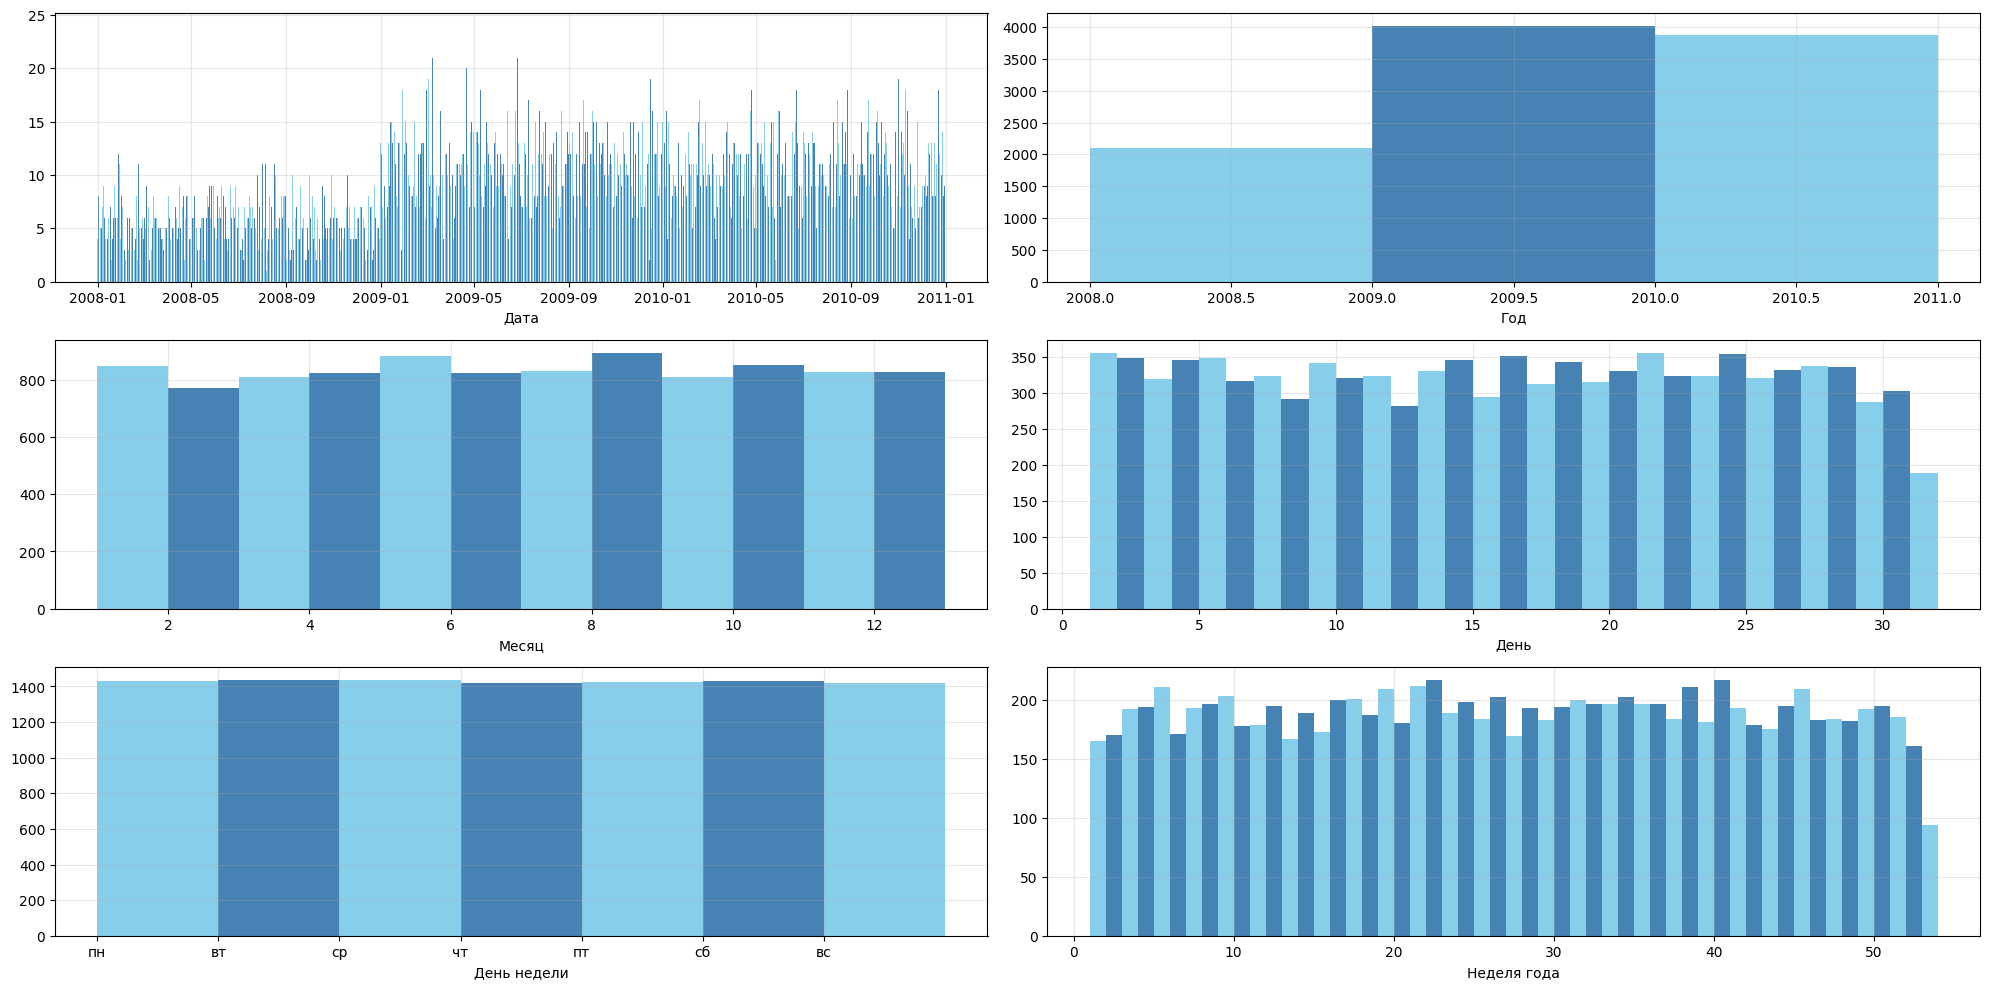

In [122]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))
axes = axes.flatten()

for ax, date_df, date_title in zip(axes, date_dfs, date_titles):
    if date_title=='Дата':
        ax.bar(date_df['dateKey'], date_df['count'])
    else:
        bins = list(range(date_df.min(), date_df.max()+2))
        ax.hist(x=date_df, bins=bins)

    for i, patch in enumerate(ax.patches):
        patch.set_facecolor('skyblue' if i % 2 == 0 else 'steelblue')

    if date_title=='День недели':
        ax.set_xticks(ticks=range(7), labels=week_day_names)

    ax.set_xlabel(date_title)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Посмотрим выбросы по дате.

dateKey  count
608 2009-08-31     24
709 2009-12-10     23
846 2010-04-26     23

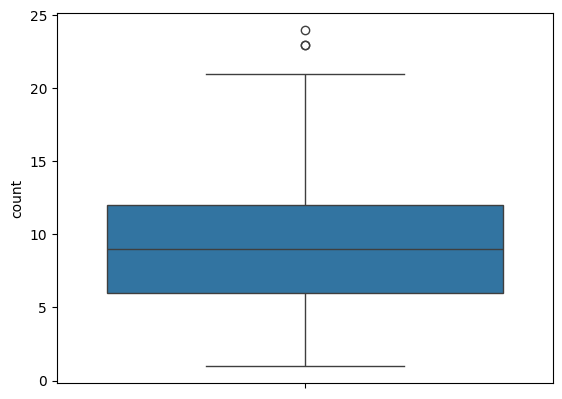

In [123]:
sns.boxplot(date_counts['count'])
date_counts[date_counts['count']>21]

Выводы по распределениям даты:
- Начиная с 2009-01 заметен прирост в продажах. Это может быть следствием изменения признаков продаж (новые поставщики, промоакции, покупатели).
- Продажи по большей части не зависят от числа месяца или дня в месяце. 31 числа наблюдается упадок продаж.
- Продажи по большей части не зависят от дня недели или недели в году. Но в первые и последние недели года наблюдается упадок продаж, возможно из-за новогодних праздников.

ИТОГО: Никакой сезонности и зависимости от времени не наблюдается.

Учтем важный момент, что на данных графиках не учитывается `Quantity` - количество продаж данного товара за день, а их может быть несколько, из-за чего может измениться и динамика продаж.

На следующих графиках распределений будут учитываться `Quantity` по каждой дате.

In [124]:
sales_by_date = df.groupby('dateKey')['Quantity'].sum().reset_index()
sales_by_year = df.groupby(df['dateKey'].dt.year)['Quantity'].sum().reset_index()
sales_by_month = df.groupby(df['dateKey'].dt.month)['Quantity'].sum().reset_index()
sales_by_day = df.groupby(df['dateKey'].dt.day)['Quantity'].sum().reset_index()
sales_by_weekday = df.groupby(df['dateKey'].dt.dayofweek)['Quantity'].sum().reset_index()
sales_by_week = df.groupby(df['dateKey'].dt.isocalendar().week.rename('dateKey'))['Quantity'].sum().reset_index()

sales_dfs = [sales_by_date, sales_by_year, sales_by_month, sales_by_day, sales_by_weekday, sales_by_week]

sales_titles = ['Продажи по дате', 'Продажи по годам', 'Продажи по месяцам', 'Продажи по дням', 'Продажи по дням недели', 'Продажи по неделям года']

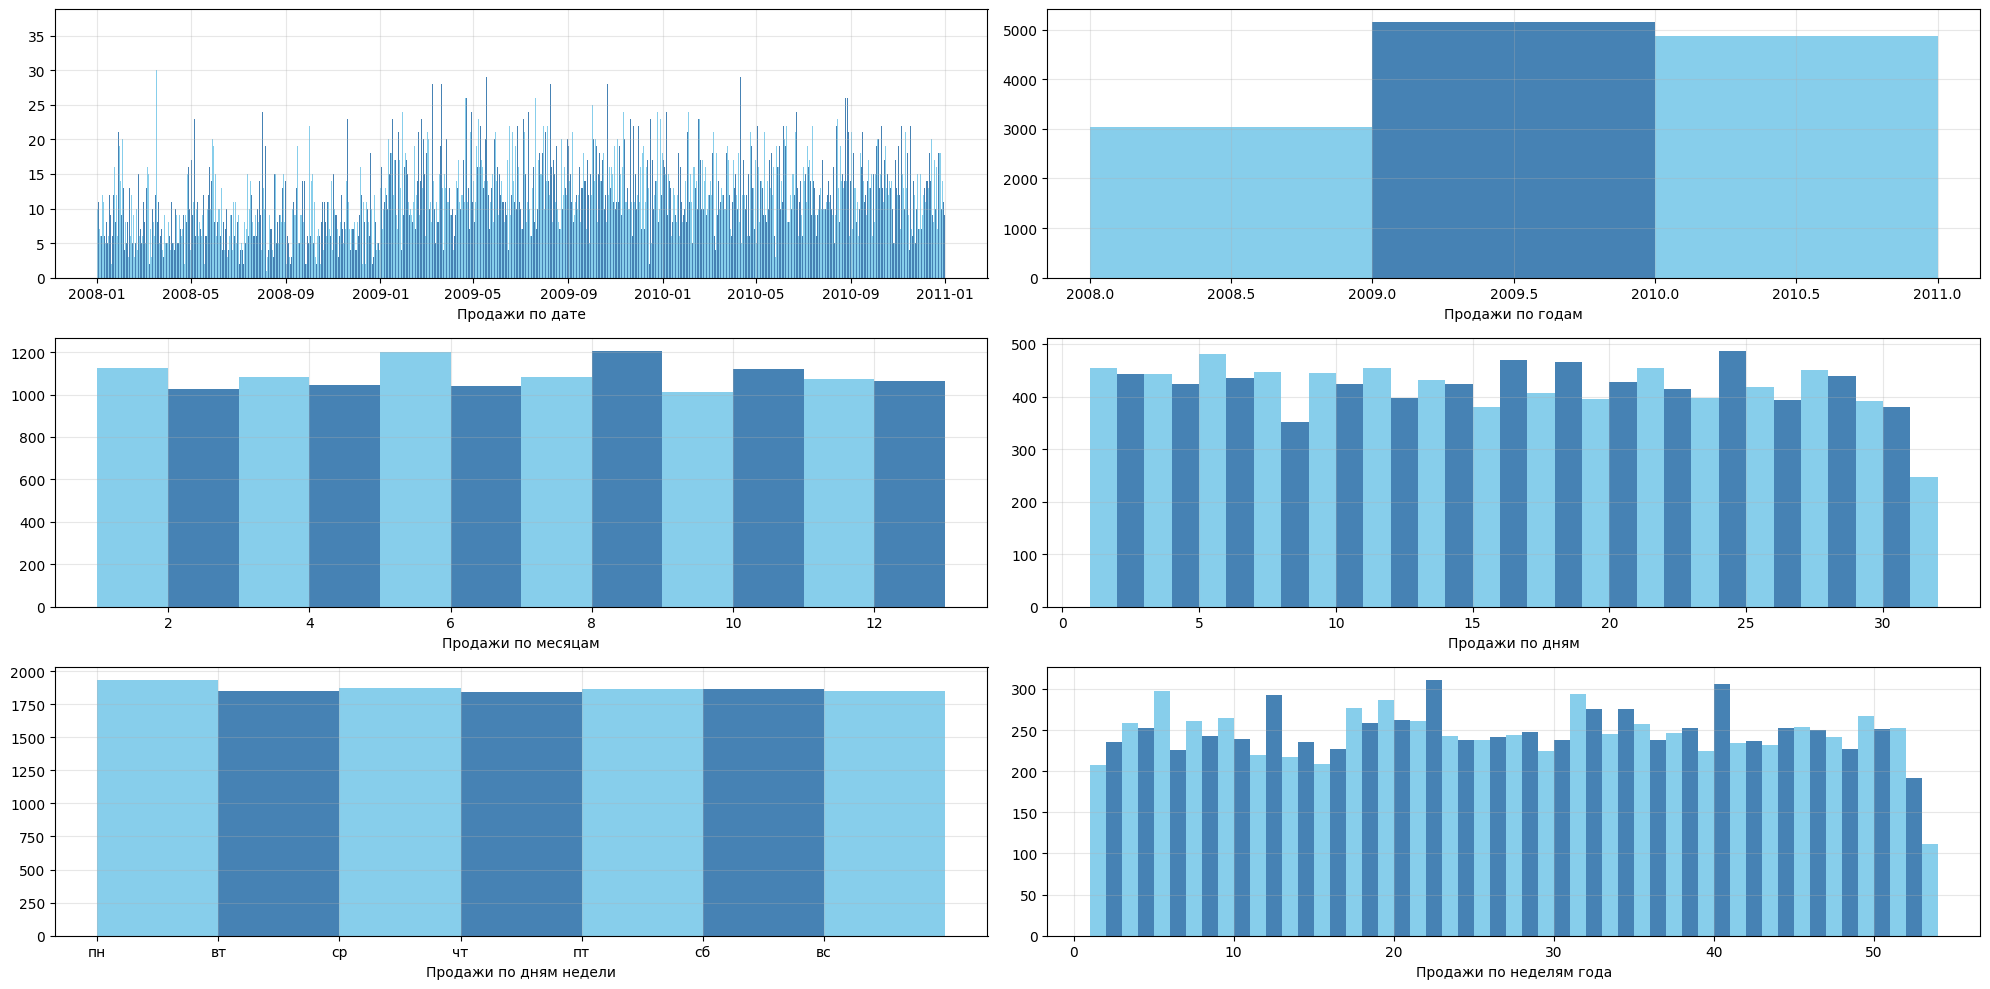

In [125]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))
axes = axes.flatten()

for ax, sales_df, sales_title in zip(axes, sales_dfs, sales_titles):
    ax.bar(x=sales_df['dateKey'], height=sales_df['Quantity'], width=1, align='edge')

    for i, patch in enumerate(ax.patches):
        patch.set_facecolor('skyblue' if i % 2 == 0 else 'steelblue')

    if sales_title=='Продажи по дням недели':
        ax.set_xticks(ticks=range(7), labels=week_day_names)

    ax.set_xlabel(sales_title)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

dateKey  Quantity
76  2008-03-17        30
433 2009-03-09        28
445 2009-03-21        28
475 2009-04-20        29
476 2009-04-21        26
477 2009-04-22        26
497 2009-05-12        28
503 2009-05-18        29
566 2009-07-20        26
585 2009-08-08        28
608 2009-08-31        37
659 2009-10-21        28
701 2009-12-02        28
709 2009-12-10        31
785 2010-02-24        27
831 2010-04-11        29
846 2010-04-26        28
948 2010-08-06        31
967 2010-08-25        26
969 2010-08-27        26

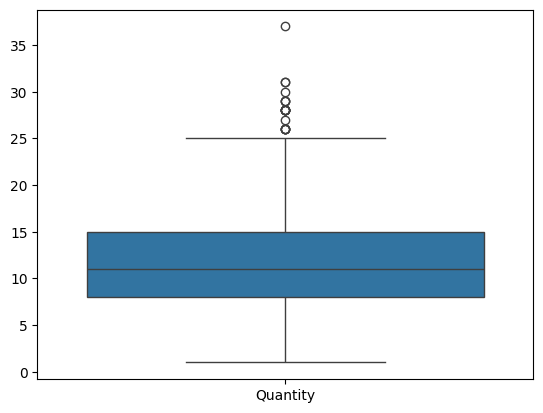

In [126]:
sns.boxplot(sales_by_date)
sales_by_date[sales_by_date['Quantity']>25]

Выводы по распределениям количества продаж по дате:
- Аналогично заметен рост в продажах с 2009-01.
- Распределение продаж аналогично распределению количества записей (без учета `Quantity` товара).

ИТОГО: Никакой сезонности и зависимости от времени не наблюдается.

### Продавцы [salesPersonKey]

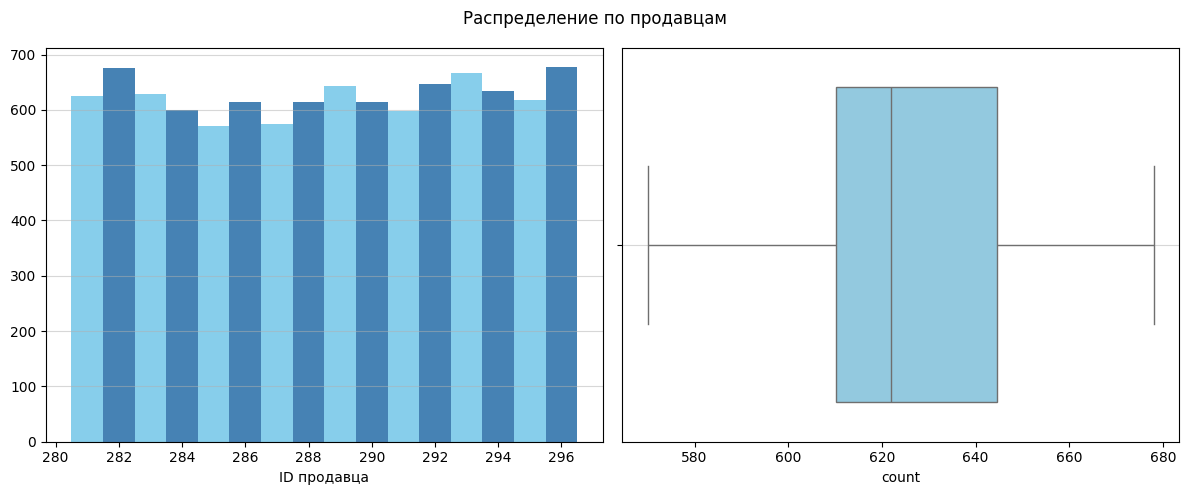

In [127]:
salers_counts = df['salesPersonKey'].value_counts().sort_index().reset_index()
show_distribution_and_boxplot(salers_counts, x_col='salesPersonKey', y_col='count', box=salers_counts['count'], title='Распределение по продавцам', xlabel='ID продавца')

<Axes: ylabel='count'>

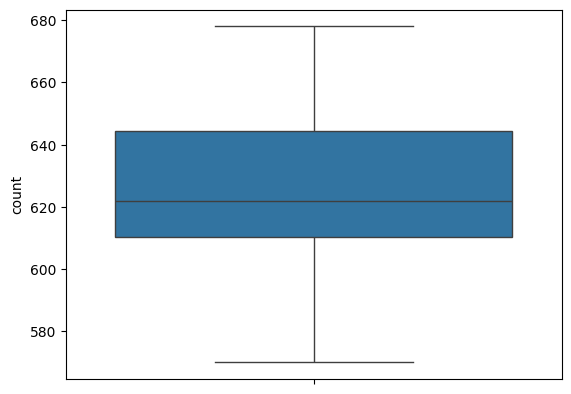

In [128]:
sns.boxplot(salers_counts['count'])

ИТОГО: Все продавцы продают примерно одинаково.

### Количество [Quantity]

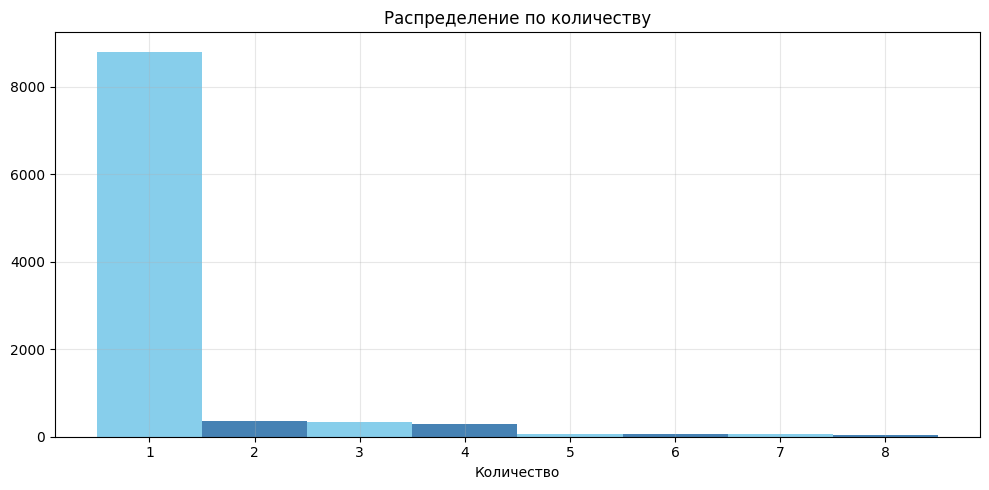

In [129]:
quantity_counts = df['Quantity'].value_counts().sort_index().reset_index()
show_distribution(df=quantity_counts, x_col='Quantity', y_col='count', title='Распределение по количеству', xlabel='Количество')

Сразу посмотрим, для каких товаров характерны большие по количеству покупки.

In [130]:
print(f"Product Category больших покупок: {df[df['Quantity']>4]['Product Category'].unique()}")
print(f"Product Sub Category больших покупок: {df[df['Quantity']>4]['Product Sub Category'].unique()}")

Product Category больших покупок: ['Bikes']
Product Sub Category больших покупок: ['Touring Bikes']


Выводы:
- Чаще всего один товар покупают один раз в день.
- В большом количестве (>4) покупаются туристичекие велосипеды - возможно, как заказы от групп туристов или бизнесов (туристических компапний).

### Цена [Price]

Сразу посмотрим распределение цен с учетом количества проданного товара (`Quantity`) за определенную цену. Цены агрегированы по десяткам.

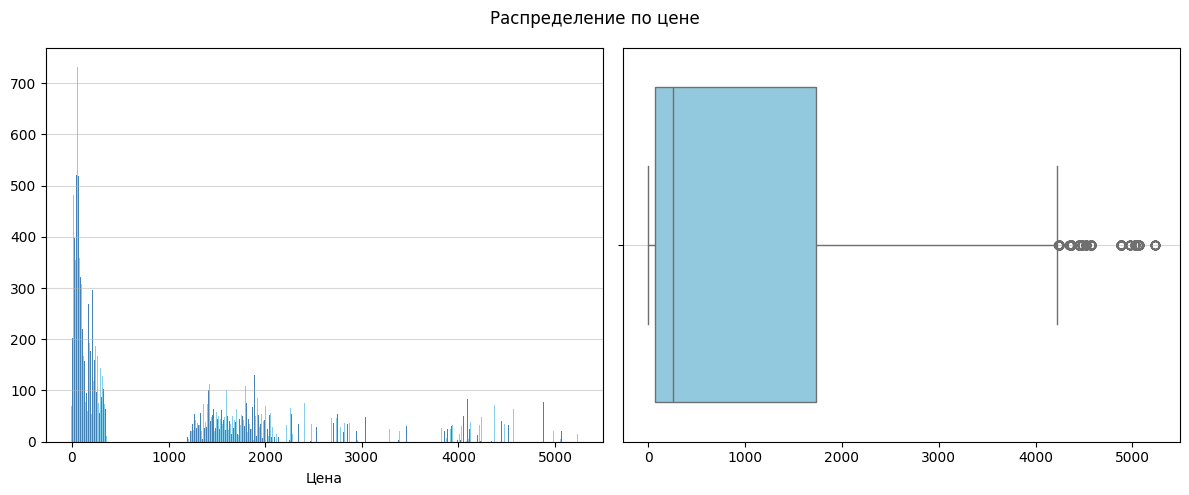

In [131]:
price_counts = df[['Price', 'Quantity']].copy(deep=True)
price_counts['Price'] = (price_counts['Price']//10) *10
price_counts = price_counts.groupby('Price')['Quantity'].sum().reset_index()
price_counts = price_counts.sort_values(by='Price').reset_index(drop=True)
price_counts['Price'] = price_counts['Price'].astype(int)
price_counts_box = price_counts.loc[price_counts.index.repeat(price_counts['Quantity'])]['Price']

show_distribution_and_boxplot(price_counts, x_col='Price', y_col='Quantity', box=price_counts_box.values, title='Распределение по цене', xlabel='Цена', width=10)

In [132]:
q1 = np.percentile(price_counts_box.values, 25)
q2 = np.percentile(price_counts_box.values, 50)
q3 = np.percentile(price_counts_box.values, 75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

print(f"Q1 (25%): {q1}")
print(f"Median (50%): {q2}")
print(f"Q3 (75%): {q3}")
print(f"IQR: {iqr}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25%): 70.0
Median (50%): 250.0
Q3 (75%): 1730.0
IQR: 1660.0
Lower Whisker: -2420.0
Upper Whisker: 4220.0


По распределению можно увидеть, что товары компании делятся на 3 категории:
- Дешевые (до 370). На них приходится большая часть продаж.
- Дорогие (1200-3500)
- Люксовые (более 3500). Сюда входят также выбросы (с ценой >4220).

Подробнее посмотрим выбросы

In [133]:
df[df['Price']>4220].sample(5)

customerKey    dateKey  salesPersonKey  Quantity      Price  Margin  \
7464       100734 2010-11-17             294         7  4375.1516   0.208   
2830         7959 2009-12-11             294         1  4247.7200   0.340   
4078       185995 2010-01-08             284         1  4223.7416   0.150   
334        320090 2009-08-31             293         5  5079.3600   0.280   
1594       154893 2010-01-30             294         3  5231.7408   0.270   

             Cost    OverHead  returns       Sales     Expenses   net profit  \
7464  3465.120067  273.009460      0.0  30626.0612  24255.84047  6097.211270   
2830  2803.495200  144.422480      0.0   4247.7200   2803.49520  1299.802320   
4078  3590.180360  126.712248      0.0   4223.7416   3590.18036   506.848992   
334   3657.139200  284.444160      0.0  25396.8000  18285.69600  6826.659840   
1594  3819.170784  282.514003      0.0  15695.2224  11457.51235  3955.196045   

      net margin                  City           State        Country  \
7464        19.9             Winnsboro  South Carolina  United States   
2830        30.6                Maumee            Ohio  United States   
4078        12.0            Goldendale      Washington  United States   
334         26.9  Feasterville Trevose    Pennsylvania  United States   
1594        25.2               Waupaca       Wisconsin  United States   

     Marital Status  Gender  Income  Children        Education  \
7464         Single  Female   70000         0        Bachelors   
2830         Single  Female   60000         1  Graduate Degree   
4078        Married  Female   70000         5  Graduate Degree   
334         Married  Female   80000         2      High School   
1594         Single    Male   30000         1        Bachelors   

          Occupation Home Owner  Cars Commute Distance  Age Purchased Bike  \
7464    Professional         No     1       5-10 Miles   42             No   
2830  Skilled Manual        Yes     0        1-2 Miles   35             No   
4078    Professional        Yes     1        0-1 Miles   47             No   
334   Skilled Manual        Yes     2       5-10 Miles   50            Yes   
1594        Clerical         No     1        1-2 Miles   39             No   

           Product Product Sub Category Product Category   Color Size  Weight  \
7464  Touring-3000        Touring Bikes            Bikes    Blue   44   28.77   
2830  Touring-3000        Touring Bikes            Bikes    Blue   44   28.77   
4078  Touring-3000        Touring Bikes            Bikes    Blue   62   30.00   
334   Touring-3000        Touring Bikes            Bikes  Yellow   44   28.77   
1594  Touring-3000        Touring Bikes            Bikes  Yellow   44   28.77   

     Class Style                    Promotion Promotion Category  \
7464    L     U    Sport Helmet Discount-2002           Reseller   
2830    L     U        Touring-1000 Promotion           Reseller   
4078    L     U   Mountain-100 Clearance Sale           Reseller   
334     L     U   Mountain-100 Clearance Sale           Reseller   
1594    L     U      Volume Discount 11 to 14           Reseller   

            Promotion Type Manufacturer Manufacturer Grouping   Market  
7464     Seasonal Discount         Acme            New Comers   Stable  
2830           New Product     Princess            New Comers  Growing  
4078  Discontinued Product         Acme            New Comers   Stable  
334   Discontinued Product    Slicenger            New Comers   Stable  
1594       Volume Discount    Slicenger            New Comers   Stable

Видно, что здесь все товары из категории `Touring Bikes` - они являются самыми дорогими.

Подробнее посмотрим, какие `Product Sub Category` и `Product Category` приходятся на каждый диапазон цен.

In [134]:
cheap = df[df['Price']<=370]
expensive = df[(df['Price']>370) & (df['Price']<=3500)]
luxury = df[df['Price']>3600]

for df_price_cat, name in zip([cheap, expensive, luxury], ['Дешевые товары', 'Дорогие товары', 'Люксовые товары']):
    print(f"Product Category среди {name}:")
    df_price_cat_stats = df_price_cat.groupby('Product Category').agg(count=('Product Category', 'count'), avg_price=('Price', 'mean')).sort_values(by='count', ascending=False).reset_index()
    print('\t' + df_price_cat_stats.to_string(index=False).replace('\n', '\n\t'))
    print(f"Product Sub Category среди {name}:")
    df_price_sub_cat_stats = df_price_cat.groupby(['Product Category', 'Product Sub Category']).agg(count=('Product Sub Category', 'count'), avg_price=('Price', 'mean')).sort_values(by='count', ascending=False).reset_index()
    print('\t' + df_price_sub_cat_stats.head().to_string(index=False).replace('\n', '\n\t'))

Product Category среди Дешевые товары:
	Product Category  count  avg_price
	      Components   3612 197.275972
	        Clothing   1417  72.750591
	     Accessories   1398  46.530014
Product Sub Category среди Дешевые товары:
	Product Category Product Sub Category  count  avg_price
	      Components          Road Frames   1378 205.780161
	      Components      Mountain Frames    762 206.424642
	        Clothing              Jerseys    481  71.363881
	     Accessories                Other    409  39.887531
	      Components       Touring Frames    330 188.949049
Product Category среди Дорогие товары:
	Product Category  count   avg_price
	           Bikes   3291 1703.372009
Product Sub Category среди Дорогие товары:
	Product Category Product Sub Category  count   avg_price
	           Bikes           Road Bikes   1838 1498.804568
	           Bikes       Mountain Bikes   1106 1812.952743
	           Bikes        Touring Bikes    347 2437.662110
Product Category среди Люксовые товары:
	Pro

- Большая часть дешевых товаров - это компоненты для велосипедов и одежды. Наиболее частый тип товара - велосипедные рамы `Frames` (компоненты), `Jerseys` (одежда), а также аксессурары.
- Дорогие товары - это дорожные или горные велсипеды (Road Bikes, Mountain Bikes)
- Люксовые товары - в эту группу входят только туристические велосипеды (Touring Bikes)

Посмотрим также на зависимость количества покупаемых товаров от цены.

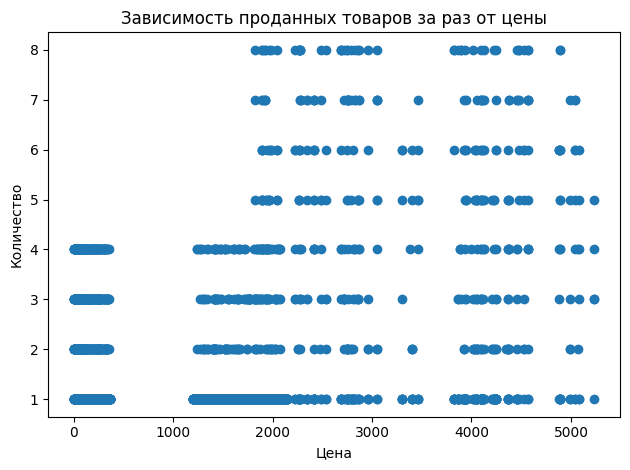

In [135]:
plt.scatter(x=df['Price'], y=df['Quantity'])
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Зависимость проданных товаров за раз от цены')
plt.tight_layout()
plt.show()

Видно, что товары дорогого и люксового сегмента становятся объектом большой покупки чаще, чем дешевые. Одна из причин, которая раньше озвучивалась - такие покупки совершают группы туристов или бизнесы.

Выводы:
- Товары компании можно разделить на 3 категории по цене: дешевые (дешевле 370), дорогие (от 1200-3500), люксовые (дороже 3500).
    - Дешевые товары: компоненты (рамы для велосипеда), одежда (джерси), аксессуары
    - Дорогие и люксовые товары: велосипеды (`Bikes`). Причем люксовые - туристические велосипеды (`Touring Bikes`)
- Дешевые товары чаще покупают, но дорогие и люксовые товары берут в большем количестве.

### Категория продукта [Product Category]

Посмотрим распределения характеристик покупателя, который берет товары той или иной `Product Category`

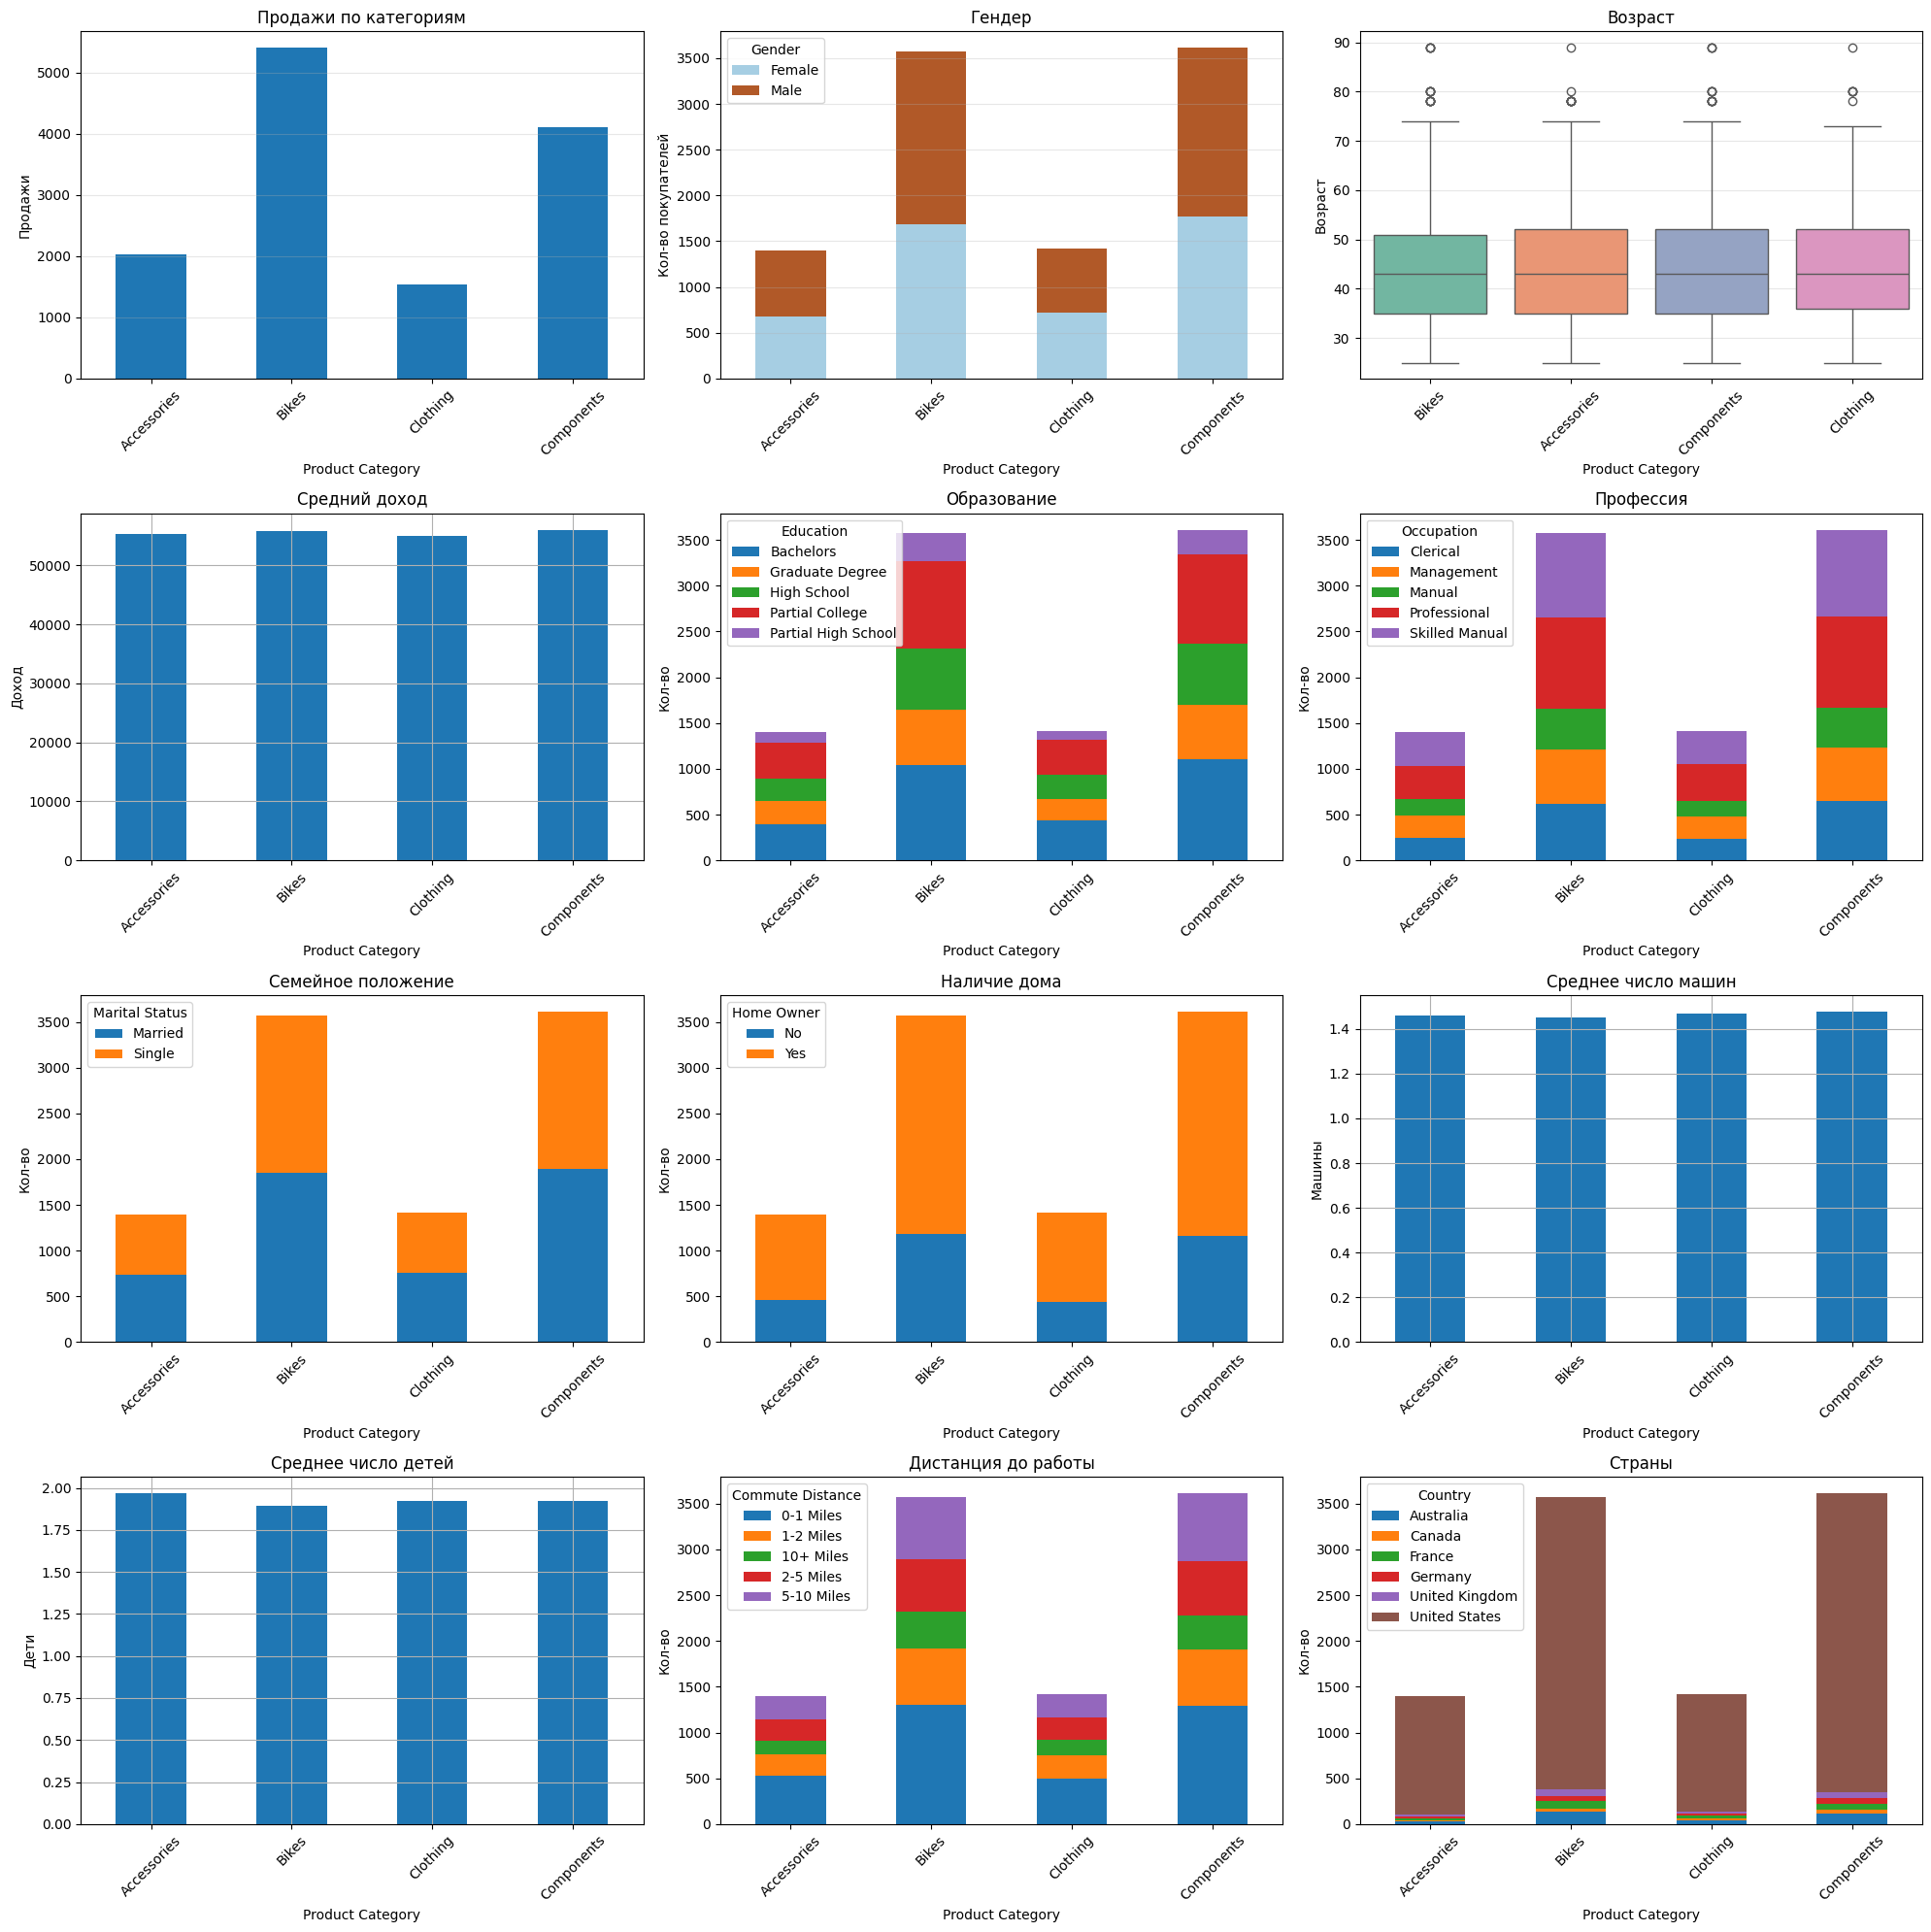

In [136]:
customer_chars(df, col='Product Category')

Вывод:
- Наиболее частые категории для покупки - `Bikes` (велосипеды) и `Components`. Велосипеды также чаще являются объектом оптовой покупки (5-8 штку за раз), из-за чего на 1-м графике их количество продаж больше, в сравнении с компонентами.
- Никакая из характеристик покупателя не влияет на его предрасположенность к покупке той или иной категории товаров.

### Подкатегоия продукта [Product Sub Category]

Рассмотрим отношение характеристик человека к его покупке того или иного типа товара (`Product Sub Category`) для каждой категории товара.

#### Bikes

In [137]:
bikes_categories = df[df['Product Category']=='Bikes']
bikes_categories['Product Sub Category'].unique()

array(['Road Bikes', 'Mountain Bikes', 'Touring Bikes'], dtype=object)

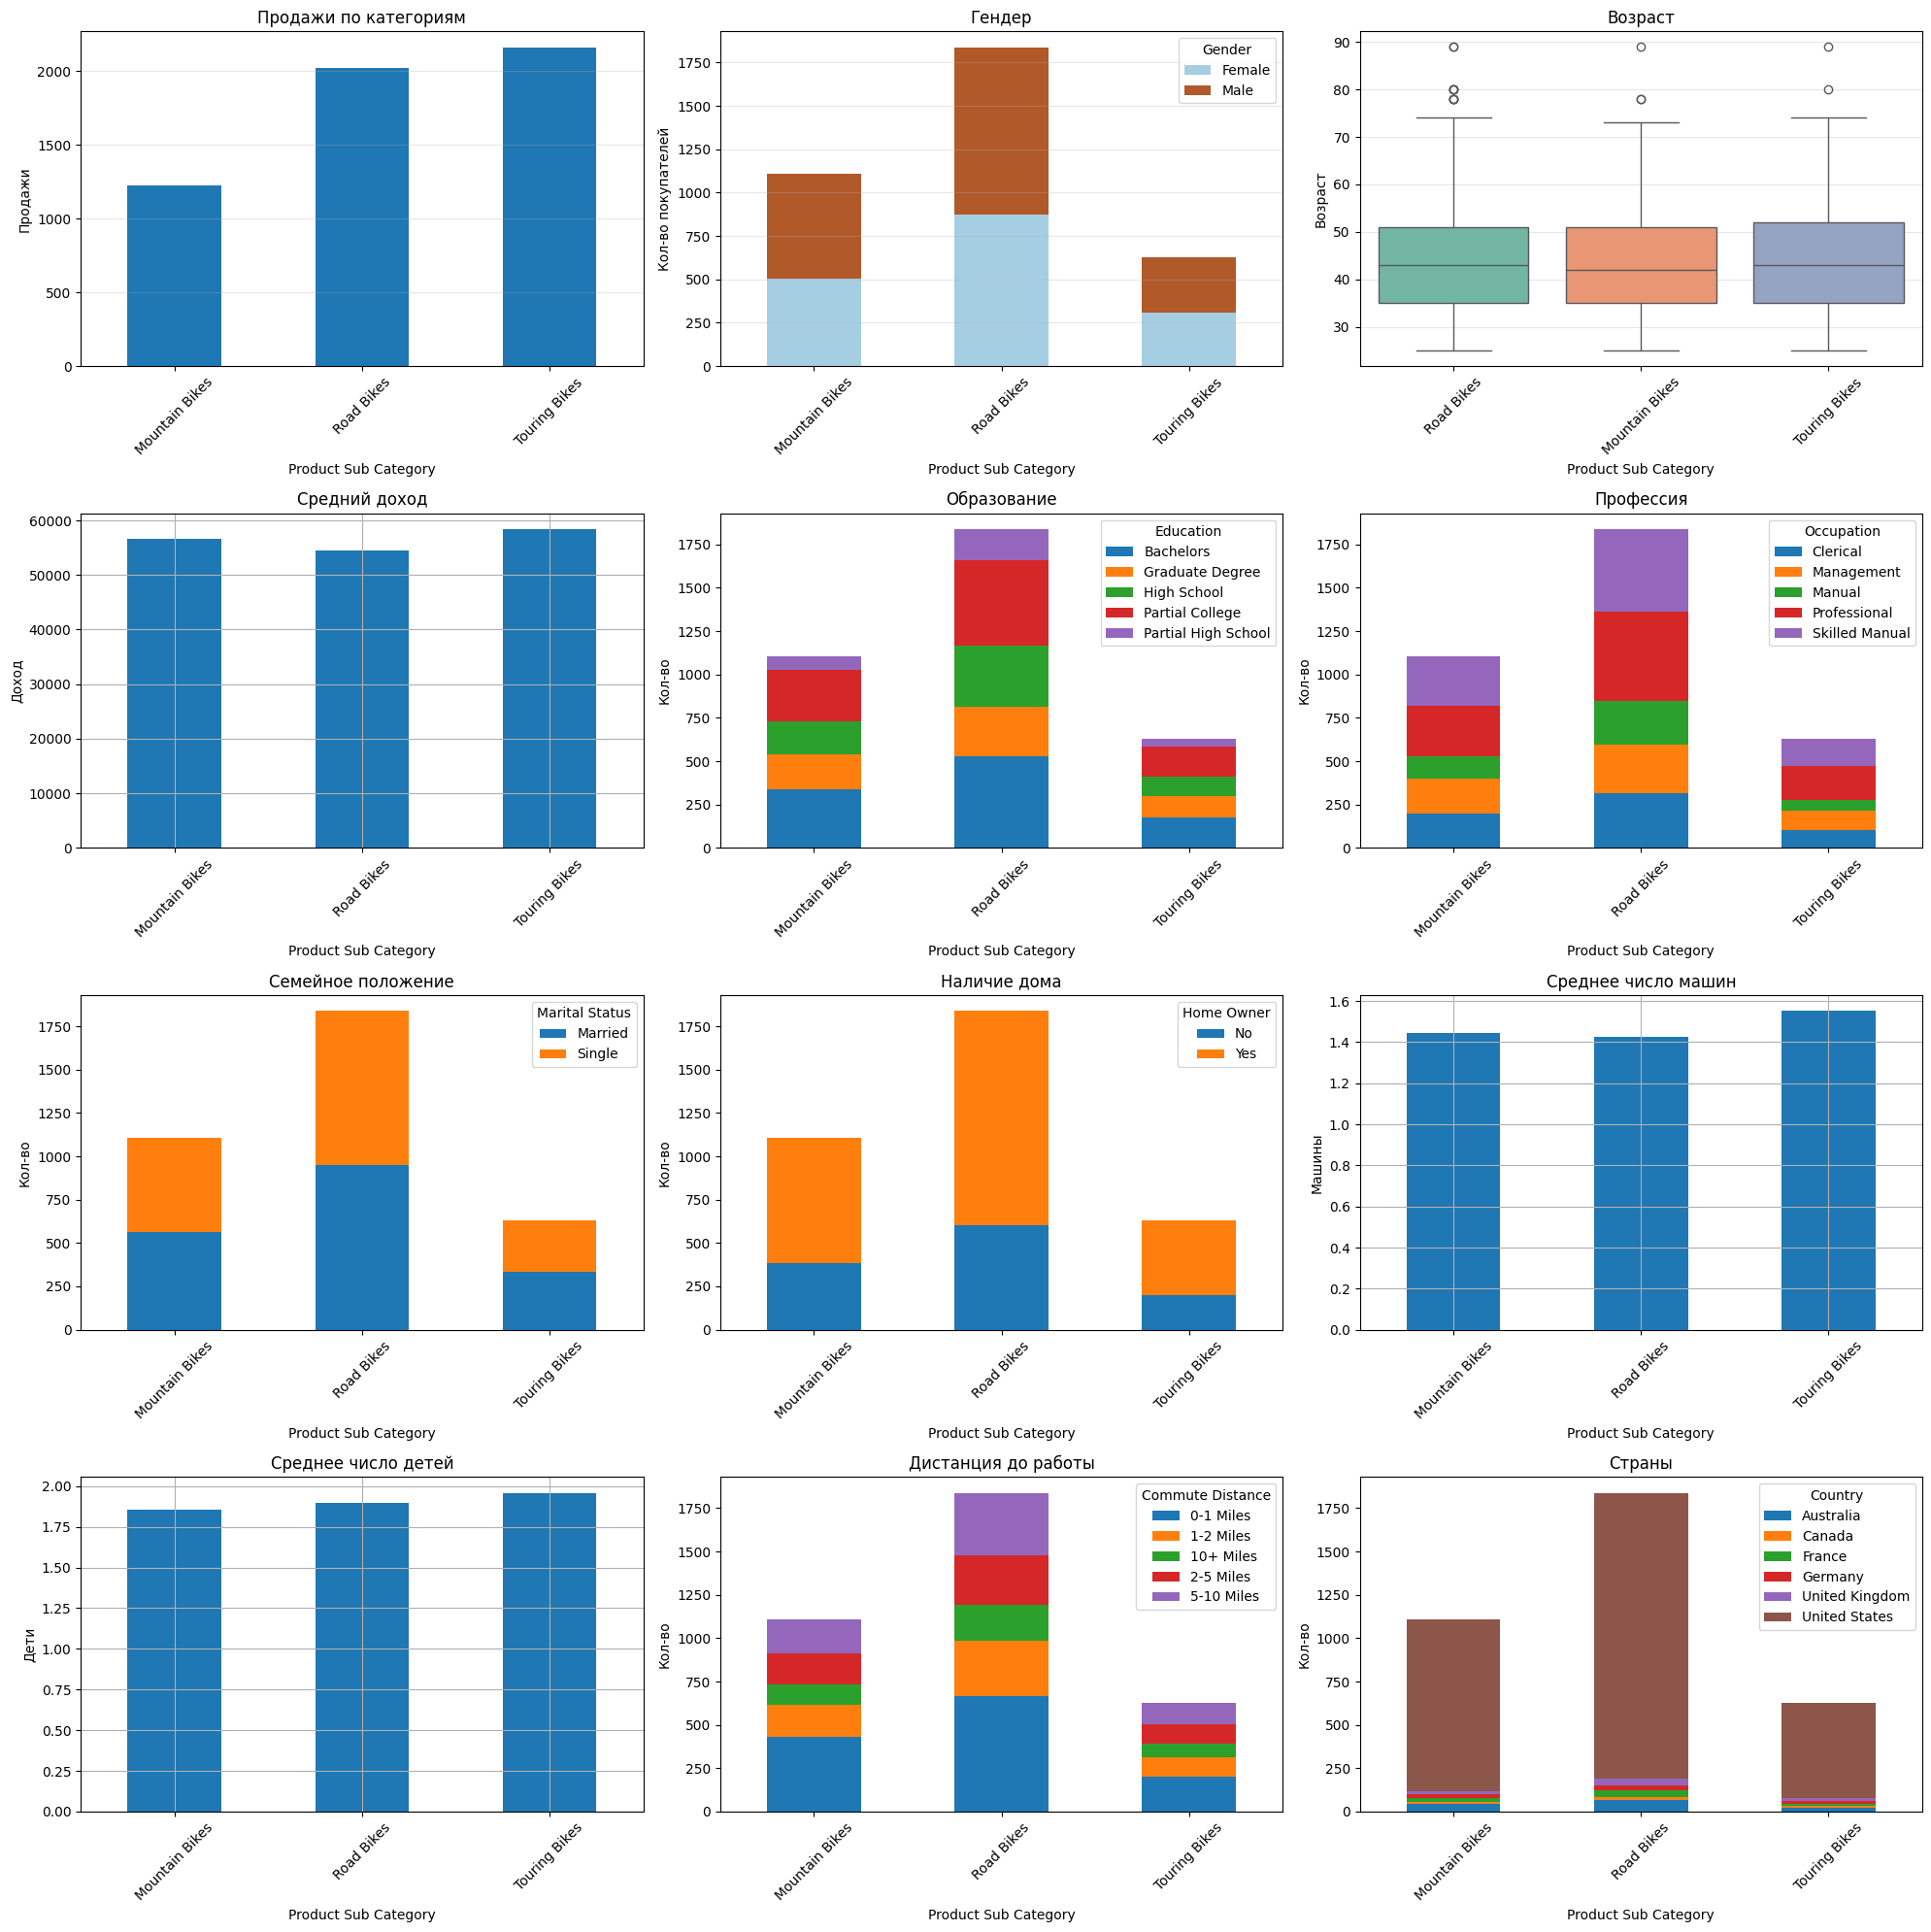

In [138]:
customer_chars(bikes_categories, col='Product Sub Category')

Вывод:
- По частоте продаж наиболее популярный тип велосипеда - `Road Bikes`, но по общему количеству продаж (учитывая приобретение за раз) - `Touring Bikes`
- В целом, никакая характеристика покупателя не влияет на то, какой велосипед покупатель выбирает.

#### Components

In [139]:
components_categories = df[df['Product Category']=='Components']
components_categories['Product Sub Category'].unique()

array(['Headsets', 'Road Frames', 'Mountain Frames', 'Wheels',
       'Touring Frames', 'Derailleurs', 'Saddles', 'Cranksets',
       'Handlebars', 'Forks', 'Bottom Brackets', 'Pedals', 'Brakes',
       'Chains'], dtype=object)

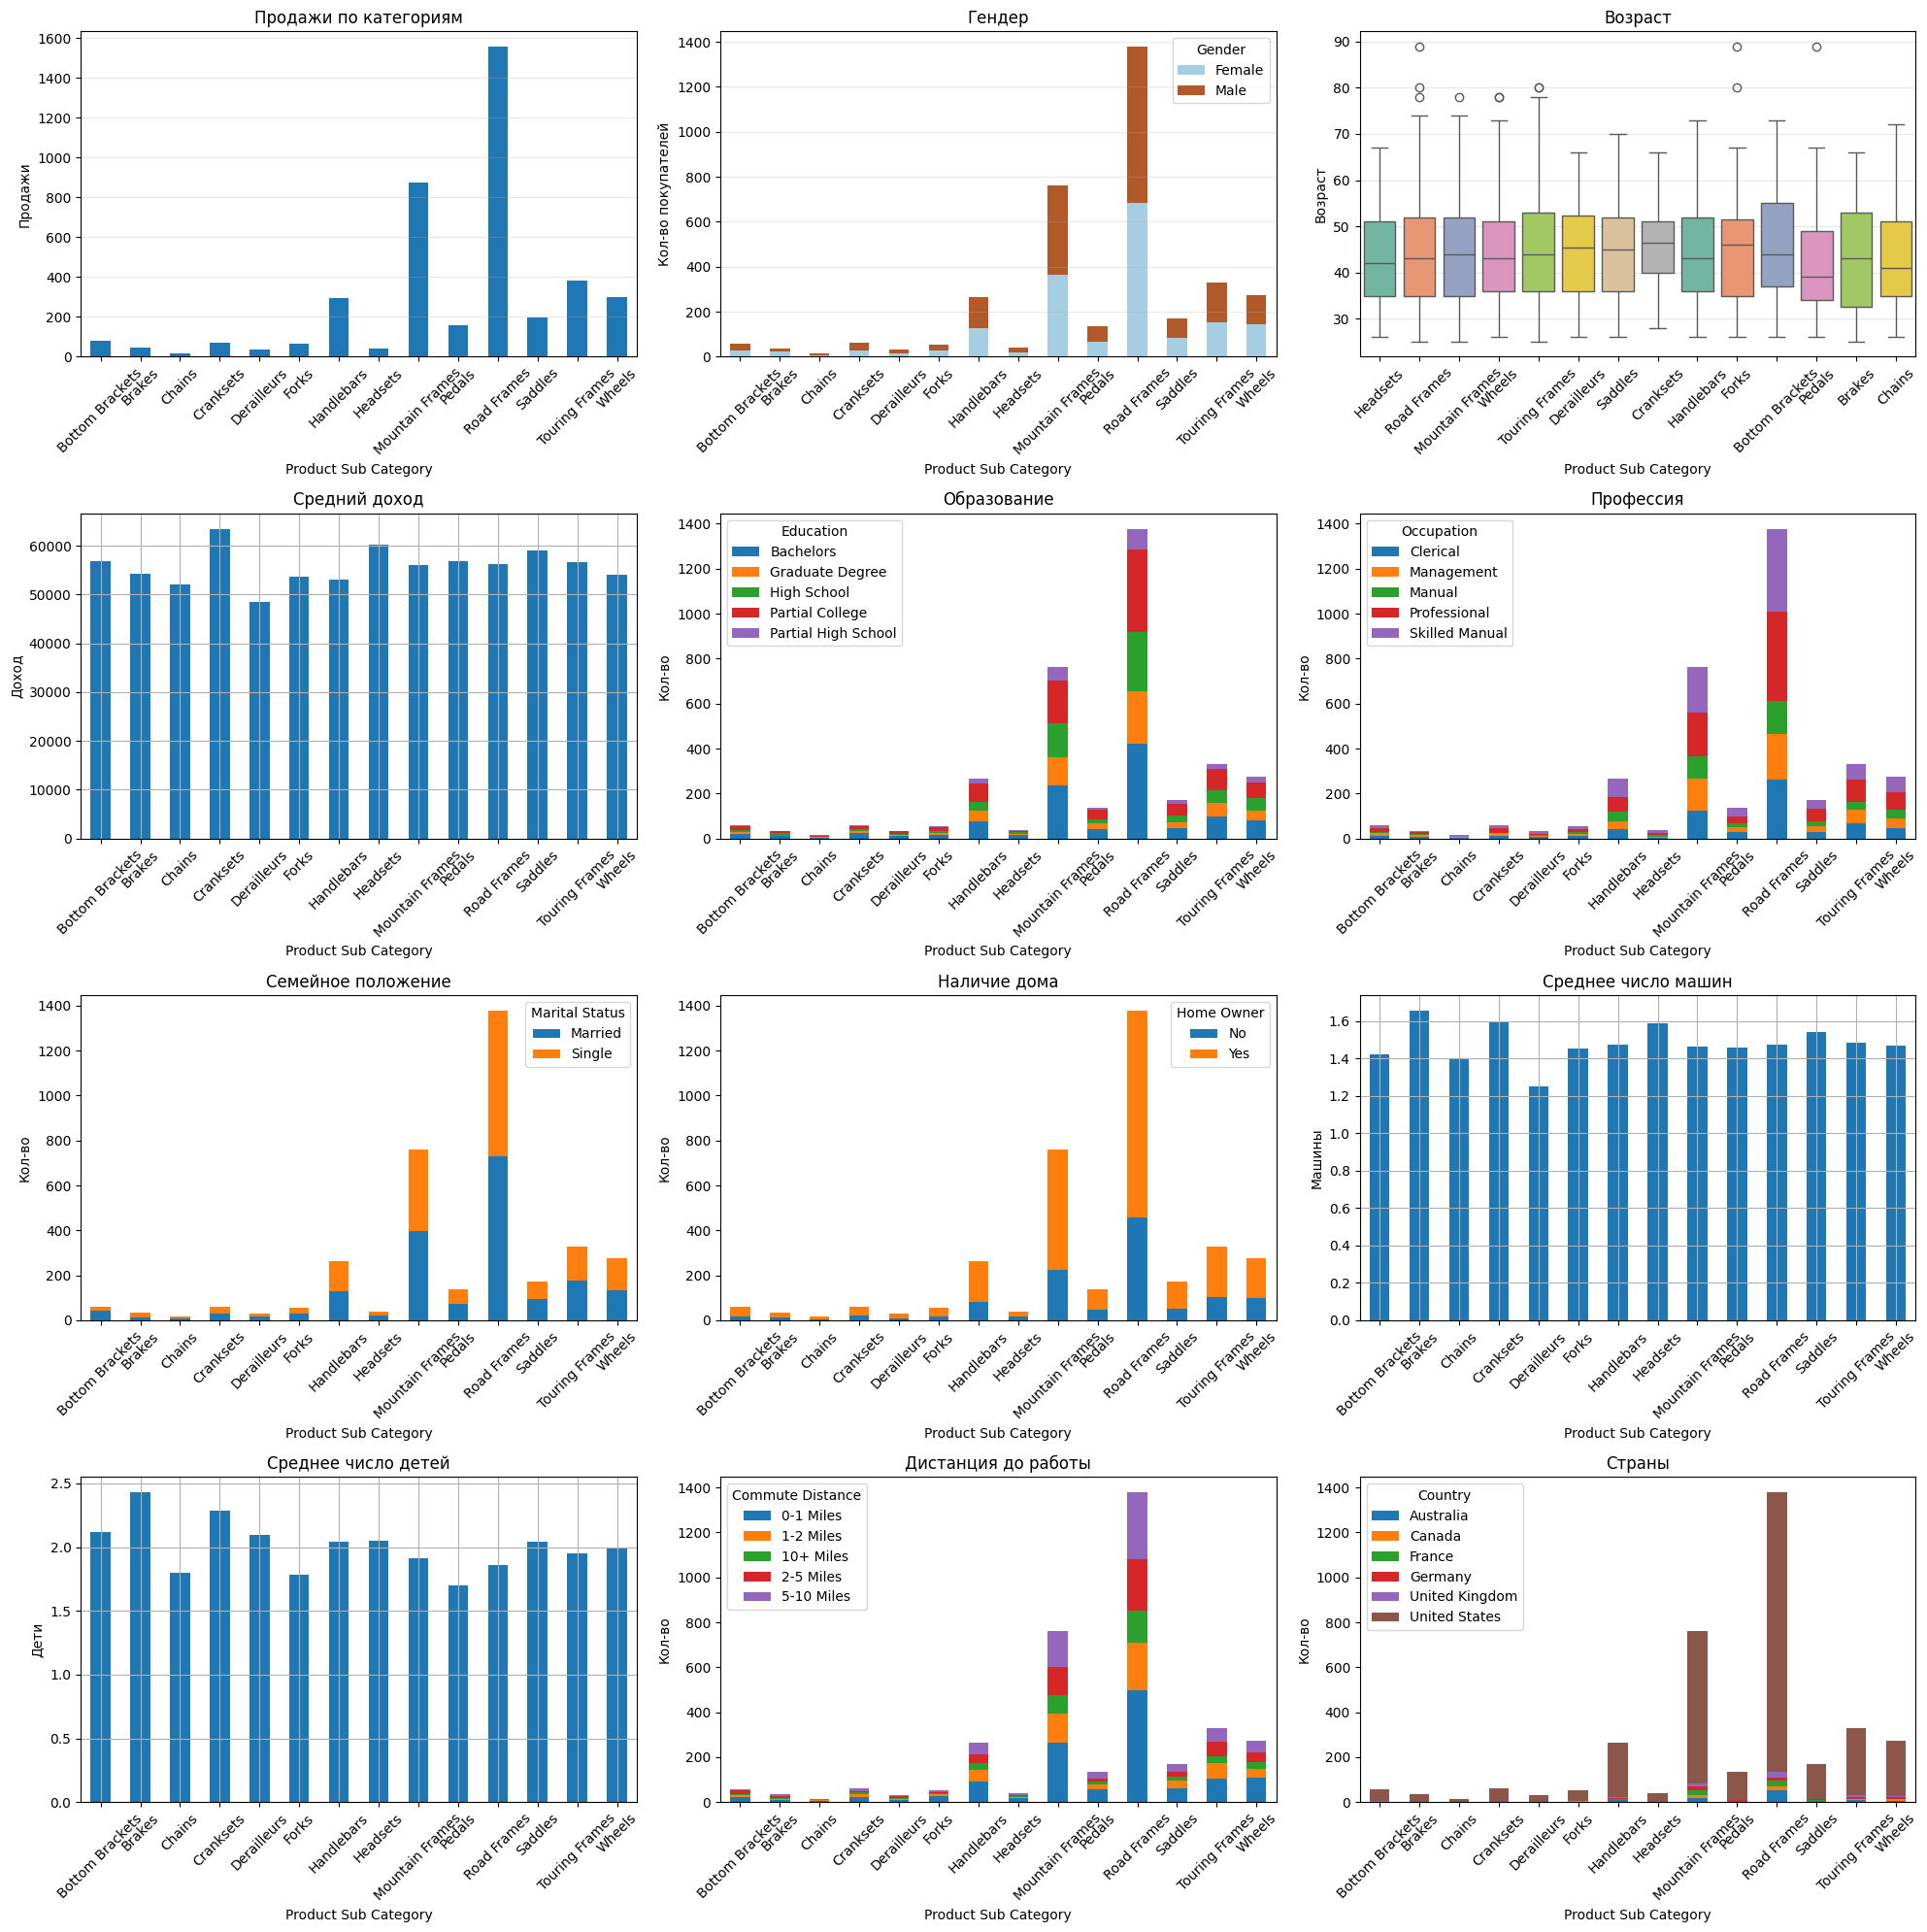

In [140]:
customer_chars(components_categories, col='Product Sub Category')

Вывод:
- Наиболее популярный товар с `Components` - `Frames` (рамы для велосипедов), затем `Handlebars`, `Wheels`, `Saddles`, `Pedals`.
- Люди с большим количеством детей немного чаще покупают `Brakes` (тормоза)

#### Clothing

In [141]:
clothing_categories = df[df['Product Category']=='Clothing']
clothing_categories['Product Sub Category'].unique()

array(['Vests', 'Bib-Shorts', 'Gloves', 'Jerseys', 'Socks', 'Shorts',
       'Tights', 'Caps'], dtype=object)

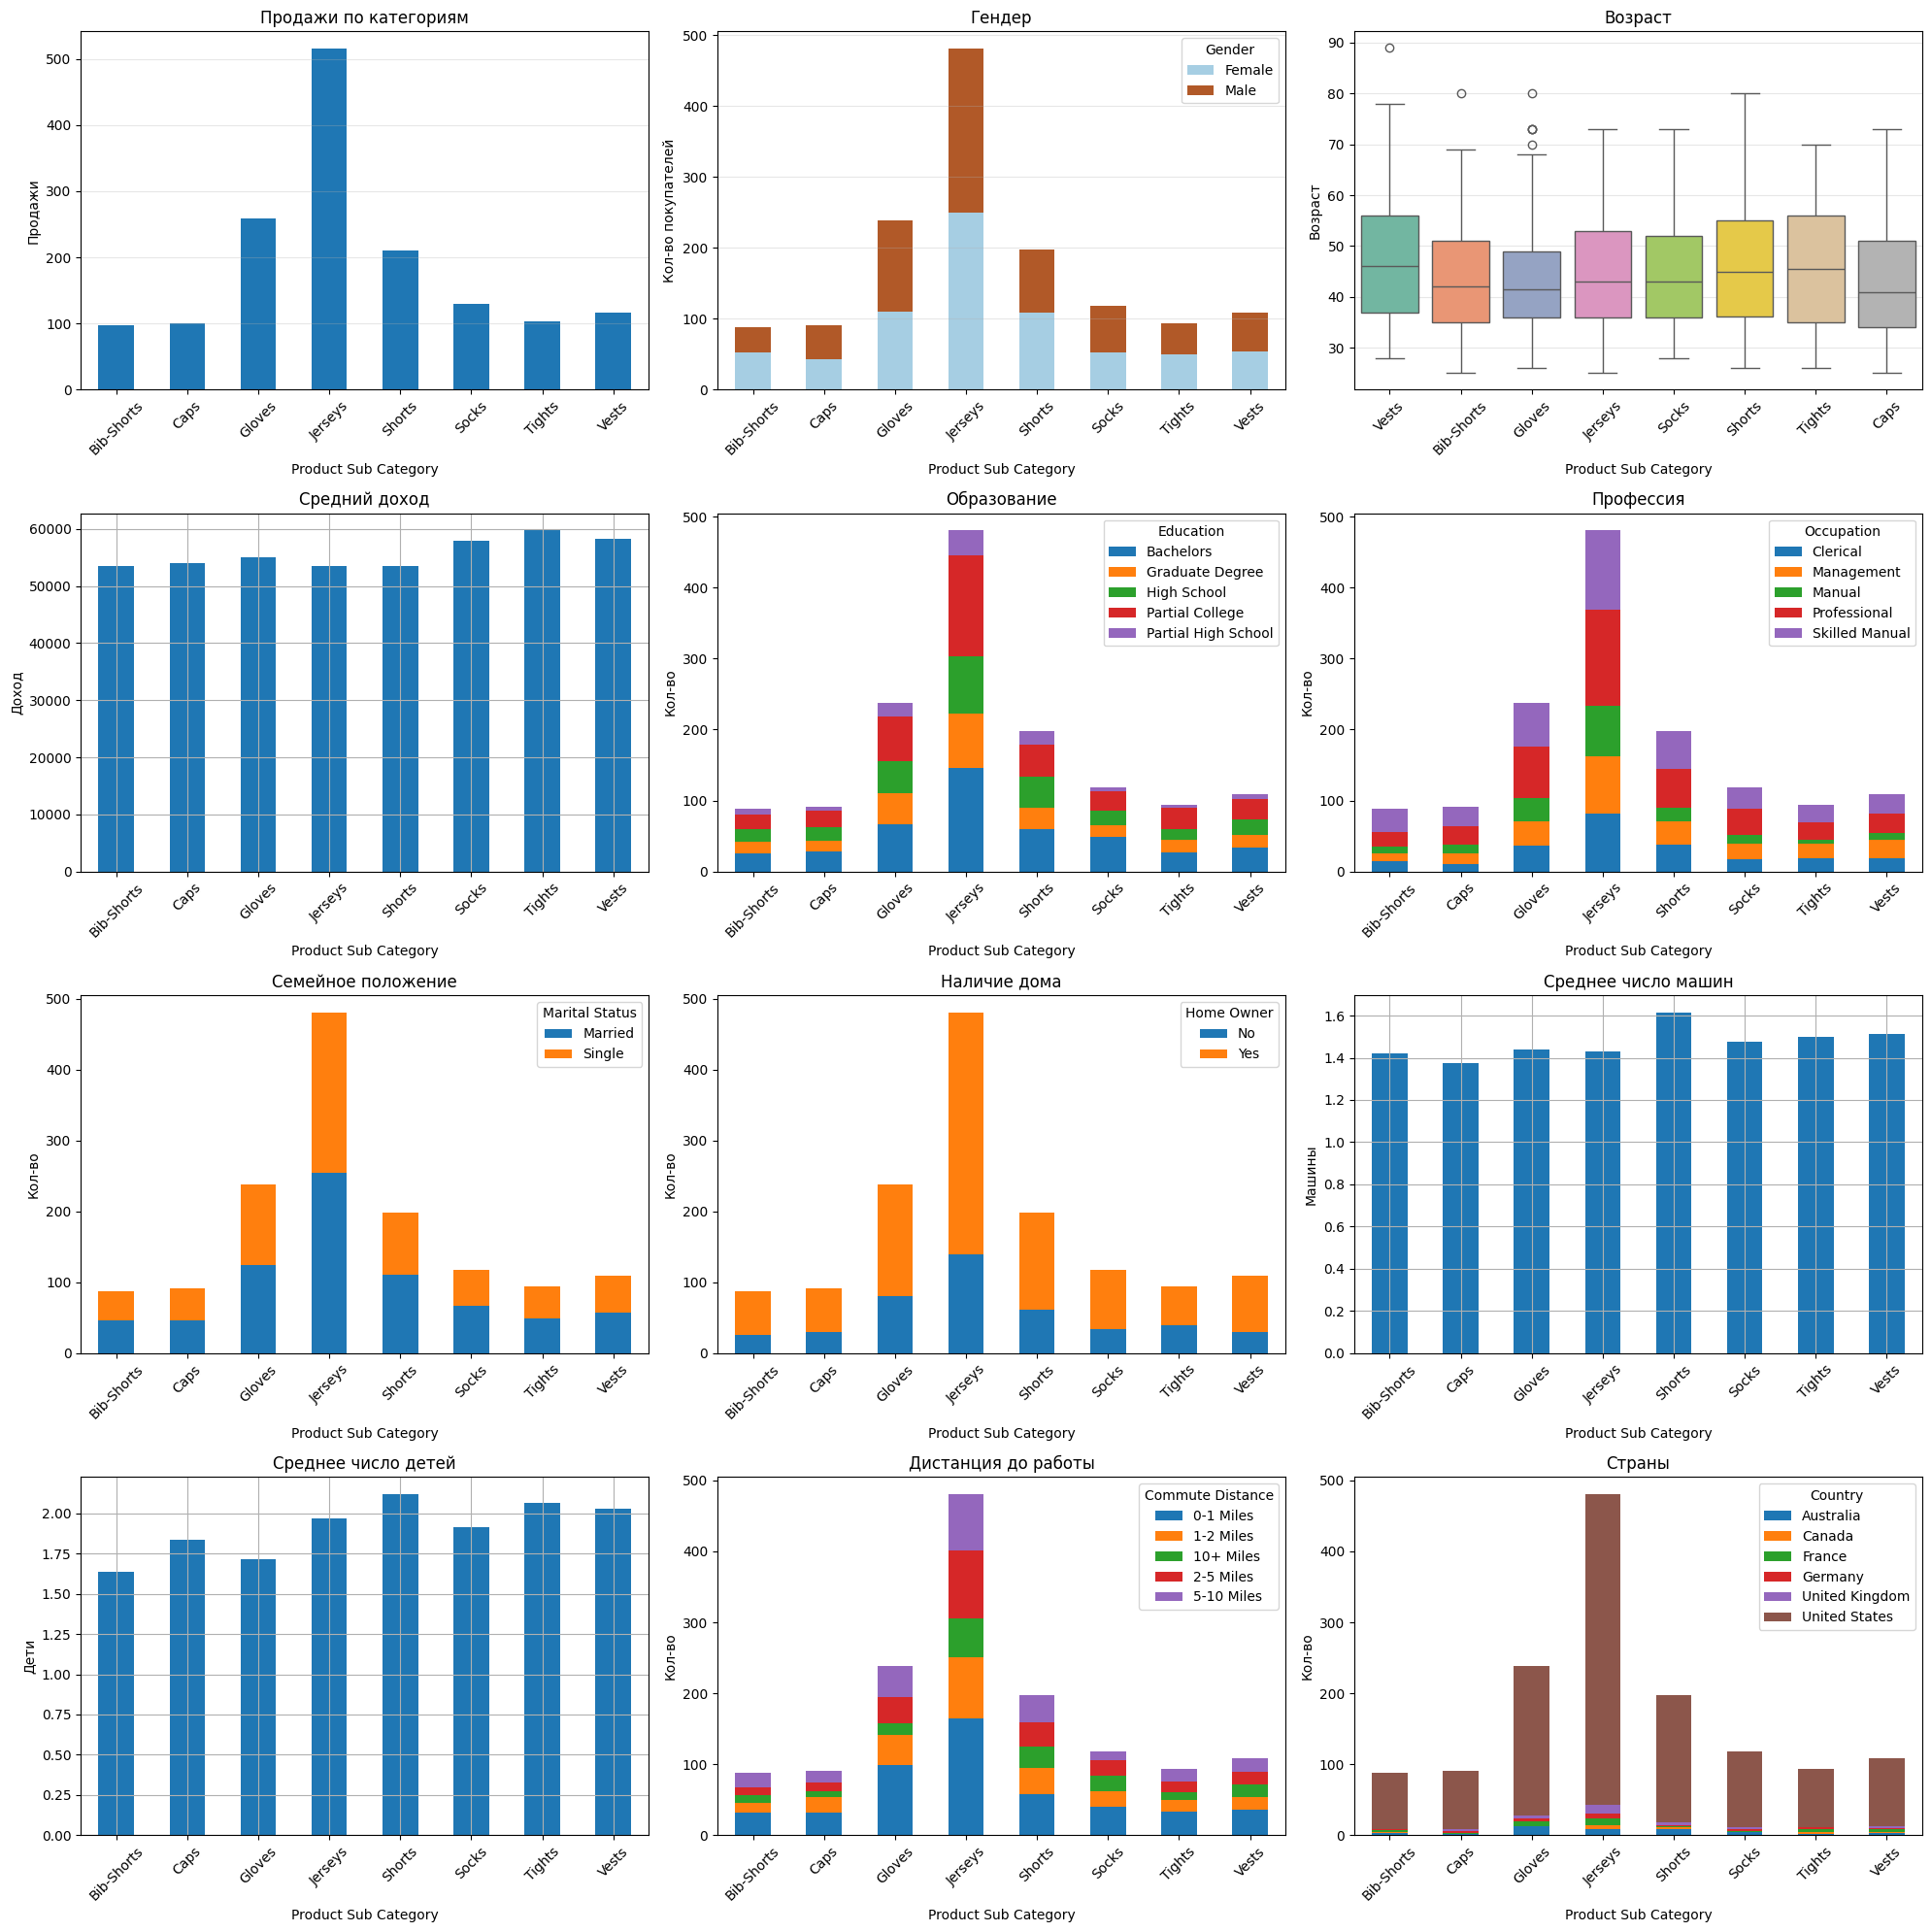

In [142]:
customer_chars(clothing_categories, col='Product Sub Category')

Вывод:
- Самая популярная одежда - `Jerseys`
- В целом, никакая характеристика покупателя не влияет на то, какую одежду он покупает.

#### Accessories

In [143]:
accessories_categories = df[df['Product Category']=='Accessories']
accessories_categories['Product Sub Category'].unique()

array(['Bottles and Cages', 'Other', 'Tires and Tubes', 'Helmets',
       'Cleaners', 'Fenders', 'Hydration Packs', 'Lights', 'Locks',
       'Pumps', 'Bike Stands', 'Bike Racks', 'Panniers'], dtype=object)

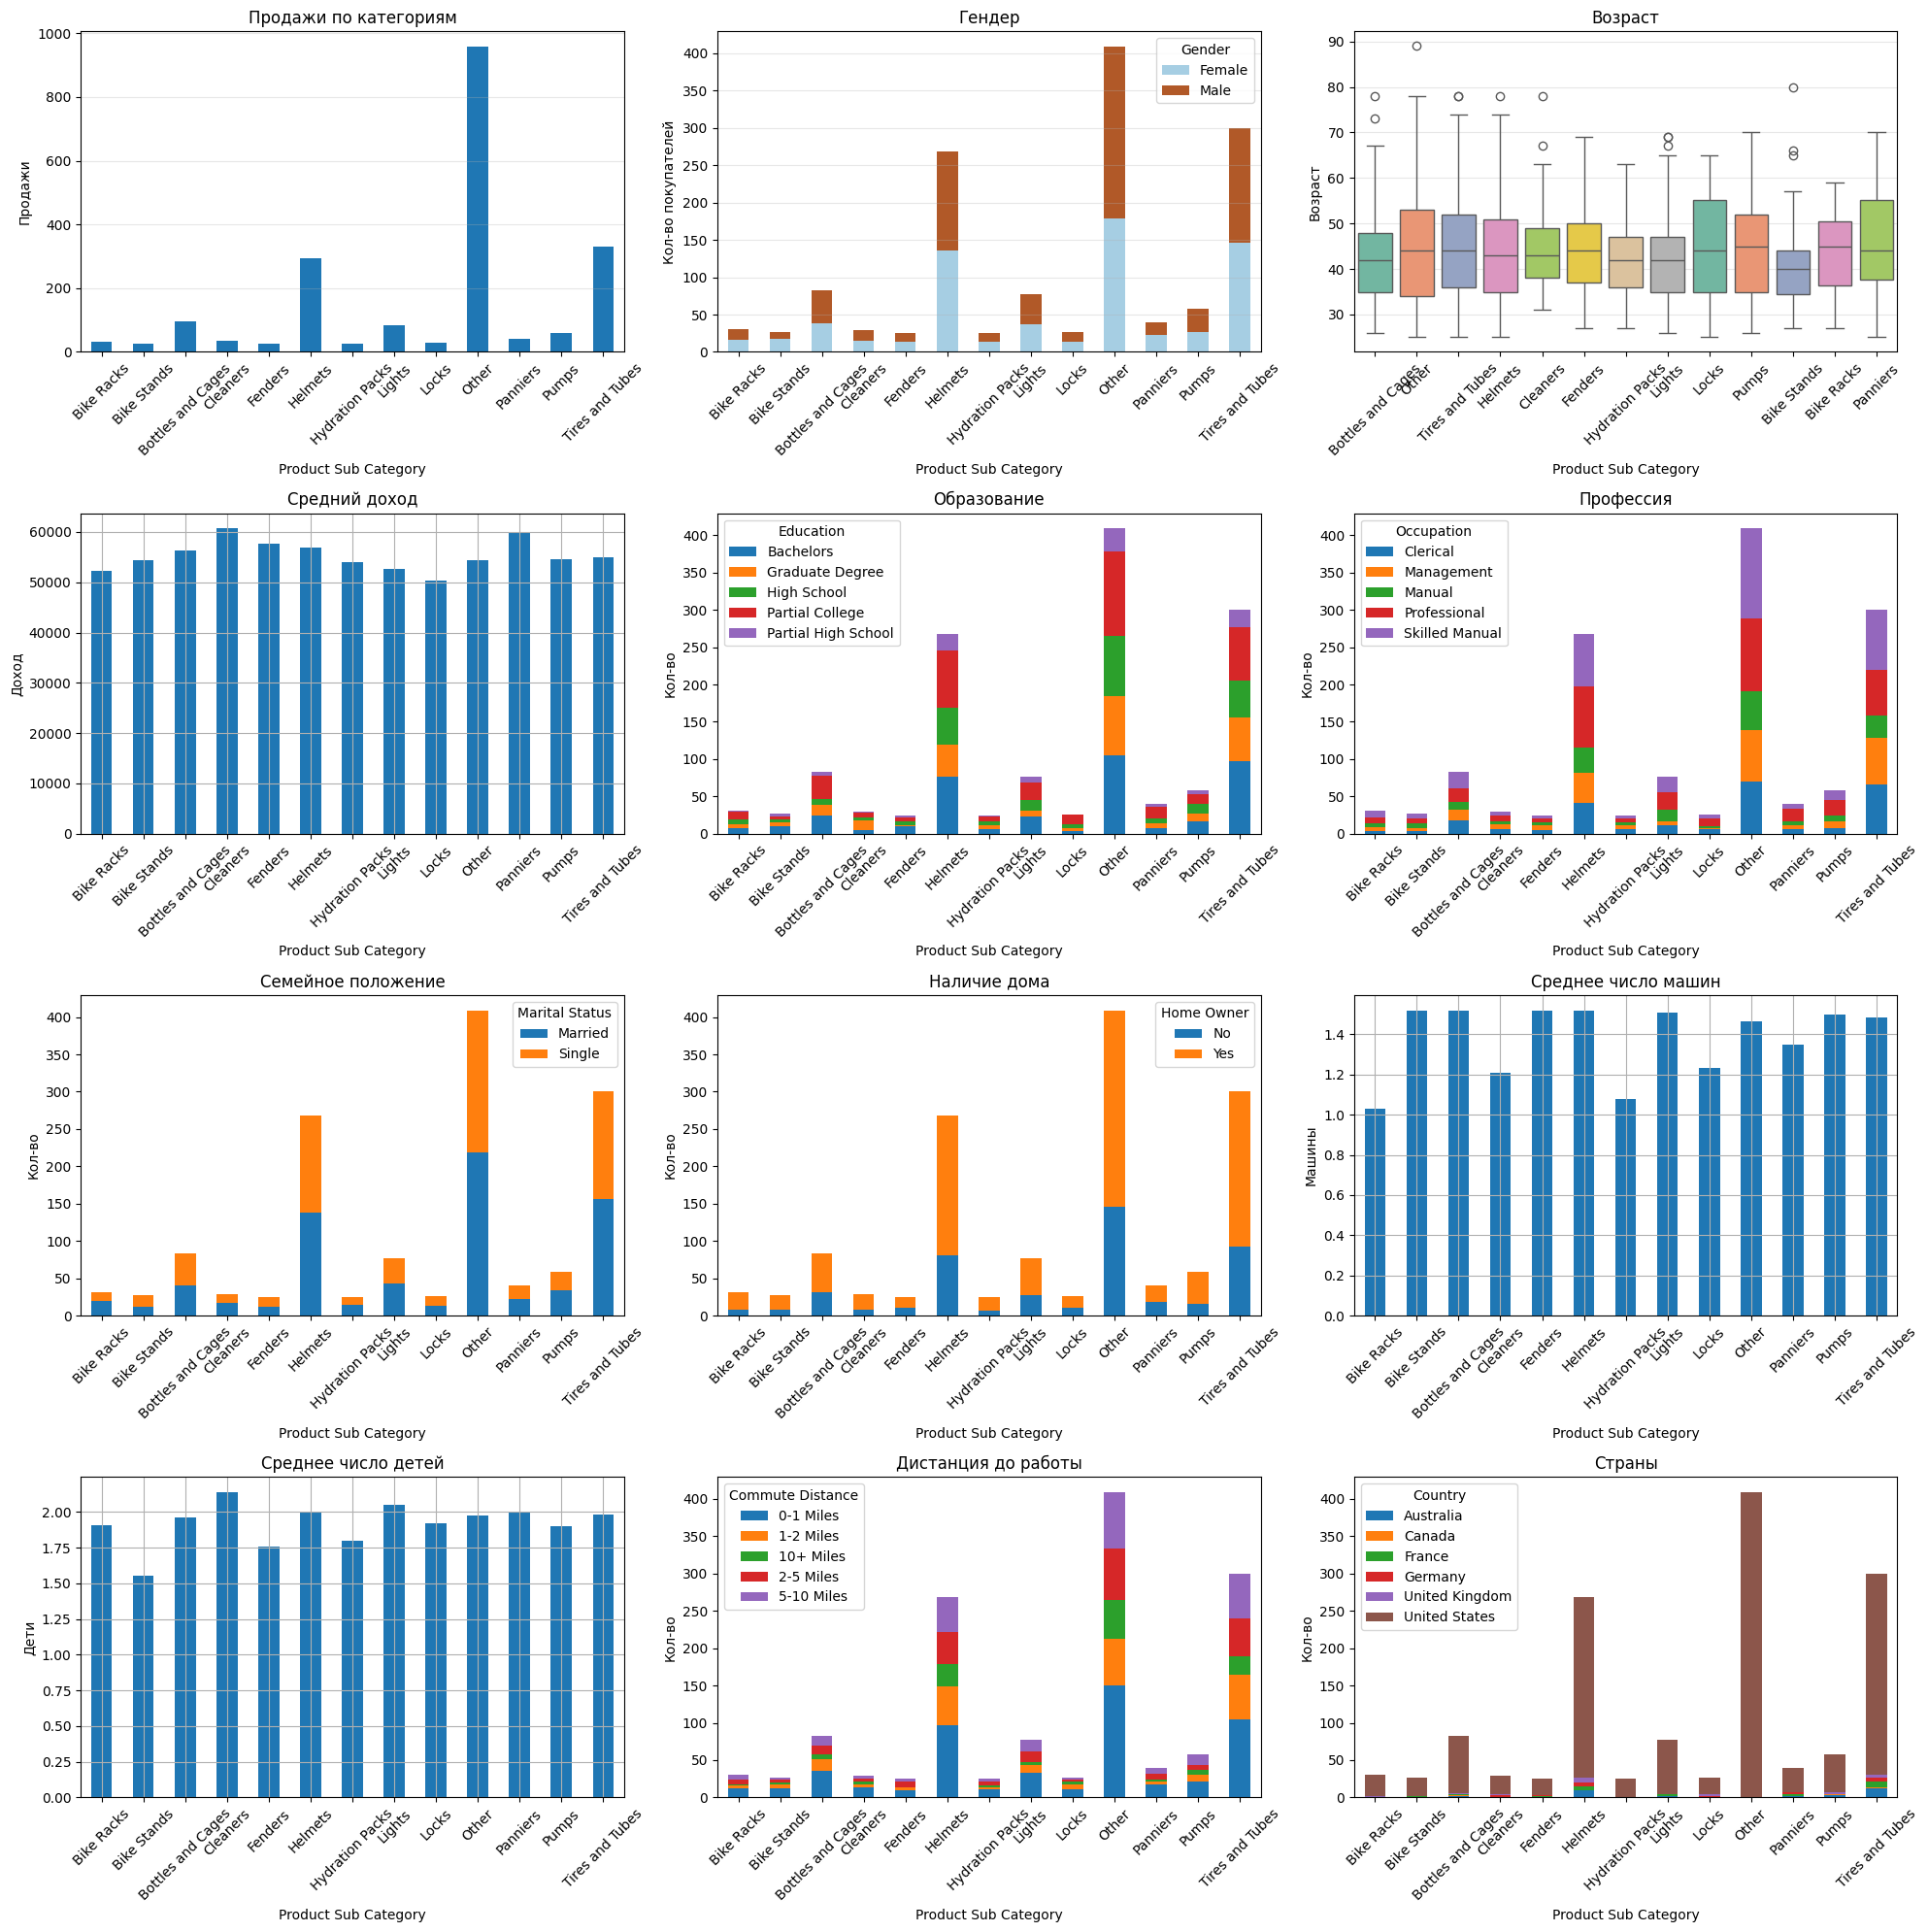

In [144]:
customer_chars(accessories_categories, col='Product Sub Category')

Вывод:
- Наиболее популярные категории товаров - `Helmets` (шлем), `Tires and Tubes` (резина, шины) и `Other`
- В целом, никакая характеристика покупателя не влияет на то, какую одежду он покупает.

ОБЩИЙ ВЫВОД:
- Из `Bikes` более часто берут `Road Bikes`, но по количеству продаж лидирует `Touring Bikes` из-за того, что их часто берут несколько штук за раз.
- Из `Components` чаще всего покупают `Frames` (рамы)для велосипедов всех типов. Затем идут `Wheels`, `Saddles`, `Pedals`.
- Из `Clothing` чаще всего берут `Jerseys`.
- Из `Accessories` чаще всего берут `Helmets` (шлем), `Tires and Tubes` (резина, шины)
- **В целом, никакая характеристика покупателя не влияет на то, какой тип продукта он покупает.**

### Наличие велосипеда [Purchased Bike]

Рассмотрим как влияет наличие или отсутствие байка на покупательское поведение.

In [109]:
df_no_bike = df[df['Purchased Bike']=='No']
df_bike = df[df['Purchased Bike']=='Yes']

unique_customers = df.groupby('Purchased Bike')['customerKey'].nunique()

print(f"Количество покупателей с велосипедом: {unique_customers['Yes']}")
print(f"Количество покупателей без велосипеда: {unique_customers['No']}")

Количество покупателей с велосипедом: 4649
Количество покупателей без велосипеда: 4937


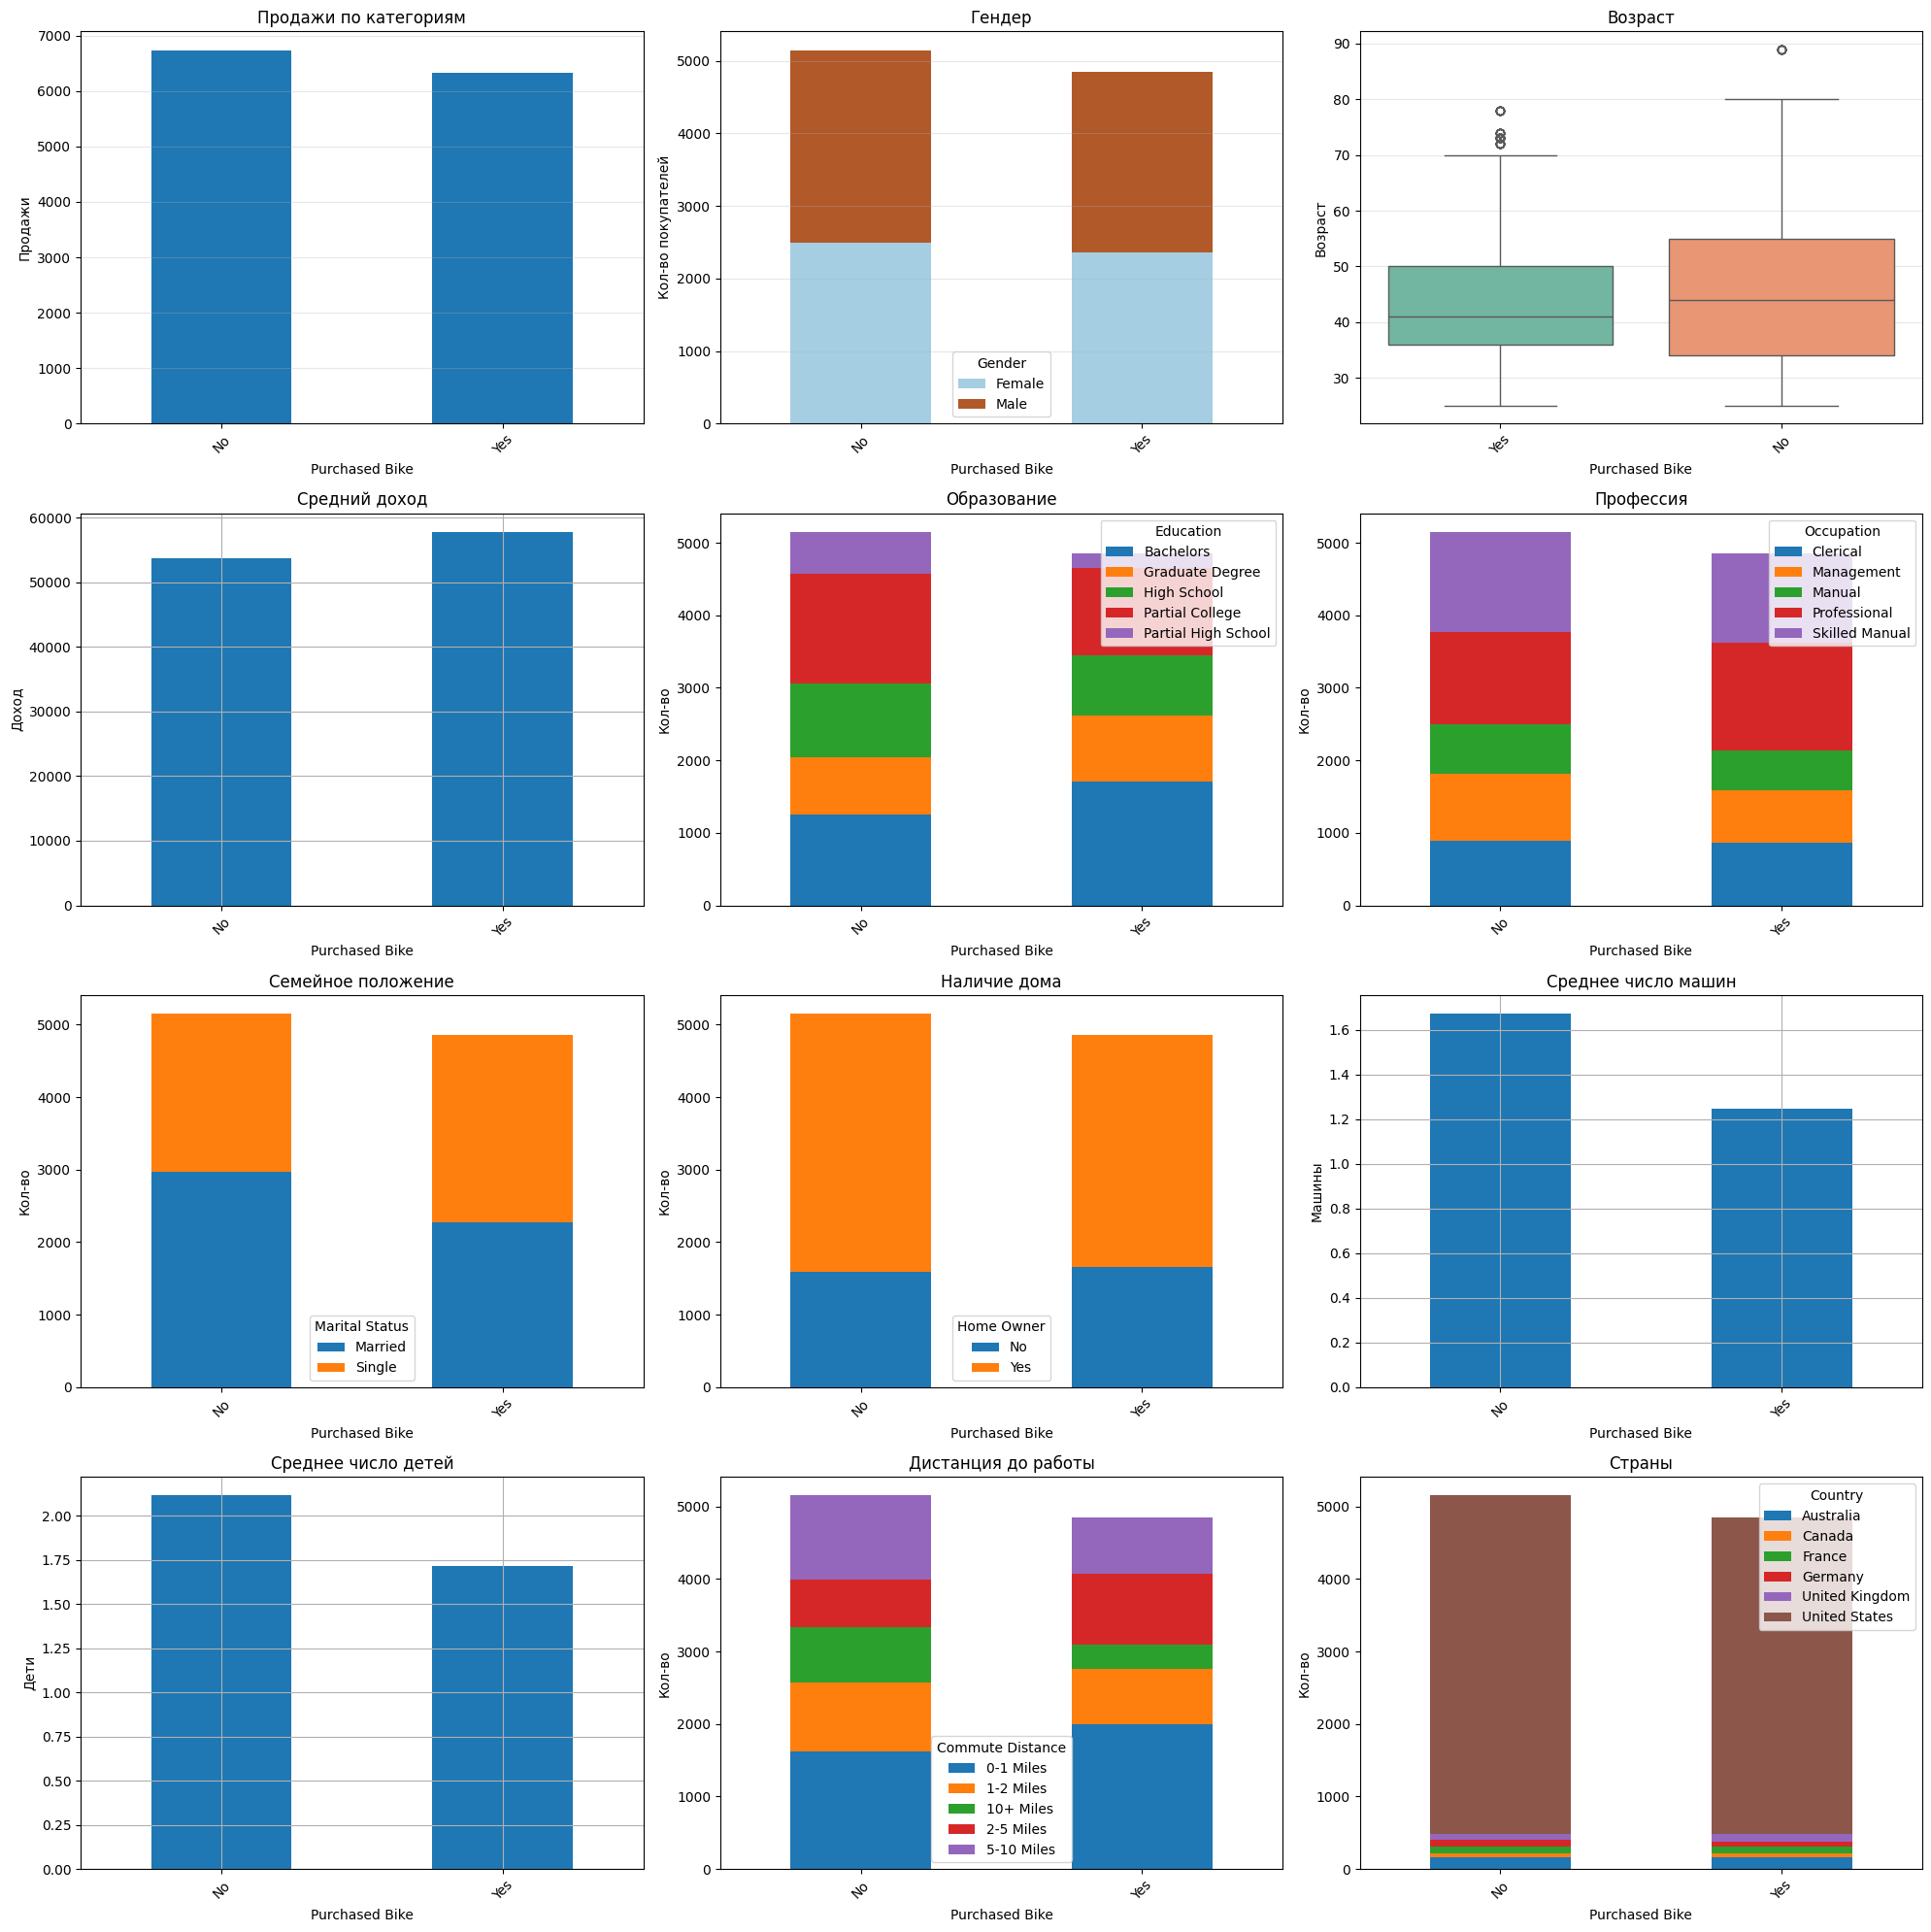

In [116]:
customer_chars(df, 'Purchased Bike')

Люди, имеющие велосипед, в среднем обладают следующими признаками:
- Более высокий доход.
- Чаще всего являются бакалаврами.
- Имеют работу, связанную с профессиональной деятельностью.
- Меньшее число машин.
- Меньше детей.
- Дистанция до работы либо 0-1, либо 2-5 миль.
- Люди без велосипеда чаще всего женаты.

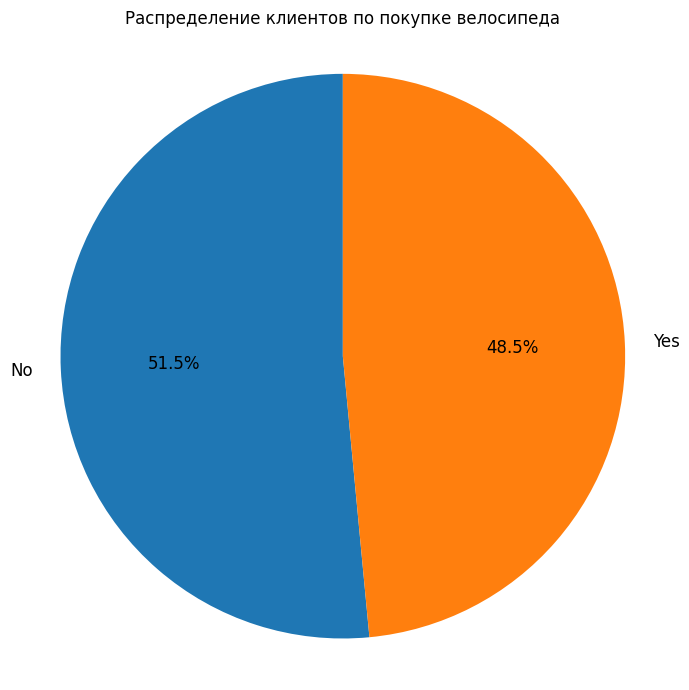

In [146]:
unique_customers = df.groupby('Purchased Bike')['customerKey'].nunique()
labels = unique_customers.index
sizes = unique_customers.values

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

plt.title('Распределение клиентов по покупке велосипеда')
plt.axis('equal')
plt.tight_layout()
plt.show()

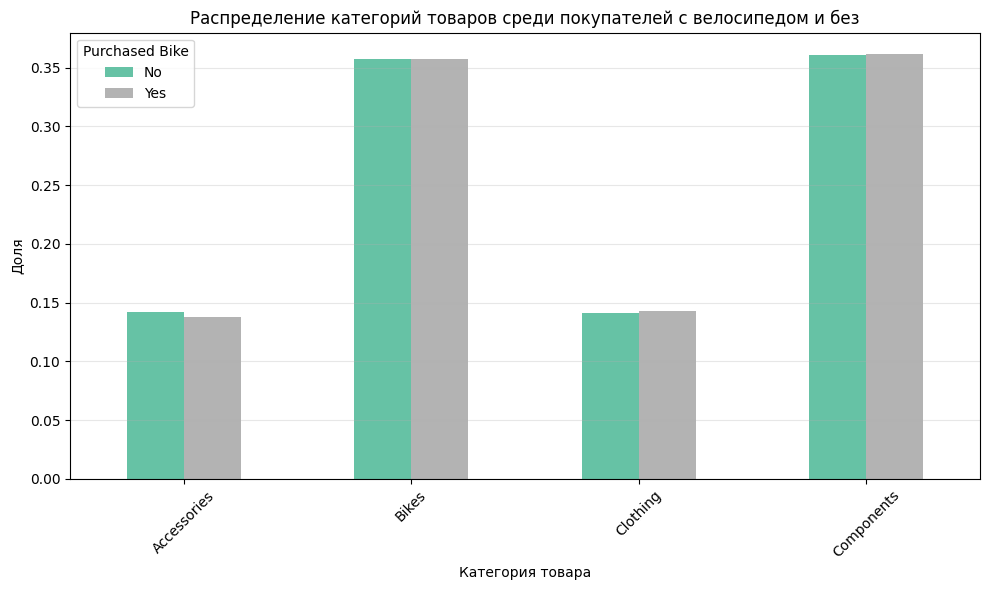

In [147]:
product_bike = pd.crosstab(df['Product Category'], df['Purchased Bike'], normalize='columns')

product_bike.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title('Распределение категорий товаров среди покупателей с велосипедом и без')
plt.ylabel('Доля')
plt.xlabel('Категория товара')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Purchased Bike')
plt.tight_layout()
plt.show()

Видим, на первый взгляд, странную зависимость - люди с и без велосипеда одинаково часто покупают товары компании. Однако это может быть связано с тем, что люди, не имеющие велосипеда являются `Resellers` (реселлерами) - такая метка есть в категориях промоакций (`Promotion Category`). То есть эти люди сами не пользуются велосипедами, а перепродают их.

Посмотрим, есть ли такая зависимость.

In [148]:
print(df_no_bike.groupby('Promotion Category')['customerKey'].count())
print(f"Всего различных покупателей без велосипеда: {df_no_bike['customerKey'].count()}")

Promotion Category
Customer        636
No Discount     329
Reseller       4184
Name: customerKey, dtype: int64
Всего различных покупателей без велосипеда: 5149


Действительно, большинство покупателей без велосипеда воспользовались категорией акции `Reseller`, что указывает на то, что они осуществляют только перепродажу.

Говоря о других покупателях, можно предположить, что они покупают велосипеды или их запчасти в подарок или для своих детей. Посмотрим, так ли это.

In [149]:
df_no_bike_notres = df_no_bike[df_no_bike['Promotion Category']!='Reseller']
df_no_bike_res = df_no_bike[df_no_bike['Promotion Category']=='Reseller']

comparison_table = pd.pivot_table(
    df_no_bike,
    index='Promotion Category',
    values=['Age', 'Income', 'Children'],
    aggfunc=['mean', 'count']
)

comparison_table

mean                         count                
                          Age  Children        Income   Age Children Income
Promotion Category                                                         
Customer            46.044025  2.224843  55597.484277   636      636    636
No Discount         46.702128  2.255319  52948.328267   329      329    329
Reseller            45.016491  2.084608  53542.065010  4184     4184   4184

Вывод: действительно, количество детей у не реселлеров больше, чем у реселлеров.

### Клиенты [customerKey]

Посмотрим, есть ли люди, купившие продукты компании больше одного раза.

In [150]:
loyal_customers_key = df.groupby('customerKey').size().reset_index(name='count')
loyal_customers_key = loyal_customers_key[loyal_customers_key['count'] > 1]

loyal_customers = df[df['customerKey'].isin(loyal_customers_key['customerKey'])]
single_time_customers = df[~df['customerKey'].isin(loyal_customers_key['customerKey'])]

print(f'Количество людей, купивших товары компании >2 раз: {len(loyal_customers)}')
print(f'Количество людей, купивших товары компании 1 раз: {len(single_time_customers)}')

Количество людей, купивших товары компании >2 раз: 734
Количество людей, купивших товары компании 1 раз: 9266


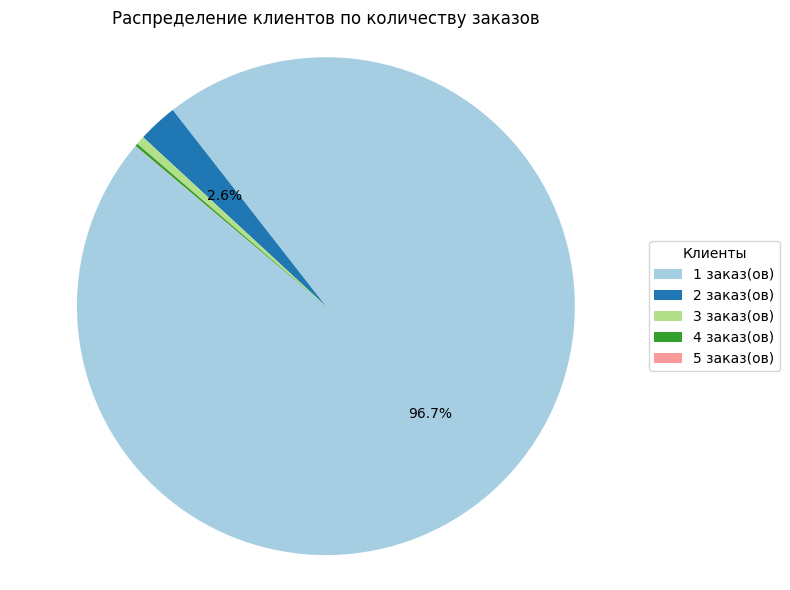

In [151]:
customer_orders = df.groupby('customerKey').size()

order_distribution = customer_orders.value_counts().sort_index()

labels = order_distribution.index
sizes = order_distribution.values

colors = plt.cm.Paired.colors[:len(labels)]

def custom_autopct(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    if val in [order_distribution.loc[1], order_distribution.loc[2]]:
        return f'{pct:.1f}%'
    else:
        return ''

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    autopct=lambda pct: custom_autopct(pct, sizes),
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10}
)

plt.legend(
    wedges,
    [f"{label} заказ(ов)" for label in labels],
    title="Клиенты",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.title("Распределение клиентов по количеству заказов")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [152]:
def customer_chars_2(loyal_df, single_df, col):
    fig, axes = plt.subplots(4, 3, figsize=(24, 24))

    def dual_stacked(feature, title, ax):
        # Кросс-таблицы
        loyal = pd.crosstab(loyal_df[col], loyal_df[feature])
        single = pd.crosstab(single_df[col], single_df[feature])

        # Объединённый DataFrame
        categories = loyal.index.union(single.index)
        subcats = loyal.columns.union(single.columns)

        data = []
        x_labels = []

        for cat in categories:
            l = loyal.loc[cat] if cat in loyal.index else pd.Series(0, index=subcats)
            s = single.loc[cat] if cat in single.index else pd.Series(0, index=subcats)
            data.append(l.reindex(subcats, fill_value=0))
            data.append(s.reindex(subcats, fill_value=0))
            x_labels.extend([f"{cat}\nЛояльные", f"{cat}\nОдиночные"])

        df_plot = pd.DataFrame(data, index=x_labels)

        df_plot.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(title)
        ax.set_ylabel('Кол-во')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title=feature)
        ax.grid(axis='y', alpha=0.3)

    def dual_bar_avg(metric, title, ylabel, ax):
        loyal = loyal_df.groupby(col)[metric].mean()
        single = single_df.groupby(col)[metric].mean()

        all_cats = loyal.index.union(single.index)

        values = []
        x_labels = []

        for cat in all_cats:
            values.extend([loyal.get(cat, 0), single.get(cat, 0)])
            x_labels.extend([f"{cat}\nЛояльные", f"{cat}\nОдиночные"])

        ax.bar(x_labels, values)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

    def dual_bar_total(metric, title, ylabel, ax):
        loyal = loyal_df.groupby(col)[metric].sum()
        single = single_df.groupby(col)[metric].sum()

        all_cats = loyal.index.union(single.index)

        values = []
        x_labels = []

        for cat in all_cats:
            values.extend([loyal.get(cat, 0), single.get(cat, 0)])
            x_labels.extend([f"{cat}\nЛояльные", f"{cat}\nОдиночные"])

        ax.bar(x_labels, values)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

    # 0. Продажи
    dual_bar_total('Quantity', 'Продажи по категориям', 'Продажи', axes[0, 0])

    # 1. Гендер
    dual_stacked('Gender', 'Гендер', axes[0, 1])

    # 2. Возраст (Boxplot)
    combined_df = pd.concat([
        loyal_df.assign(Group='Лояльные'),
        single_df.assign(Group='Одиночные')
    ])
    sns.boxplot(data=combined_df, x=col, y='Age', hue='Group', palette='Set2', ax=axes[0, 2])
    axes[0, 2].set_title('Возраст')
    axes[0, 2].set_ylabel('Возраст')
    axes[0, 2].tick_params(axis='x', rotation=45)

    # 3. Доход
    dual_bar_avg('Income', 'Средний доход', 'Доход', axes[1, 0])

    # 4. Образование
    dual_stacked('Education', 'Образование', axes[1, 1])

    # 5. Профессия
    dual_stacked('Occupation', 'Профессия', axes[1, 2])

    # 6. Семейное положение
    dual_stacked('Marital Status', 'Семейное положение', axes[2, 0])

    # 7. Домовладение
    dual_stacked('Home Owner', 'Наличие дома', axes[2, 1])

    # 8. Машины
    dual_bar_avg('Cars', 'Среднее число машин', 'Машины', axes[2, 2])

    # 9. Дети
    dual_bar_avg('Children', 'Среднее число детей', 'Дети', axes[3, 0])

    # 10. Дистанция до работы
    dual_stacked('Commute Distance', 'Дистанция до работы', axes[3, 1])

    # 11. Страна
    dual_stacked('Country', 'Страны', axes[3, 2])

    plt.tight_layout()
    plt.show()


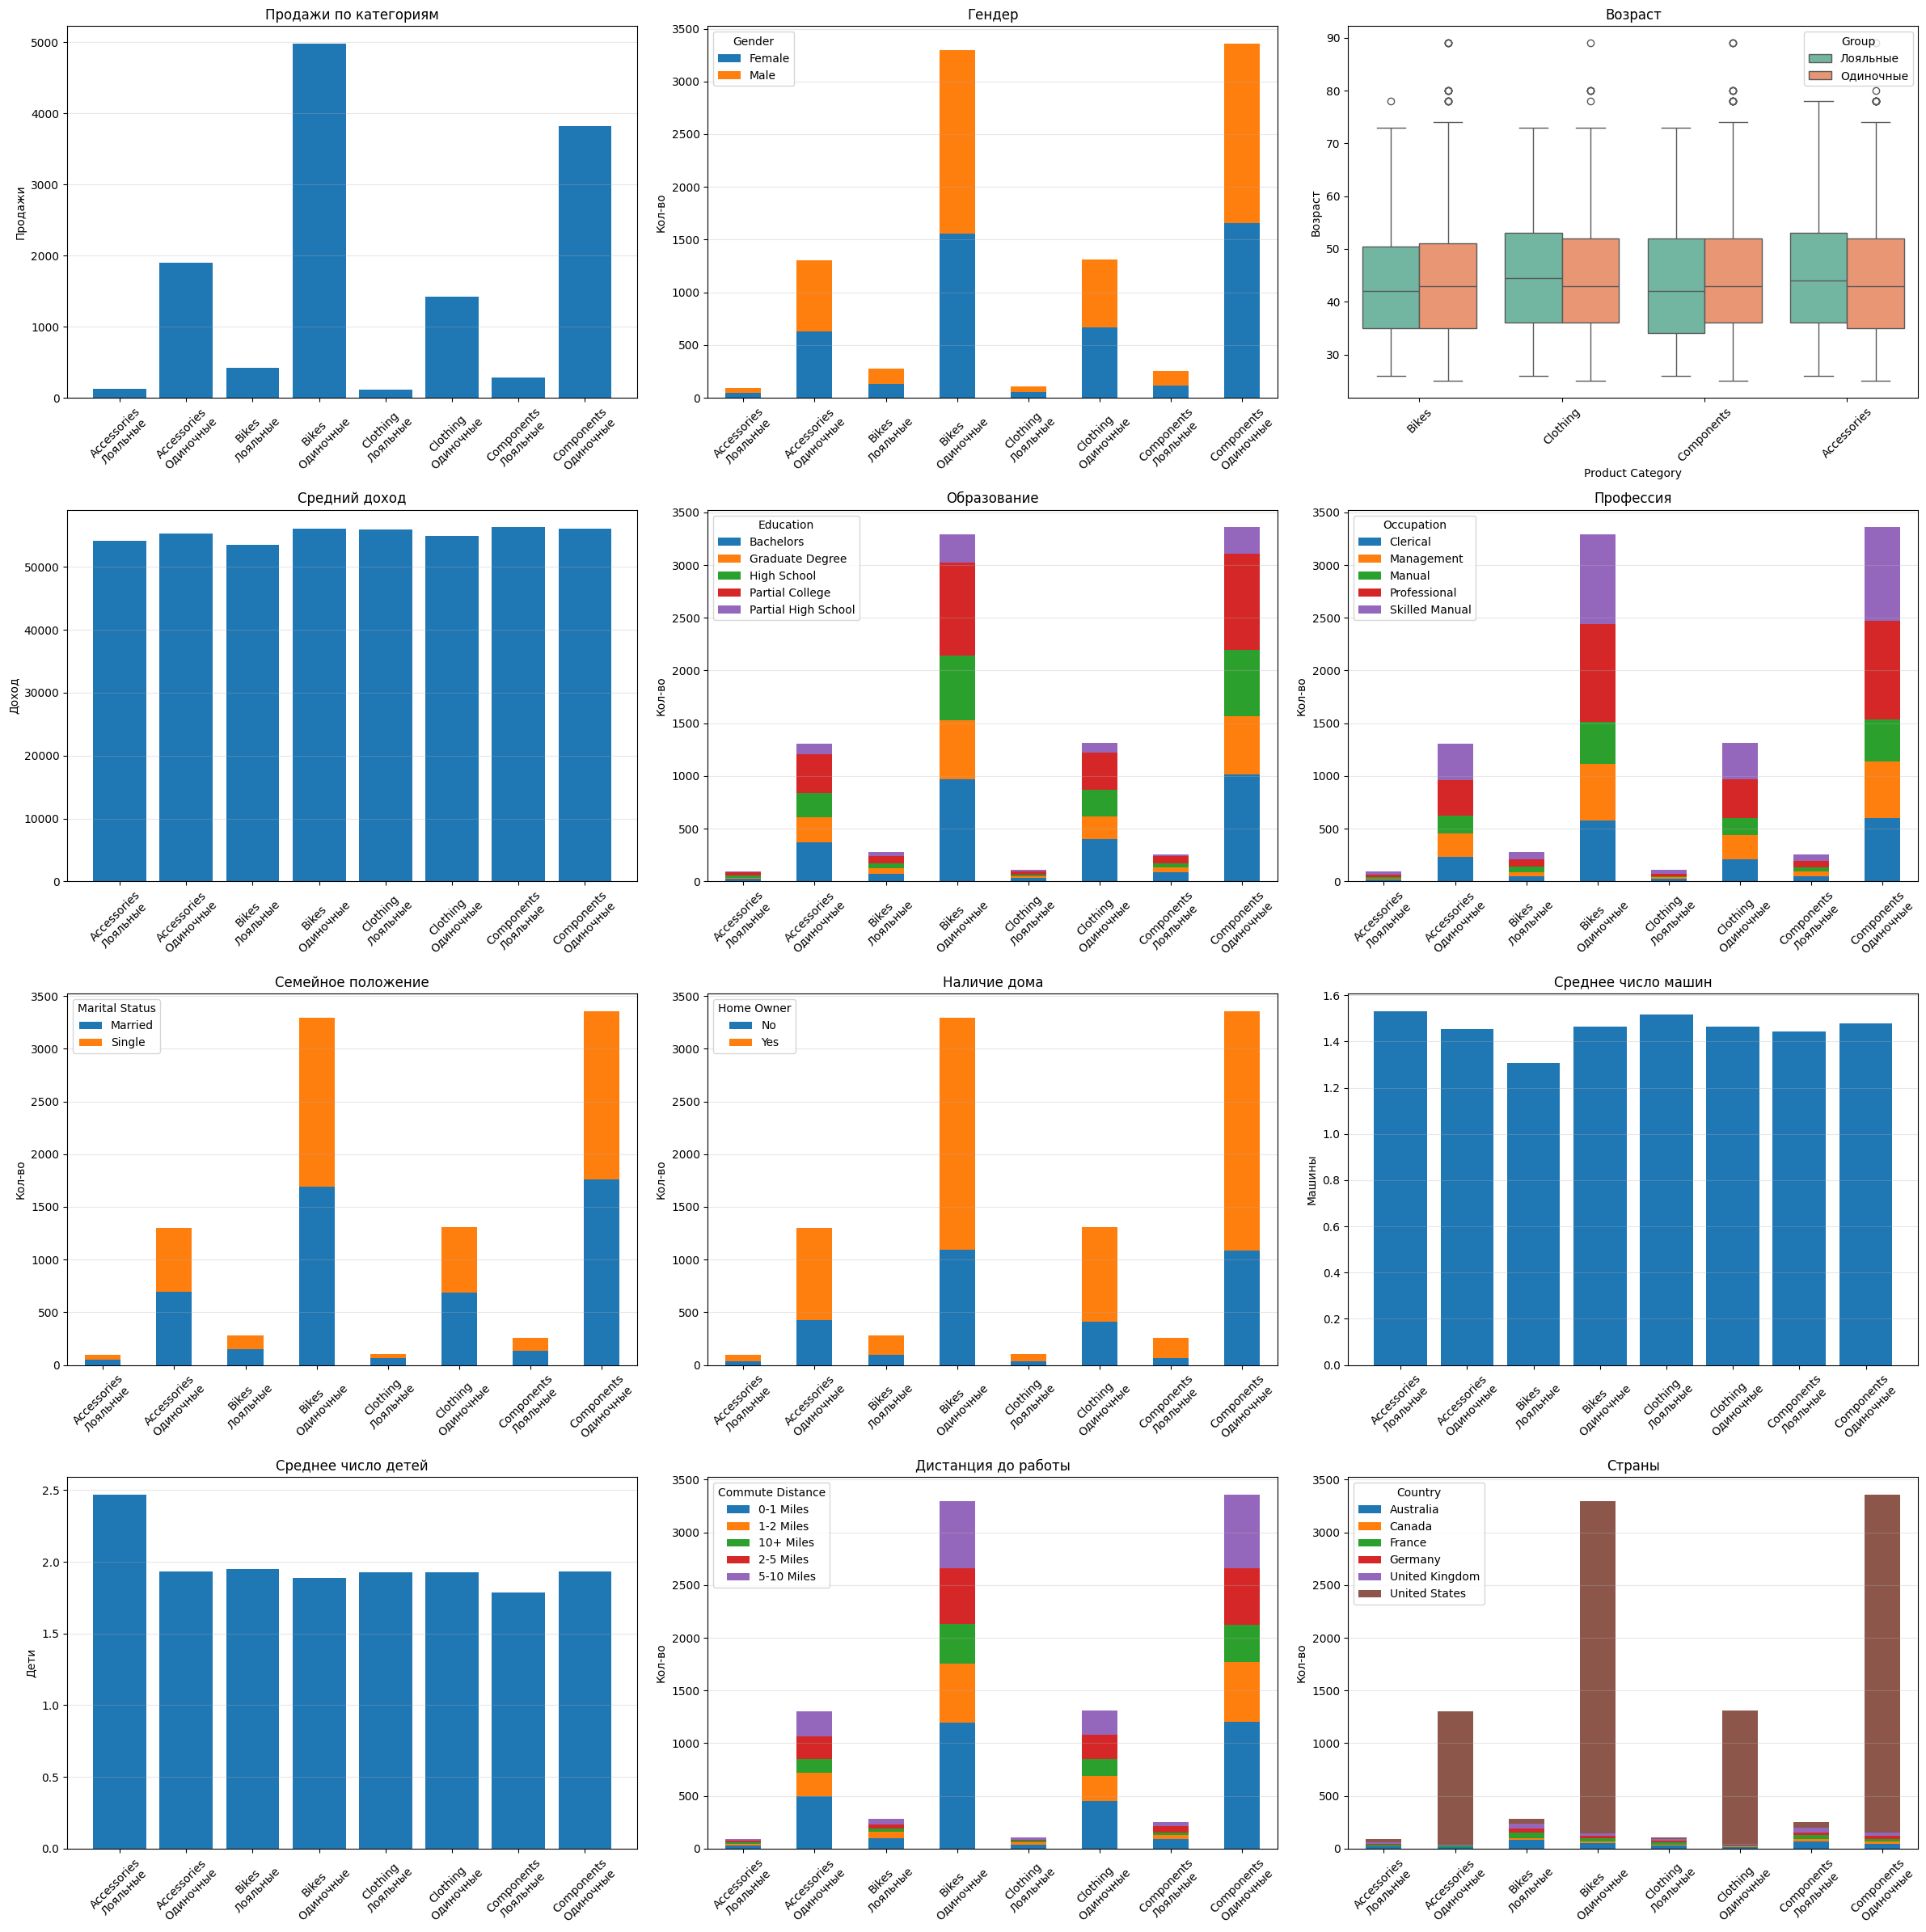

In [153]:
customer_chars_2(loyal_customers, single_time_customers, col='Product Category')

Вывод:
- Большинство "одноразовых" клиентов из США
- Лояльные клиенты, покупающие велосипеды, имеют меньше машин, чем другие.
- Лояльные клиенты с большим количеством детей чаще покупают товары категории `Accessories`
- В остальном характеристики людей, не единожды купивших товар компании, не отличаются от тех, кто купил только один раз.

Посмотрим поподробнее на статистику по странам. Пересчитаем в долях.

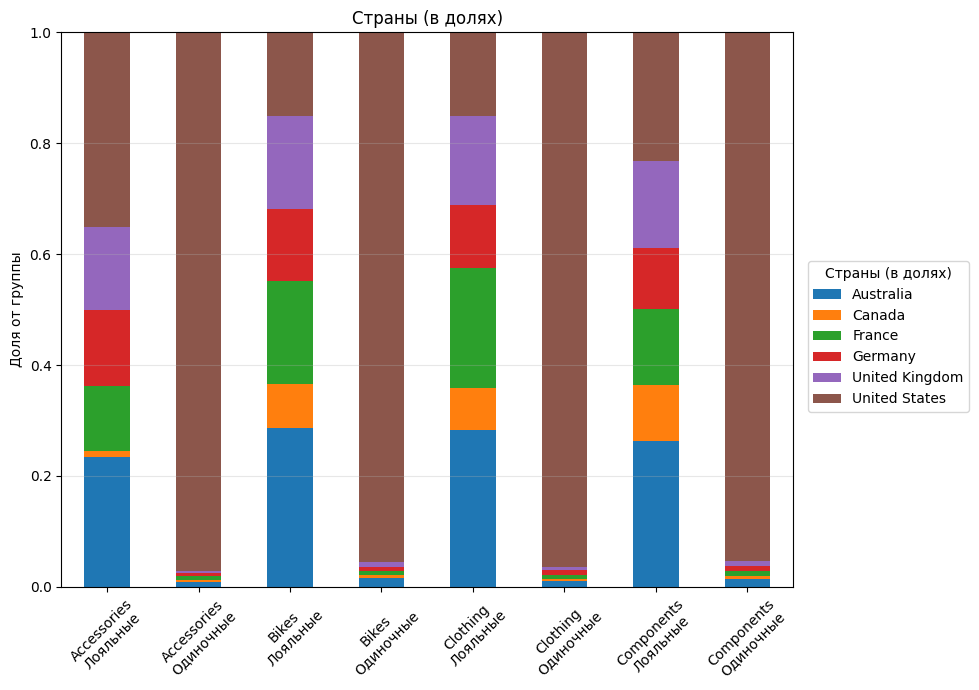

In [154]:
fig, ax = plt.subplots(figsize=(10,7))

loyal = pd.crosstab(loyal_customers['Product Category'], loyal_customers['Country'])
single = pd.crosstab(single_time_customers['Product Category'], single_time_customers['Country'])

# Нормируем по строкам
loyal = loyal.div(loyal.sum(axis=1), axis=0)
single = single.div(single.sum(axis=1), axis=0)

# Объединение
categories = loyal.index.union(single.index)
subcats = loyal.columns.union(single.columns)

data = []
x_labels = []

for cat in categories:
    l = loyal.loc[cat] if cat in loyal.index else pd.Series(0, index=subcats)
    s = single.loc[cat] if cat in single.index else pd.Series(0, index=subcats)
    data.append(l.reindex(subcats, fill_value=0))
    data.append(s.reindex(subcats, fill_value=0))
    x_labels.extend([f"{cat}\nЛояльные", f"{cat}\nОдиночные"])

df_plot = pd.DataFrame(data, index=x_labels)

df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Страны (в долях)')
ax.set_ylabel('Доля от группы')
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Страны (в долях)', bbox_to_anchor = (1.25, 0.6), loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [155]:
def plot_loyalty_by_country(loyal_df, single_df):
    # Подсчёт количества клиентов по странам
    loyal_counts = loyal_df['Country'].value_counts()
    single_counts = single_df['Country'].value_counts()

    # Объединение в таблицу
    combined = pd.DataFrame({
        'Лояльные': loyal_counts,
        'Одиночные': single_counts
    })

    # Подсчёт долей от общего числа клиентов в стране
    combined['Всего'] = combined['Лояльные'] + combined['Одиночные']
    combined['Доля лояльных'] = combined['Лояльные'] / combined['Всего']
    combined['Доля одиночных'] = combined['Одиночные'] / combined['Всего']

    # Подготовка данных для графика
    share_df = combined[['Доля лояльных', 'Доля одиночных']].sort_index()

    # Построение графика
    share_df.plot(
        kind='barh',
        stacked=True,
        figsize=(12, 8),
    )

    plt.title('Доли лояльных и одиночных клиентов по странам')
    plt.xlabel('Доля клиентов')
    plt.ylabel('Страна')
    plt.xlim(0, 1)
    plt.grid(axis='x', alpha=0.3)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

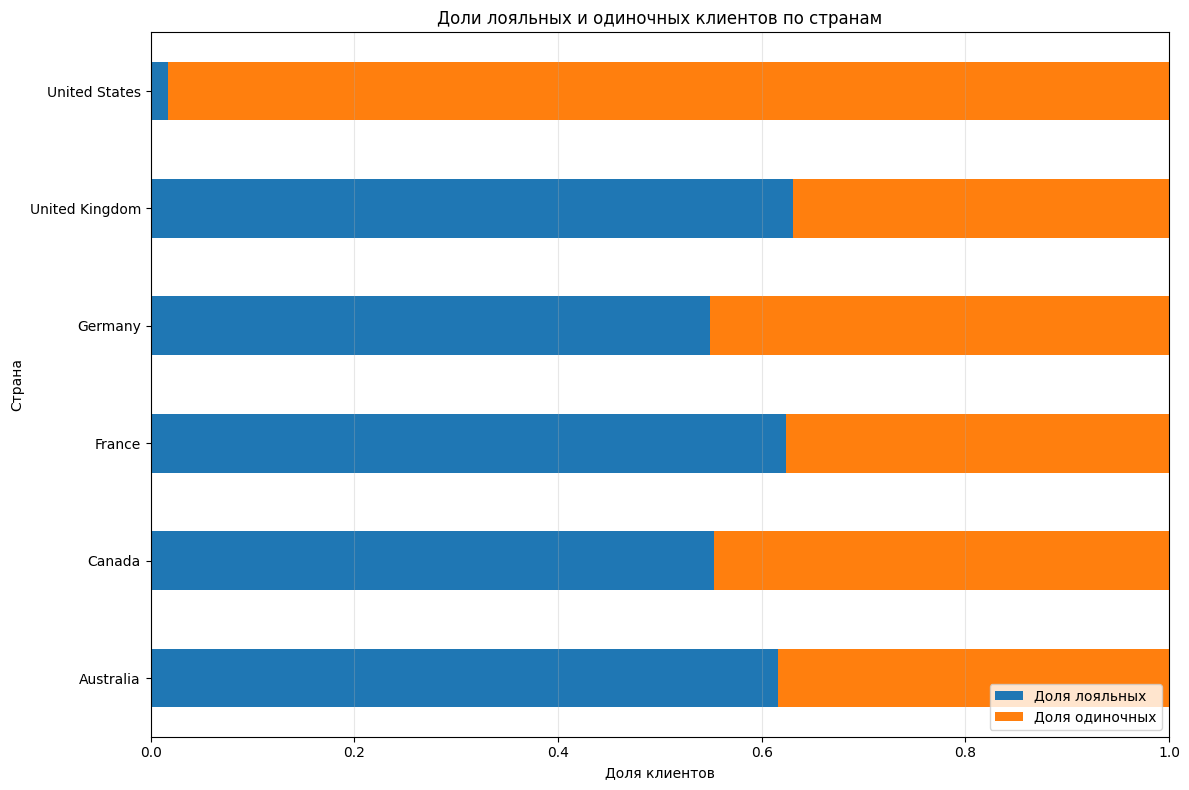

In [156]:
plot_loyalty_by_country(loyal_customers, single_time_customers)

Выводы:
- "Одноразовые" клиенты чаще всего из США
- Большую часть клиентов в Британии, Германии, Франции, Канаде и Австралии составляют лояльные клиенты.

Посмотрим, сколько людей из каждой группы (лояльные и обычные) являются реселлерами.

In [157]:
def plot_promotion_share_stacked(loyal_df, single_df):
    # Подсчёт долей категорий промоакций в каждой группе
    loyal_share = loyal_df['Promotion Category'].value_counts(normalize=True)
    single_share = single_df['Promotion Category'].value_counts(normalize=True)

    # Получаем все уникальные категории
    all_categories = sorted(set(loyal_share.index).union(single_share.index))

    # Формируем DataFrame
    data = pd.DataFrame({
        'Loyal': [loyal_share.get(cat, 0) for cat in all_categories],
        'Single': [single_share.get(cat, 0) for cat in all_categories]
    }, index=all_categories).T  # транспонируем, чтобы строки были: Loyal, Single

    # Построение stacked barplot
    ax = data.plot(kind='barh', stacked=True, figsize=(10, 4), colormap='Set2')

    ax.set_title('Доли категорий промо-акций среди Loyal и Single клиентов')
    ax.set_xlabel('Доля внутри группы')
    ax.set_ylabel('Тип клиента')
    ax.set_xlim(0, 1)
    ax.legend(title='Promotion Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

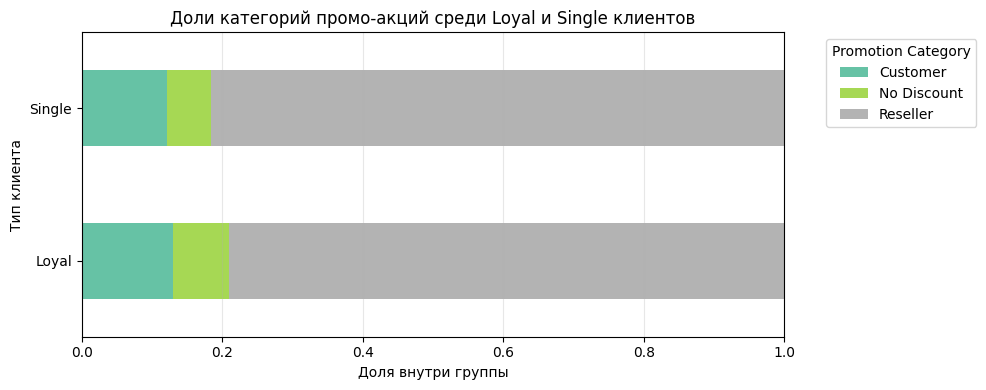

In [158]:
plot_promotion_share_stacked(loyal_customers, single_time_customers)

Вывод: Корреляции между статусом клиента (Реселлер или нет) и его лояльностью нет никакой зависимости.

### Страны, штаты [Country, State]

Посмотрим на распределение по странам.

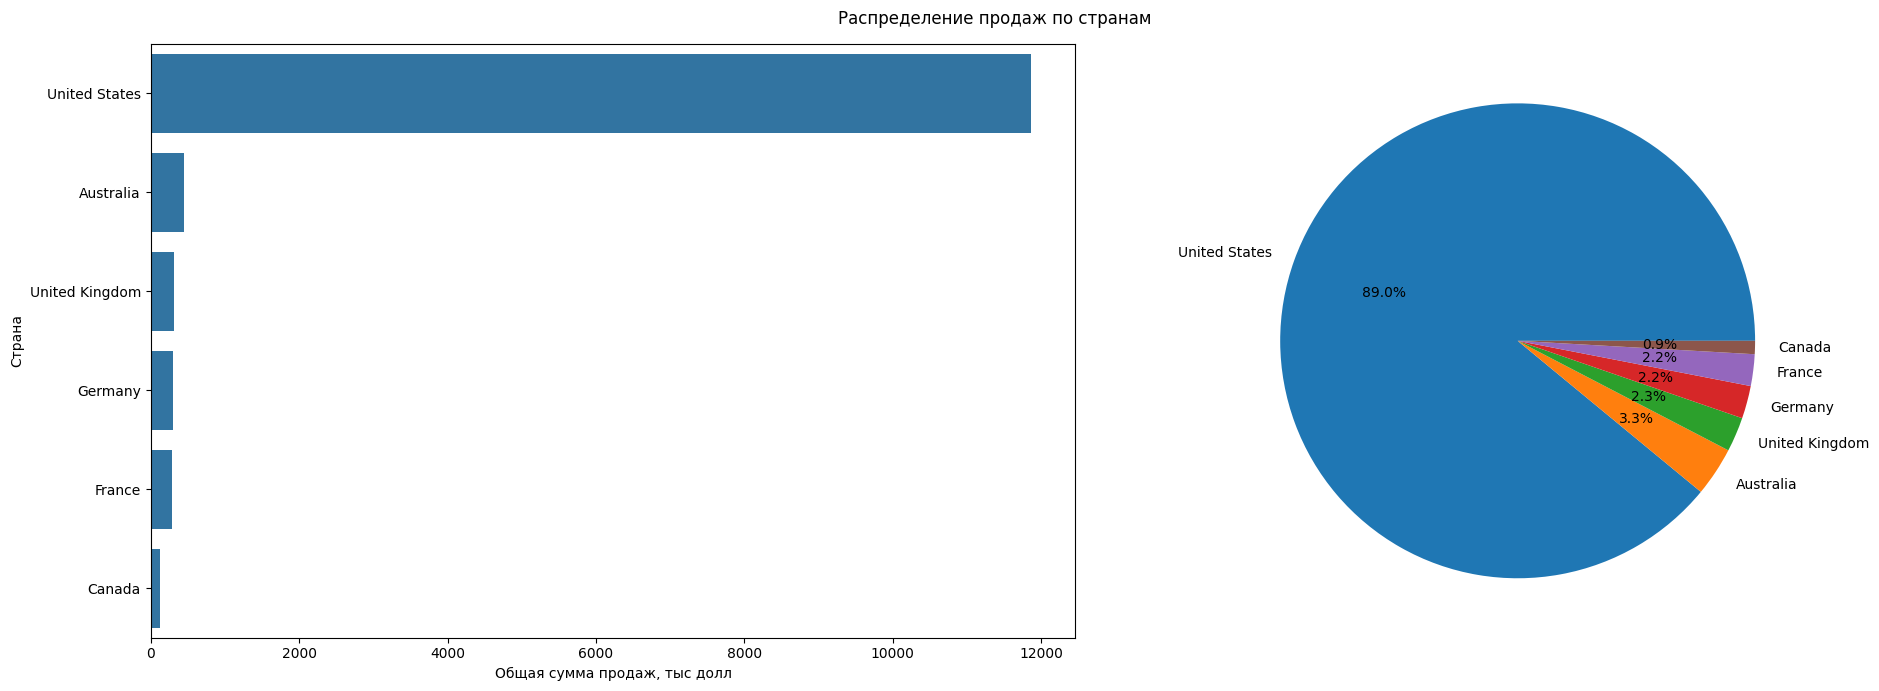

In [169]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()
sales_by_country = sales_by_country.sort_values(by='Sales', ascending=False)
sales_by_country['Sales'] = sales_by_country['Sales']//1000

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.barplot(data=sales_by_country, x='Sales', y='Country', ax=ax1)
ax1.set_xlabel('Общая сумма продаж, тыс долл')
ax1.set_ylabel('Страна')

ax2.pie(x=sales_by_country['Sales'], labels=sales_by_country['Country'], autopct='%1.1f%%')

plt.suptitle('Распределение продаж по странам')
plt.tight_layout()
plt.show()

Для США подробнее рассмотрим наиболее прибыльные штаты.

In [160]:
sales_by_state = df[df['Country']=='United States'].groupby('State')['Sales'].sum().reset_index()

sales_by_state = sales_by_state.sort_values(by='Sales', ascending=False)
sales_by_state['Sales'] = sales_by_state['Sales']//1000

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_state, x='Sales', y='State')
plt.title('Распределение продаж по странам')
plt.xlabel('Общая сумма продаж, тыс долл')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()

Вывод:

Наиболее прибыльной страной является США.

Самые прибыльные штаты:
- Калифорния
- Нью-Джерси
- Нью-Йорк
- Пенсильвания
- Техас
- Огайо

### Тип промоакции [Promotion Type]

Посмотрим на прибыльность каждого типа промоакции.

In [161]:
promo_sales = df.groupby('Promotion Type')['Sales'].sum().reset_index()

promo_sales = promo_sales.sort_values(by='Sales', ascending=False)
promo_sales['Sales'] = promo_sales['Sales']//1000

plt.figure(figsize=(10,6))
sns.barplot(data=promo_sales, x='Promotion Type', y='Sales', palette='coolwarm', hue='Promotion Type')

plt.title('Суммарные продажи по категориям промоакций')
plt.xlabel('Категория промоакции')
plt.ylabel('Сумма продаж, тыс долл')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Посмотрим на продажи ключевых категорий товаров при разных типах `Promotion Type`.

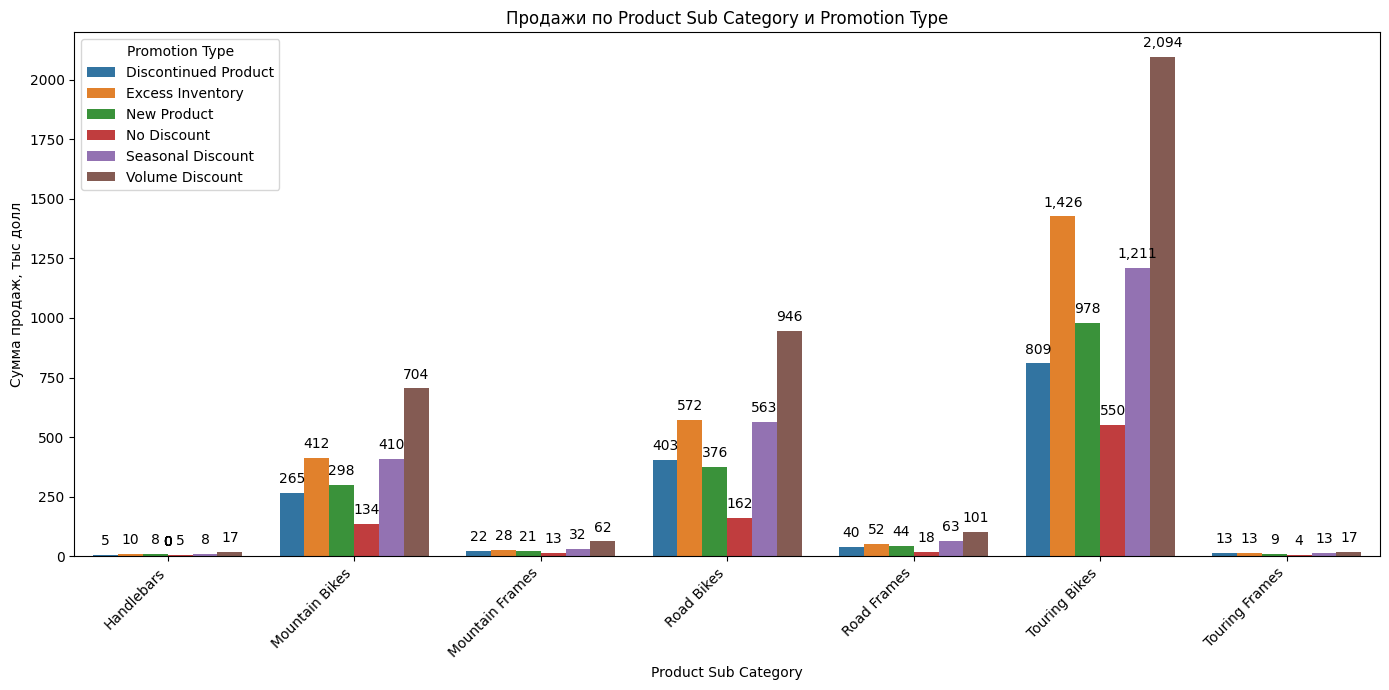

In [105]:
target_subcategories = [
    'Touring Bikes', 
    'Road Bikes', 
    'Mountain Bikes', 
    'Touring Frames', 
    'Road Frames', 
    'Mountain Frames', 
    'Handlebars'
]

df_filtered = df[df['Product Sub Category'].isin(target_subcategories)]

sales_grouped = df_filtered.groupby(['Product Sub Category', 'Promotion Type'])['Sales'].sum().reset_index()
sales_grouped['Sales'] = sales_grouped['Sales']//1000

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=sales_grouped, 
    x='Product Sub Category', 
    y='Sales', 
    hue='Promotion Type', 
)

plt.title('Продажи по Product Sub Category и Promotion Type')
plt.xlabel('Product Sub Category')
plt.ylabel('Сумма продаж, тыс долл')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.legend(title='Promotion Type')
plt.tight_layout()
plt.show()

Вывод:

Везде наблюдается одна и та же зависимость:
- Наибольшее количество продаж приходится на тип промоакции `Volume Discount` для реселлеров.
- Вторая по эффективности акция - `Exsess Inventory`, затем - `Seasonal Discount`.

### Manufacturers

In [106]:
sales_grouped_manufacturers = df_filtered.groupby(['Product Sub Category', 'Manufacturer'])['Sales'].sum().reset_index()
sales_grouped_manufacturers['Sales'] = sales_grouped_manufacturers['Sales']//1000

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=sales_grouped_manufacturers, 
    x='Product Sub Category', 
    y='Sales', 
    hue='Manufacturer'
)

plt.title('Продажи по Product Sub Category и Manufacturer')
plt.xlabel('Product Sub Category')
plt.ylabel('Сумма продаж, тыс долл')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.legend(title='Promotion Type')
plt.tight_layout()
plt.show()

Вывод:

- В категории `Touring Bikes` наблюдается явное лидерство `Ribuck` и `Over Armour`, в то время как бренды `Princess` и `Poomah` сильно отстают.
- В других категориях разница между брендами более равномерная.

## КОРРЕЛЯЦИИ

### ПОДГОТОВКА ДАННЫХ

Сделаем общую матрицу корреляций для некоторых признаков.

Отдельные матрицы корреляций построим для:
- `Product Category`
- `Promotion Type`

Исключаем признаки:
- `customerKey`, `salesPersonKey` - не будет использоваться, так как корреляция с ID неприменима для анализа
- `City`, `State`, `Country` - невозможно перевести в числовой формат для проверки корерляции.
- `Product`, `Promotion`, `Promotion Category` - невозможно закодировать в числовой формат для проверки корреляции.
- `Color`, `Size`, `Weight`, `Class`, `Style`
- `Manufacturer`, `Manufacturer Grouping`, `Market`

In [ ]:
df_corr = df.copy(deep=True)

In [ ]:
df_corr['dateKey'] = pd.to_numeric(df_corr['dateKey']) // 10**9

df_corr['Marital Status'] = df_corr['Marital Status'].apply(lambda x: 1 if x=='Married' else 0)

df_corr['Gender'] =  df_corr['Gender'].apply(lambda x: 1 if x=='Male' else 0)

education_levels = ["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"]
df_corr['Education'] =  df_corr['Education'].apply(lambda x: education_levels.index(x))

# Ранжируем профессию по возрастанию зарплаты
occupation_levels = ['Manual', 'Skilled Manual', 'Clerical', 'Professional', 'Management']
df_corr['Occupation'] =  df_corr['Occupation'].apply(lambda x: occupation_levels.index(x))

df_corr['Home Owner'] = df_corr['Home Owner'].apply(lambda x: 1 if x=='Yes' else 0)

distance_levels = ['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles']
df_corr['Commute Distance'] = df_corr['Commute Distance'].apply(lambda x: distance_levels.index(x))

df_corr['Purchased Bike'] = df_corr['Purchased Bike'].apply(lambda x: 1 if x=='Yes' else 0)

df_corr.head()

customerKey     dateKey  salesPersonKey  Quantity    Price  Margin  \
0       216806  1214611200             289         1  1315.00    0.30   
1        74258  1228348800             295         1  1315.00    0.30   
2        64738  1213833600             292         1    29.00    0.37   
3       268812  1256256000             282         1   327.24    0.27   
4       400368  1244678400             288         1  1322.88    0.24   

        Cost   OverHead  returns    Sales   Expenses  net profit  net margin  \
0   920.5000  118.35000      0.0  1315.00   920.5000   276.15000        21.0   
1   920.5000  118.35000      0.0  1315.00   920.5000   276.15000        21.0   
2    18.2700    3.21900      0.0    29.00    18.2700     7.51100        25.9   
3   238.8852   17.67096      0.0   327.24   238.8852    70.68384        21.6   
4  1005.3888   95.24736      0.0  1322.88  1005.3888   222.24384        16.8   

         City       State         Country  Marital Status  Gender  Income  \
0  Huntington    New York   United States               0       1  110000   
1  Kenilworth  New Jersey   United States               0       0   20000   
2   Frankfort    Kentucky   United States               1       1  100000   
3    New York    New York   United States               1       1   40000   
4      London     England  United Kingdom               1       0   90000   

   Children  Education  Occupation  Home Owner  Cars  Commute Distance  Age  \
0         0          2           4           0     3                 4   32   
1         0          2           0           0     1                 2   36   
2         4          2           3           1     4                 0   40   
3         0          2           1           1     1                 3   29   
4         2          3           3           0     0                 0   36   

   Purchased Bike           Product Product Sub Category Product Category  \
0               1          Road-250           Road Bikes            Bikes   
1               1          Road-250           Road Bikes            Bikes   
2               0  Road Bottle Cage    Bottles and Cages      Accessories   
3               0        ML Headset             Headsets       Components   
4               1          Road-650           Road Bikes            Bikes   

     Color Size  Weight Class Style                    Promotion  \
0      Red   58   15.79    H     U   Mountain-100 Clearance Sale   
1      Red   58   15.79    H     U    Sport Helmet Discount-2003   
2  Unknown    0    0.00     N     U           LL Road Frame Sale   
3  Unknown    0    0.00    M      U     Volume Discount 11 to 14   
4      Red   62   20.00    L     U       Volume Discount over 60   

  Promotion Category        Promotion Type Manufacturer Manufacturer Grouping  \
0           Reseller  Discontinued Product    Slicenger            New Comers   
1           Reseller     Seasonal Discount         Nuke            Incumbents   
2           Reseller      Excess Inventory     Princess            New Comers   
3           Reseller       Volume Discount       Ribuck            New Comers   
4           Reseller       Volume Discount         Nuke            Incumbents   

    Market  
0   Stable  
1  Growing  
2  Growing  
3   Stable  
4  Growing

### ОБЩАЯ МАТРИЦА КОРРЕЛЯЦИЙ

In [ ]:
df_corr_total = df_corr.copy(deep=True)

df_corr_total = df_corr_total[['dateKey', 'Quantity', 'Price', 'Margin', 'Cost', 'OverHead', 'returns', 'Sales', 'Expenses', 'net profit', 'net margin', 'Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Age', 'Purchased Bike']]

df_corr_total

dateKey  Quantity      Price  Margin         Cost    OverHead  \
0     1214611200         1  1315.0000    0.30   920.500000  118.350000   
1     1228348800         1  1315.0000    0.30   920.500000  118.350000   
2     1213833600         1    29.0000    0.37    18.270000    3.219000   
3     1256256000         1   327.2400    0.27   238.885200   17.670960   
4     1244678400         1  1322.8800    0.24  1005.388800   95.247360   
...          ...       ...        ...     ...          ...         ...   
9995  1252022400         1  1818.0000    0.22  1418.040000  194.988000   
9996  1291248000         1   269.9124    0.33   180.841308   47.814218   
9997  1238198400         1   133.1200    0.25    99.840000    3.328000   
9998  1262044800         3  1931.8800    0.23  1487.547600   44.433240   
9999  1246406400         1   187.6800    0.31   129.499200   17.454240   

      returns      Sales     Expenses   net profit  net margin  \
0         0.0  1315.0000   920.500000   276.150000        21.0   
1         0.0  1315.0000   920.500000   276.150000        21.0   
2         0.0    29.0000    18.270000     7.511000        25.9   
3         0.0   327.2400   238.885200    70.683840        21.6   
4         0.0  1322.8800  1005.388800   222.243840        16.8   
...       ...        ...          ...          ...         ...   
9995      1.0  1818.0000  1418.040000   204.972000        11.3   
9996      2.0   269.9124   180.841308    41.256874        15.3   
9997      0.0   133.1200    99.840000    29.952000        22.5   
9998      0.0  5795.6400  4462.642800  1288.563960        22.2   
9999      0.0   187.6800   129.499200    40.726560        21.7   

      Marital Status  Gender  Income  Children  Education  Occupation  \
0                  0       1  110000         0          2           4   
1                  0       0   20000         0          2           0   
2                  1       1  100000         4          2           3   
3                  1       1   40000         0          2           1   
4                  1       0   90000         2          3           3   
...              ...     ...     ...       ...        ...         ...   
9995               1       0   60000         1          4           3   
9996               1       1   60000         1          3           3   
9997               1       1   10000         1          1           0   
9998               1       1   30000         0          1           1   
9999               1       0   10000         0          2           0   

      Home Owner  Cars  Commute Distance  Age  Purchased Bike  
0              0     3                 4   32               1  
1              0     1                 2   36               1  
2              1     4                 0   40               0  
3              1     1                 3   29               0  
4              0     0                 0   36               1  
...          ...   ...               ...  ...             ...  
9995           1     0                 2   36               1  
9996           1     1                 3   43               1  
9997           1     0                 2   27               1  
9998           1     2                 3   32               0  
9999           1     1                 2   27               0  

[10000 rows x 22 columns]

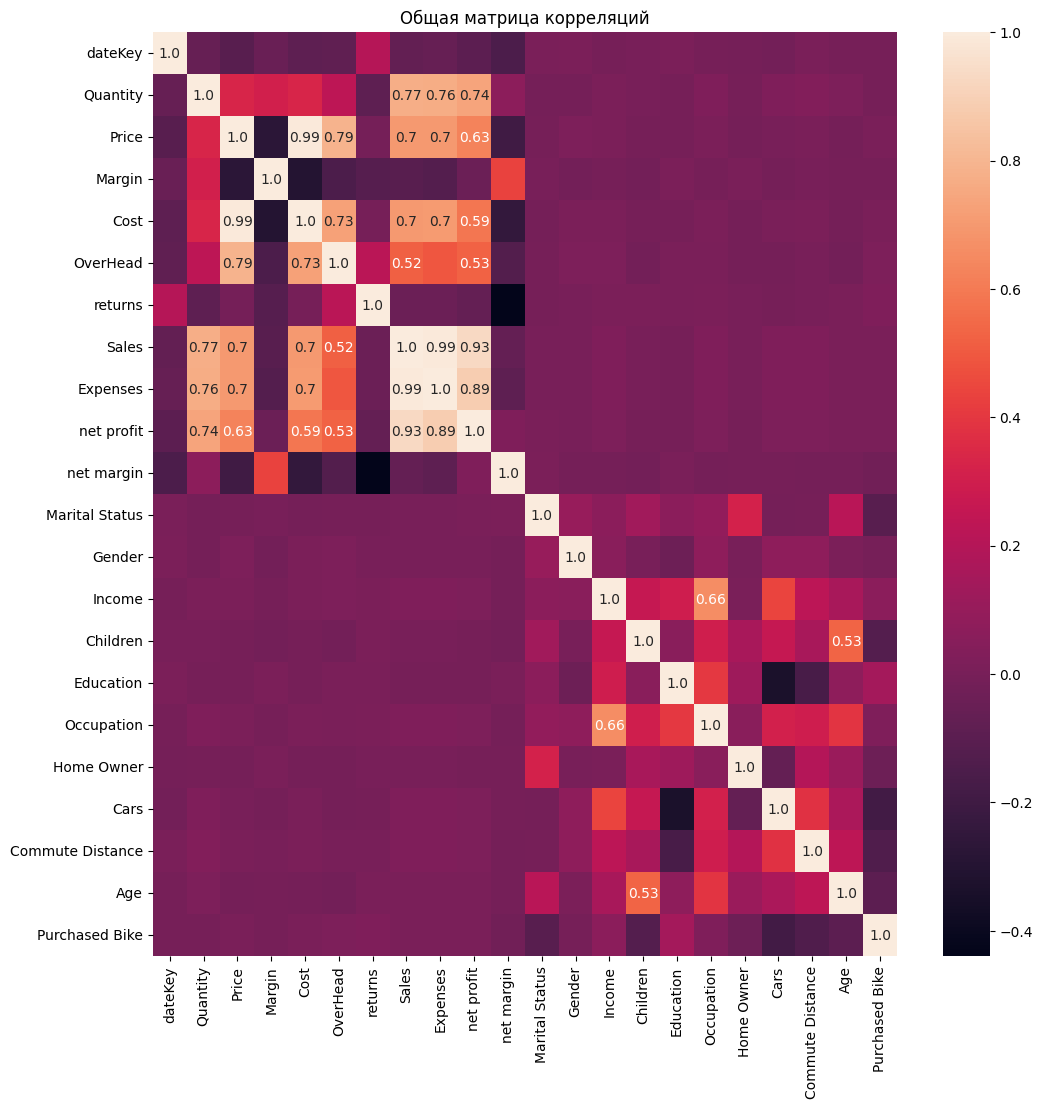

In [ ]:
plt.figure(figsize=(12, 12))

corr_matrix = df_corr_total.corr()
mask = (abs(corr_matrix) >= 0.5)
annotations_total = np.where(mask, corr_matrix.round(2).astype(str), "")
sns.heatmap(data=corr_matrix, annot=annotations_total, fmt="")
plt.title('Общая матрица корреляций')
plt.show()

Выводы:
- Продажи не зависят от характеристик покупателя
- Цена имеет сильную корреляцию с себестоимостью и накладными расходами, что очевидно.
- Чистая прибыль коррелирует с ценой товара.

- Наличие велосипеда у человека не зависит ни от какой характеристики человека.
- Доход человека коррелирует с его областью деятельности.

### МАТРИЦА КОРРЕЛЯЦИЙ Product Category

In [ ]:
# Попробуем посчитать корреляции с Product Category, использовав One Hot Encoding
def one_hot_category(df_corr):
    for cat_name in df_corr['Product Category'].unique():
        df_corr['Product Category '+cat_name] = df_corr['Product Category'].apply(lambda x: 1 if x==cat_name else 0)
    return df_corr

In [ ]:
df_corr_cat = df_corr.copy(deep=True)
df_corr_cat = df_corr_cat[['Product Category', 'dateKey', 'Quantity', 'Price', 'Margin', 'Cost', 'OverHead', 'returns', 'Sales', 'Expenses', 'net profit', 'net margin', 'Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Age', 'Purchased Bike']]
df_corr_cat = one_hot_category(df_corr_cat)
df_corr_cat = df_corr_cat.drop('Product Category', axis=1)

cols_x_cat = df_corr_cat[['Product Category Bikes', 'Product Category Accessories', 'Product Category Components', 'Product Category Clothing']]
cols_y_cat = df_corr_cat.drop(cols_x_cat.columns, axis=1)

corr_cat_matrix = pd.DataFrame(index=cols_x_cat.columns, columns=cols_y_cat.columns)

for col_x in cols_x_cat.columns:
    for col_y in cols_y_cat.columns:
        corr_cat_matrix.loc[col_x, col_y] = cols_x_cat[col_x].corr(cols_y_cat[col_y])

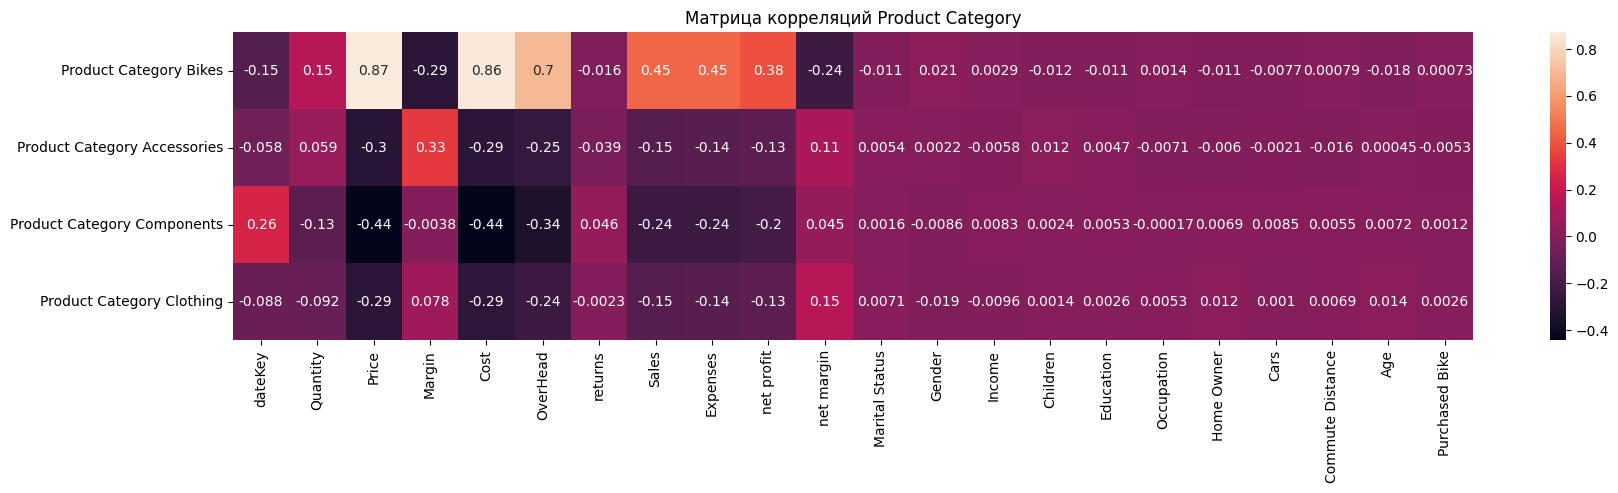

In [ ]:
plt.figure(figsize=(20, 4))
sns.heatmap(corr_cat_matrix.astype(float), annot=True)
plt.title("Матрица корреляций Product Category")
plt.show()

Выводы:
- Никакая характеристика человека не является причиной для покупки того или иного типа товара
- Велосипеды имеют наиболоее сильную корреляцию с ценой, себестоимостью и накладными расходами. Также они больше всех коррелируют с чистой прибылью.

### МАТРИЦА КОРРЕЛЯЦИЙ Promotion Type

In [ ]:
# One Hot Encoding для Promotion Type
def one_hot_promotion_type(df_corr):
    for prom_cat_name in df_corr['Promotion Type'].unique():
        df_corr['Promotion Type '+prom_cat_name] = df_corr['Promotion Type'].apply(lambda x: 1 if x==prom_cat_name else 0)

    return df_corr

In [ ]:
df_corr_prom = df_corr.copy(deep=True)
df_corr_prom = df_corr_prom[['Promotion Type', 'dateKey', 'Quantity', 'Price', 'Margin', 'Cost', 'OverHead', 'returns', 'Sales', 'Expenses', 'net profit', 'net margin', 'Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Age', 'Purchased Bike']]
df_corr_prom = one_hot_promotion_type(df_corr_prom)
df_corr_prom = df_corr_prom.drop('Promotion Type', axis=1)

cols_x_prom = df_corr_prom[['Promotion Type No Discount', 'Promotion Type Volume Discount', 'Promotion Type Discontinued Product', 'Promotion Type Seasonal Discount', 'Promotion Type Excess Inventory', 'Promotion Type New Product']]
cols_y_prom = df_corr_prom.drop(cols_x_prom.columns, axis=1)

corr_prom_matrix = pd.DataFrame(index=cols_x_prom.columns, columns=cols_y_prom.columns)

for col_x in cols_x_prom.columns:
    for col_y in cols_y_prom.columns:
        corr_prom_matrix.loc[col_x, col_y] = cols_x_prom[col_x].corr(cols_y_prom[col_y])

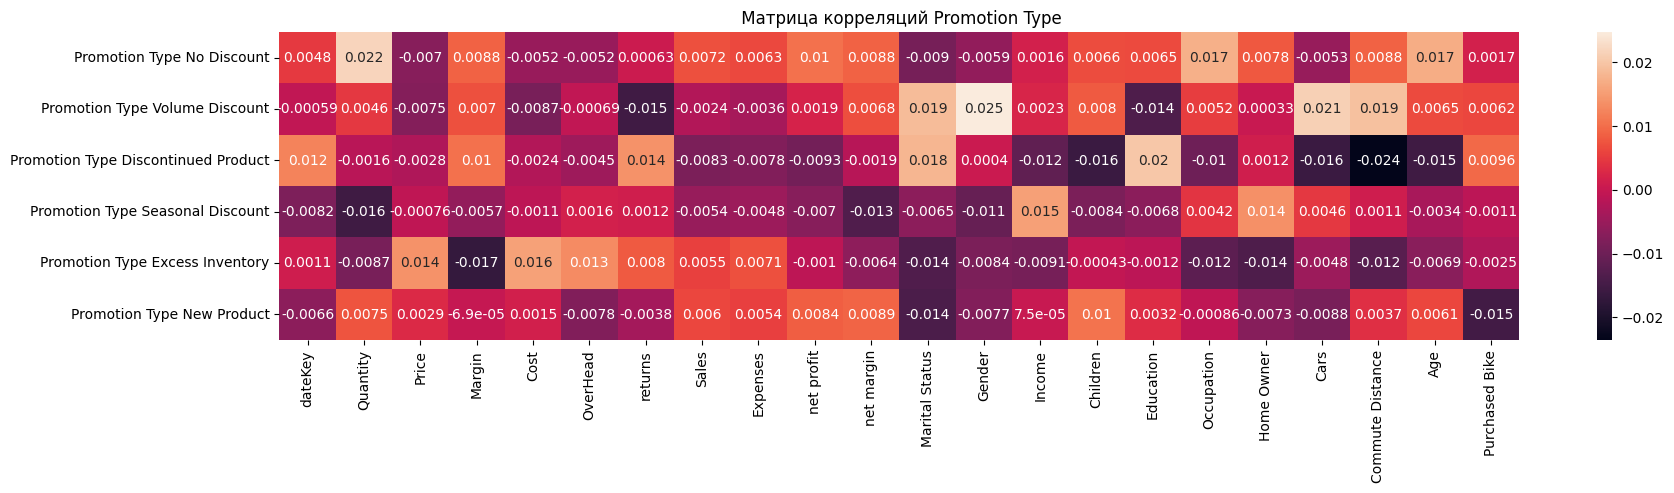

In [ ]:
plt.figure(figsize=(20, 4))
sns.heatmap(corr_prom_matrix.astype(float), annot=True)
plt.title(" Матрица корреляций Promotion Type")
plt.show()

Выводы:
- Промоакции не влияют на продажи
- Никакая характеристика человека не влияет на то, какой промоакцией он пользуется

# ОБОГАЩЕНИЕ ДАННЫХ

## ABC-XYZ-анализ

Проведем ABC-XYZ-анализ по `Product Sub Category`

In [ ]:
abc = df[['Product Sub Category', 'Sales']].copy()
abc = abc.groupby('Product Sub Category')['Sales'].sum().reset_index()
sales_total =abc['Sales'].sum()
abc['Share'] = abc['Sales'] / sales_total
abc = abc.sort_values(by='Share', ascending=False)
abc['Cumulative Share'] = abc['Share'].cumsum()

a_category = abc[abc['Cumulative Share']<0.8]
b_category = abc[(abc['Cumulative Share']>=0.8) & (abc['Cumulative Share']<0.95)]
c_category = abc[abc['Cumulative Share']>=0.95]

abc['ABC Category'] = abc['Cumulative Share'].apply(lambda x: 'A' if x<0.8 else ('C' if x>=0.95 else 'B'))

abc.head()

Product Sub Category         Sales     Share  Cumulative Share ABC Category
34        Touring Bikes  7.071255e+06  0.530330          0.530330            A
27           Road Bikes  3.025006e+06  0.226869          0.757199            A
21       Mountain Bikes  2.225769e+06  0.166928          0.924127            B
28          Road Frames  3.206060e+05  0.024045          0.948172            B
22      Mountain Frames  1.807934e+05  0.013559          0.961731            C

In [ ]:
xyz = df[['dateKey', 'Product Sub Category', 'Sales']].copy()
xyz = xyz[xyz['dateKey'].dt.year==2010]
xyz['dateKey'] = xyz['dateKey'].dt.to_period('M')
xyz = xyz.pivot_table(index='Product Sub Category', columns='dateKey', values='Sales', aggfunc='sum').fillna(0)
xyz['coef'] = xyz.apply(lambda x: x.std()/x.mean(), axis=1)

xyz['XYZ Category'] = xyz['coef'].apply(lambda x: 'X' if x<=0.15 else ('Z' if x>=0.3 else 'Y'))
xyz_result = xyz_result = pd.DataFrame({'Product Sub Category': xyz.index,'XYZ Category': xyz['XYZ Category']}).reset_index(drop=True)

xyz_result.head()

Product Sub Category XYZ Category
0           Bib-Shorts            Z
1           Bike Racks            Z
2          Bike Stands            Z
3    Bottles and Cages            Z
4      Bottom Brackets            Z

In [ ]:
abc_xyz = pd.merge(
    abc[['Product Sub Category', 'ABC Category']],
    xyz_result[['Product Sub Category', 'XYZ Category']],
    on='Product Sub Category'
)

abc_xyz_table = pd.crosstab(
    index=abc_xyz['ABC Category'],
    columns=abc_xyz['XYZ Category'],
    rownames=['ABC'],
    colnames=['XYZ']
)

abc_xyz_table

XYZ  X  Y   Z
ABC          
A    0  2   0
B    1  1   0
C    0  4  30

In [ ]:
cross_tab_categories = abc_xyz.pivot_table(
    index='ABC Category',
    columns='XYZ Category',
    values='Product Sub Category',
    aggfunc=lambda x: ', '.join(x.unique()),
    fill_value=''
)
cross_tab_categories.loc['C', 'Z'] = '30' # заменяем CZ на количество, так как слишком много категорий

cross_tab_categories

XYZ Category            X                                                  Y  \
ABC Category                                                                   
A                                                  Touring Bikes, Road Bikes   
B             Road Frames                                     Mountain Bikes   
C                          Mountain Frames, Touring Frames, Handlebars, J...   

XYZ Category   Z  
ABC Category      
A                 
B                 
C             30

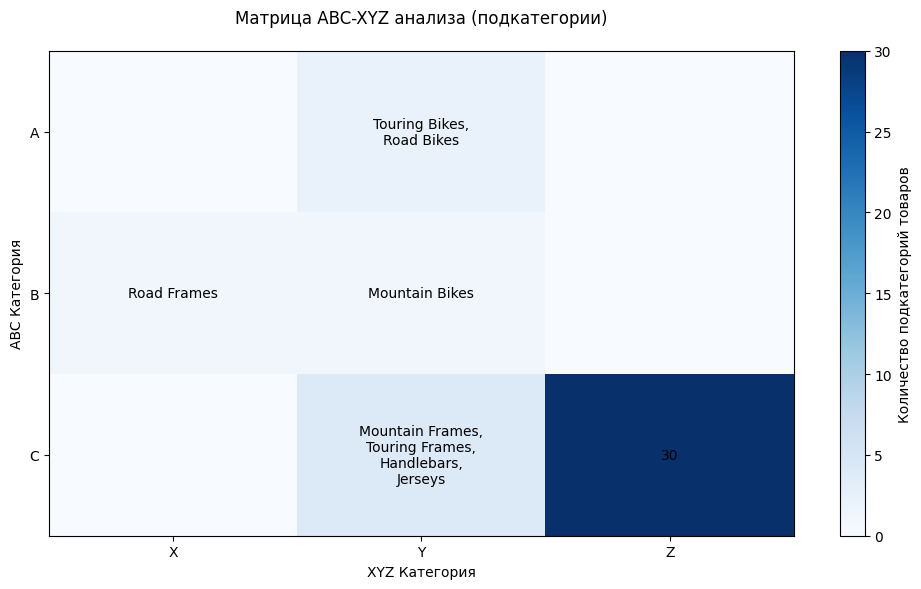

In [ ]:
plt.figure(figsize=(10, 6))

# Отрисовываем цветовую карту по количеству подкатегорий
heatmap = plt.imshow(abc_xyz_table.values, cmap='Blues', aspect='auto')

# Добавляем текст с названиями подкатегорий
for i in range(cross_tab_categories.shape[0]):
    for j in range(cross_tab_categories.shape[1]):
        text = cross_tab_categories.iloc[i, j]
        if text:
            plt.text(j, i, text, ha='center', va='center', color='black', fontsize=10, wrap=True)

# Настройка осей
plt.xticks(np.arange(len(cross_tab_categories.columns)), cross_tab_categories.columns)
plt.yticks(np.arange(len(cross_tab_categories.index)), cross_tab_categories.index)
plt.xlabel('XYZ Категория')
plt.ylabel('ABC Категория')
plt.title('Матрица ABC-XYZ анализа (подкатегории)', pad=20)

# Добавляем цветовую шкалу
cbar = plt.colorbar(heatmap)
cbar.set_label('Количество подкатегорий товаров')

plt.tight_layout()
plt.show()

ABC-анализ:
- Категория A: Туристические и дорожные велосипеды приносят наибольшую прибыль. Дорожные велосипеды являются самым доступным типом велосипеда и наиболее популярным по частоте продаж, а туристические - самые дорогие и часто преобретаются по несколько штук.
- Категория B: Горные велосипеды и рамы для дорожных велосипедов. Рамы для дорожных велосипедов являются самым популярным продуктом в категории `Components` и второй самой популярной подкатегорией после велосипедов.
- Категория C: сюда входят все остальные товары из `Components`, `Clothing` и `Accessories`

XYZ-анализ:
- Порог вхождения в категорию X был увеличен до 0.15, чтобы не оставлять категорию X пустой
- Категория X: Рамы для дорожных велосипедов являются самым стабильным попродажам товаром относительно других.
- Категория Y: Все категории велосипедов, а также рамы для туристических и горных велосипедов, джерси и рули - продукция, которая имеет относительно стабильный спрос
- Категория Z: Большая часть товаров из `Components`, `Clothing`, `Accessories` имеет нестабиильный спрос.

ABC-XYZ-анализ:
- В категории AX товаров не оказалось. Однако в дальнейшем сюда могут войти товары из категорий AY, BX.
- AY (дорожные и туристические велосипеды) - большая доля выручки, но спрос подвержен колебаниям.
- BX (рамы для дорожных велосипедов) - средние объемы выручки, но низкие колебания спроса. Возможно благодаря тому, что люди их берут для того, чтобы собрать собственный велосипед за более дешевую цену.
- BY (горные велосипеды) - средние продажи и спрос.
- CY (рамы, джерси, рули) - маленькая прибыль и средний спрос.
- CZ - практически неликвидные товары. Их продаваемость можно повысить с помощью, например, промоакций.

## RFM-анализ

In [ ]:
rfm = df[['customerKey', 'dateKey', 'Sales']]

NOW = datetime(2011, 1, 1)

rfm = df.groupby('customerKey').agg({
    'dateKey': lambda x: (NOW - x.max()).days,     # Recency
    'customerKey': 'count',                        # Frequency (count of rows)
    'Sales': 'sum'                                 # Monetary (total sales)
}).rename(columns={
    'dateKey': 'Recency',
    'customerKey': 'Frequency',
    'Sales': 'Monetary'
}).reset_index()

# Присвоим RFM-оценки (1–5, где 5 — лучше)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Финальный RFM-код
rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].astype(int).sum(axis=1)

rfm

customerKey  Recency  Frequency    Monetary R_score F_score M_score  \
0               6      361          1    200.8890       4       1       3   
1               9     1092          1     93.0000       1       1       2   
2              16      340          1    333.9363       4       1       3   
3              47      394          1     84.6600       3       1       2   
4              73     1090          1   1737.0000       1       1       5   
...           ...      ...        ...         ...     ...     ...     ...   
9581       401056      361          1    311.0796       4       5       3   
9582       401060      194          2    443.6622       4       5       4   
9583       401061      475          2   1462.9000       3       5       4   
9584       401062      149          1   1768.5100       5       5       5   
9585       401064       27          2  27264.1224       5       5       5   

     RFM_Segment  RFM_Score  
0            413          8  
1            112          4  
2            413          8  
3            312          6  
4            115          7  
...          ...        ...  
9581         453         12  
9582         454         13  
9583         354         12  
9584         555         15  
9585         555         15  

[9586 rows x 9 columns]

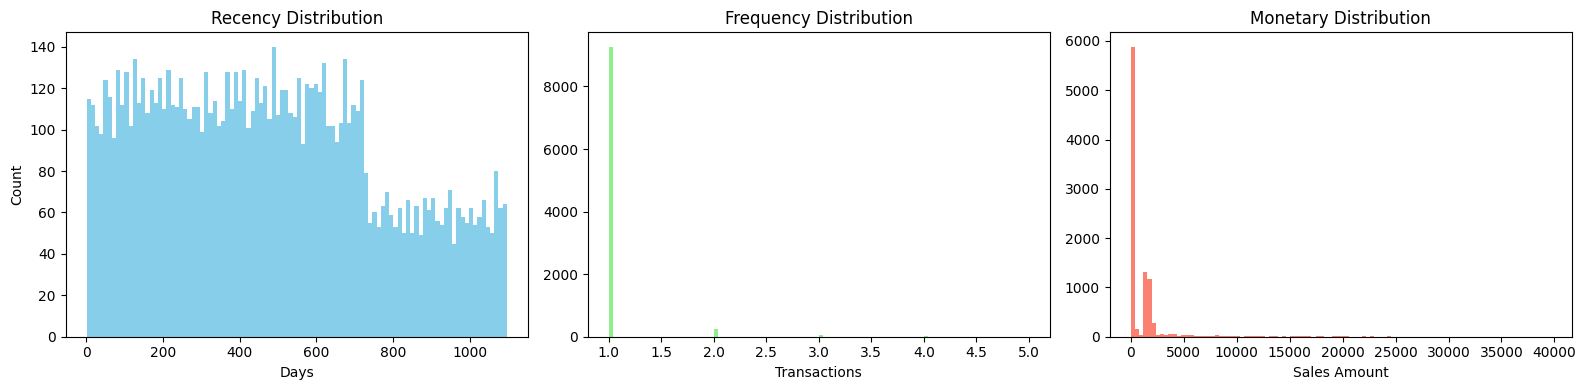

In [ ]:
# 1. Гистограммы
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=100, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=100, color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Transactions')

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=100, color='salmon')
plt.title('Monetary Distribution')
plt.xlabel('Sales Amount')

plt.tight_layout()
plt.show()


Recency Distribution
- Показывает, как давно клиенты делали последнюю покупку.
- Около 2000 клиентов совершили покупку в течение предыдущих 200 дней.

Frequency Distribution
- Показывает, сколько раз клиенты совершили покупку. Помогает выявить лояльных клиентов.
- Большинство клиентов совершает покупку только 1 раз.

Monetary Distribution
- Отображает, сколько денег тратят клиенты.
- График схож с графиком распределения цен. Большая часть покупок - дешевые товары из `Components`, `Clothing`, `Accessories`. Дорогие товары (дороже 1200) покупаются реже, но в большем объеме за одну покупку.

C:\Users\katsk\AppData\Local\Temp\ipykernel_19600\1900314314.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = rfm.pivot_table(


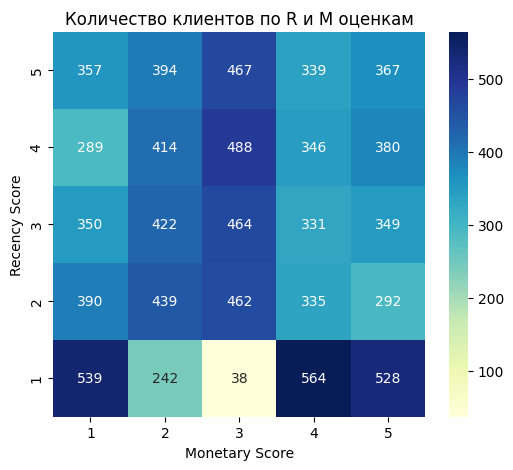

In [ ]:
pivot = rfm.pivot_table(
    index='R_score',
    columns='M_score',
    values='customerKey',  # любое уникальное поле, чтобы посчитать количество
    aggfunc='count'        # считаем клиентов
)

# Построение тепловой карты
plt.figure(figsize=(6, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Количество клиентов по R и M оценкам")
plt.xlabel("Monetary Score")
plt.ylabel("Recency Score")
plt.show()

RFM Score Heatmap
- Пересекает Recency (R) и Monetary (M). Чем выше и правее значение в ячейке — тем ценнее сегмент.
- Как видно, чоень много клиентов находятся в нижней `Recency` зоне, что означает, что они давно не покупали. 1092 таких клиента имели большую сумму покупки.
- Большая часть клиентов состредоточена по середине `Monetary`

C:\Users\katsk\AppData\Local\Temp\ipykernel_19600\2095003551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Score', data=rfm, palette='viridis')


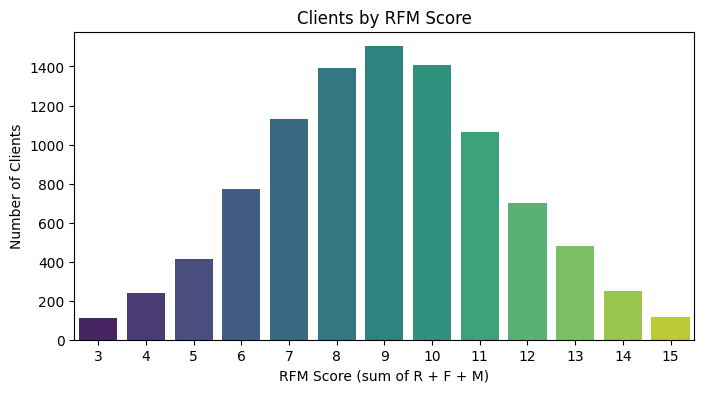

In [ ]:
# 3. RFM Score Bar Plot
plt.figure(figsize=(8, 4))
sns.countplot(x='RFM_Score', data=rfm, palette='viridis')
plt.title("Clients by RFM Score")
plt.xlabel("RFM Score (sum of R + F + M)")
plt.ylabel("Number of Clients")
plt.show()

Clients by RFM Score
- Показывает распределение клиентов по суммарному RFM-баллу. Помогает оценить, сколько клиентов в высокоценных и низкоценных сегментах.
- Большяа часть клиентов состредоточена по середине - то есть имеют средние частоту покупки и чек.

C:\Users\katsk\AppData\Local\Temp\ipykernel_19600\1638365487.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Count', data=segment_counts, palette='Set2')


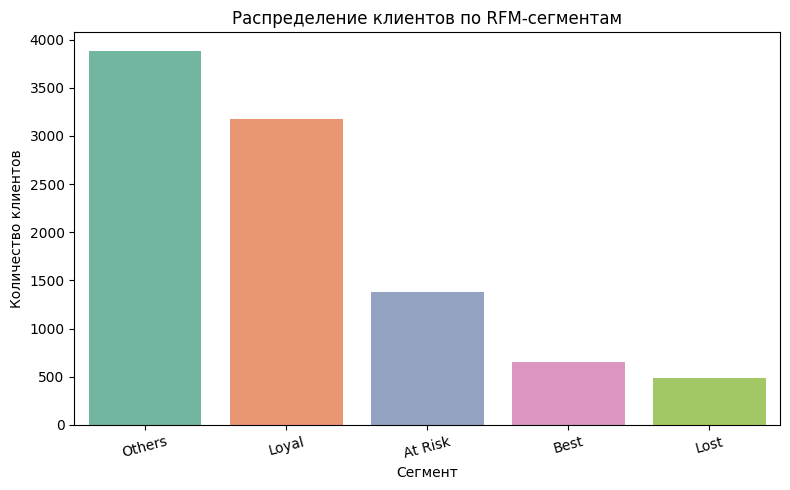

In [ ]:
def assign_segment(row):
    if row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Best'
    elif row['F_score'] >= 4:
        return 'Loyal'
    elif row['R_score'] <= 2 and row['M_score'] >= 3:
        return 'At Risk'
    elif row['R_score'] == 1:
        return 'Lost'
    else:
        return 'Others'

# Применяем сегментацию
rfm['Segment'] = rfm.apply(assign_segment, axis=1)

# Подсчёт количества клиентов в каждом сегменте
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Count', data=segment_counts, palette='Set2')
plt.title('Распределение клиентов по RFM-сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

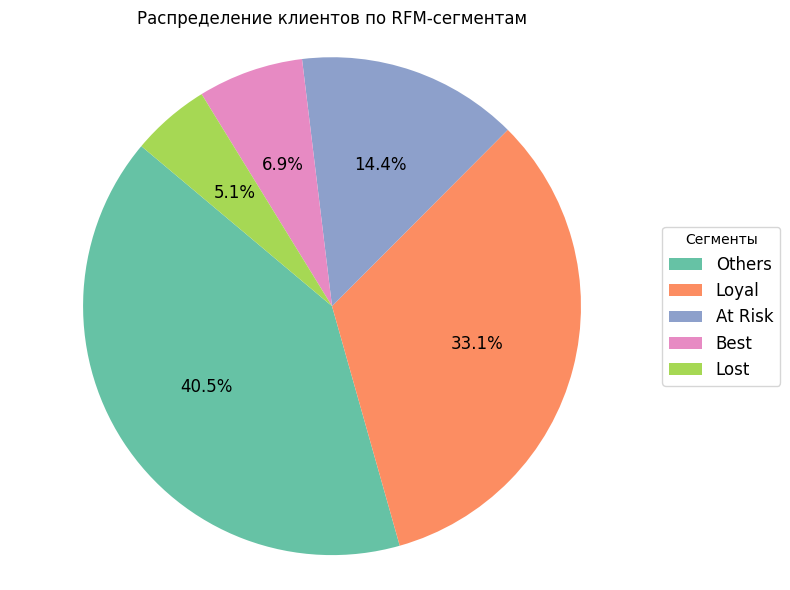

In [ ]:
sizes = segment_counts['Count']
labels = segment_counts['Segment']
colors = plt.cm.Set2.colors[:len(labels)]

plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.legend(
    wedges,
    labels,
    title="Сегменты",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12
)

plt.title('Распределение клиентов по RFM-сегментам')
plt.axis('equal')
plt.tight_layout()
plt.show()

RFM-сегменты (Best, Loyal, At Risk, Lost и Other) 
Столбчатая диаграмма показывает количество клиентов в каждом сегменте.
- Best — самые ценные клиенты. (R ≥ 4, F ≥ 4, M ≥ 4)
- At Risk — потенциально теряемые, нуждаются в реанимации. (R ≤ 2, M ≥ 3)
- Lost — давно неактивные, возможно ушли навсегда. (R = 1)
- Loyal — лояльные покупатели, не всегда топ по доходу. (F ≥ 4)
- Others — средние или новые клиенты.

Большая часть клиентов находятся в категории Others - то есть совершают покупки один раз.

## ОБЪЕДИНЕНИЕ С ДАННЫМИ

In [ ]:
df = pd.merge(df, abc[['Product Sub Category', 'ABC Category']], on='Product Sub Category', how='left')
df = pd.merge(df, xyz_result[['Product Sub Category', 'XYZ Category']], on='Product Sub Category', how='left')

df = pd.merge(df, rfm[['customerKey', 'Segment']], on='customerKey', how='left')

df.head()

customerKey    dateKey  salesPersonKey  Quantity    Price  Margin  \
0       216806 2008-06-28             289         1  1315.00    0.30   
1        74258 2008-12-04             295         1  1315.00    0.30   
2        64738 2008-06-19             292         1    29.00    0.37   
3       268812 2009-10-23             282         1   327.24    0.27   
4       400368 2009-06-11             288         1  1322.88    0.24   

        Cost   OverHead  returns    Sales   Expenses  net profit  net margin  \
0   920.5000  118.35000      0.0  1315.00   920.5000   276.15000        21.0   
1   920.5000  118.35000      0.0  1315.00   920.5000   276.15000        21.0   
2    18.2700    3.21900      0.0    29.00    18.2700     7.51100        25.9   
3   238.8852   17.67096      0.0   327.24   238.8852    70.68384        21.6   
4  1005.3888   95.24736      0.0  1322.88  1005.3888   222.24384        16.8   

         City       State         Country Marital Status  Gender  Income  \
0  Huntington    New York   United States         Single    Male  110000   
1  Kenilworth  New Jersey   United States         Single  Female   20000   
2   Frankfort    Kentucky   United States        Married    Male  100000   
3    New York    New York   United States        Married    Male   40000   
4      London     England  United Kingdom        Married  Female   90000   

   Children        Education      Occupation Home Owner  Cars  \
0         0  Partial College      Management         No     3   
1         0  Partial College          Manual         No     1   
2         4  Partial College    Professional        Yes     4   
3         0  Partial College  Skilled Manual        Yes     1   
4         2        Bachelors    Professional         No     0   

  Commute Distance  Age Purchased Bike           Product Product Sub Category  \
0        10+ Miles   32            Yes          Road-250           Road Bikes   
1        2-5 Miles   36            Yes          Road-250           Road Bikes   
2        0-1 Miles   40             No  Road Bottle Cage    Bottles and Cages   
3       5-10 Miles   29             No        ML Headset             Headsets   
4        0-1 Miles   36            Yes          Road-650           Road Bikes   

  Product Category    Color Size  Weight Class Style  \
0            Bikes      Red   58   15.79    H     U    
1            Bikes      Red   58   15.79    H     U    
2      Accessories  Unknown    0    0.00     N     U   
3       Components  Unknown    0    0.00    M      U   
4            Bikes      Red   62   20.00    L     U    

                     Promotion Promotion Category        Promotion Type  \
0  Mountain-100 Clearance Sale           Reseller  Discontinued Product   
1   Sport Helmet Discount-2003           Reseller     Seasonal Discount   
2           LL Road Frame Sale           Reseller      Excess Inventory   
3     Volume Discount 11 to 14           Reseller       Volume Discount   
4      Volume Discount over 60           Reseller       Volume Discount   

  Manufacturer Manufacturer Grouping   Market ABC Category XYZ Category  \
0    Slicenger            New Comers   Stable            A            Y   
1         Nuke            Incumbents  Growing            A            Y   
2     Princess            New Comers  Growing            C            Z   
3       Ribuck            New Comers   Stable            C            Z   
4         Nuke            Incumbents  Growing            A            Y   

   Segment  
0  At Risk  
1  At Risk  
2     Lost  
3    Loyal  
4    Loyal

## СОХРАНЕНИЕ

In [ ]:
RESULT_DATASET_PATH = DATA_DIR / 'result.csv'

df.to_csv(RESULT_DATASET_PATH)

# ВЫВОДЫ

- Наичная с 2009 года продажи компании значительно увеличились.
- По цене товары компании делятся на 3 категории:
    - Дешевые (до 370). Сюда входят все товары категорий `Components`, `Clothing`, `Accessories`
    - Дорогие (1200-3500). З аэту цену продаются велосипеды: `Road Bikes`, `Mountain Bikes`, некоторые `Touring Bikes`.
    - Люксовые (дороже 3500). Саммы дорогим товаром компании являются `Touring Bikes`. Несмотря на это, их чаще всего берут оптом (>4 за одну покупку).
- Наиболее популярные категории для продажи: `Bikes` и `Components`.
    - В категории `Bikes` по частоте продаж наиболее популярный тип велосипеда - `Road Bikes`, по количеству продаж (учитывая оптовые покупки) - `Touring Bikes`.
    - В категории `Components` наиболее популярный товар - различные виды рам `Frames` (для дорожных, горных и туристических велосипедов), а также `Handlebars`.
    - В категории `Clothing` наиболее популярная одежда - `Jerseys`.
    - В категории `Accessories` - `Helmets` (шлемы), `Tires and Tubes` (шины и резина), `Other`.
- Люди, имеющие велосипед и не имеющие велосипед, покупают товары компании одинаково часто. По предположению, клиенты, не имеющие велосипеда, являются реселлерами, либо покупают их в подарок своим детям.
- Люди, имеющие велосипед в среднем обладают следующими признаками:
    - Более высокий доход.
    - Чаще всего являются бакалаврами.
    - Имеют работу, связанную с профессиональной деятельностью.
    - Меньшее число машин.
    - Меньше детей.
    - Дистанция до работы либо 0-1, либо 2-5 миль.
- Количество клиентов, купивших товар компании единожды, составляет 97.6%.
- Большинство разовых покупателей из США (Калифорния, Нью-Джерси, Нью-Йорк), а большую часть базы остальных стран (Австралия, Германия, Франция, Британия, Канада) составляют лояльные клиенты.
- ТОП-3 типа промоакции по количеству продаж: `Volume Discount` для реселлеров, `Exsess Inventory`, `Seasonal Discount`.
- **В целом, никакая характеристика покупателя не влияет на то, какой тип продукта он покупает.**

ABC-XYZ-анализ:
- По результатам ABC-XYZ-анализа товары компании были распределены по разным категориям в зависимости от их важности.
- Самыми лучшими товарами компании по доле выручки и спросу оказались: `Road Bikes`, `Touring Bikes` из категории `Biles`, `Road Frames` из категории `Components`.
- Средними по прибыли и спросу оказались `Mountain Bikes`
- Прочие виды `Frames` и `Handlebars` из `Components`, `Jerseys` из категории `Clothing` имеют средний спрос, но приносят маленькую прибыль.
- Большинство товаров компании из категорий `Components`, `Clothing` и `Accessories` оказались в группе неликвидных.

RFM-анализ:
- По результатам RFM-анализа клиенты были распределенеы на сегменты.
- Большая часть клиентов вошла в категорию `Others` (40.5%), что характеризует их как разовых клиентов.
- В категорию `Loyal` были отнесены покупатели, имеющие наиболее высокую частоту покупки. Их доля составила 33.1%.
- В категорю `At Risk` было отнесено 14.4% от всех покупателей - они совершили покупку довольно давно, но на крупный чек. Их необходимо реанимировать.
- Также анализ показал, что большая часть клиентов купили товары довольно давно, но на крупный чек - то есть у компании большую часть клиентов составляют разовые покупатели.